<a href="https://colab.research.google.com/github/makiatulmsyr17/recommendation-wheat-planting-time-svm/blob/main/cuaca_gandum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data Set

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

path = 'https://docs.google.com/spreadsheets/d/1PkK6wIWc4YB18Zl3nHiuG4I1ksLaB88kLQrYy39FDos/edit?usp=sharing'
sheet_id = path.split('/')[-2]
sheet_name = 'train'

# fungsi API
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df_21 = pd.read_csv(url)
df_21

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,0,2016-07-01 0:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,1,2016-07-01 0:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2,2016-07-01 0:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,3,2016-07-01 0:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,4,2016-07-01 1:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...,...,...
64315,64315,2018-05-01 22:45:00,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
64316,64316,2018-05-01 23:00:00,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
64317,64317,2018-05-01 23:15:00,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000
64318,64318,2018-05-01 23:30:00,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000


In [ ]:

df_21.head()

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,0,2016-07-01 0:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,1,2016-07-01 0:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2,2,2016-07-01 0:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
3,3,2016-07-01 0:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
4,4,2016-07-01 1:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001


# Musim Di Eropa
- Musim Semi (Februari sampai April)
- Musim Panas (Mei hingga Juli)
- Musim Gugur (Agustus sampai Oktober)
- Musim Dingin (November hingga Januari)

Sumber : https://flip.id/blog/musim-di-eropa-dan-tempat-terbaik-untuk-menikmatinya


In [ ]:
# # Plot the time series of temperature
# plt.figure(figsize=(10, 6))
# plt.plot(df_21['date'], df_21['Temperature'], color='blue')
# plt.title('Time Series of Temperature')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.grid(True)
# plt.show()

In [ ]:
df_21.tail()

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
64315,64315,2018-05-01 22:45:00,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622
64316,64316,2018-05-01 23:00:00,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482
64317,64317,2018-05-01 23:15:00,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271
64318,64318,2018-05-01 23:30:00,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341
64319,64319,2018-05-01 23:45:00,May 2018,11.588,0.871,7.214,-0.426,4.691,1.310,10.833


# EDA

In [ ]:
print(df_21.dtypes)

id               int64
date            object
years           object
Iws            float64
Ir             float64
pm2.5          float64
PRES           float64
cbwd           float64
DEWP           float64
Temperature    float64
dtype: object


In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
subset_df = df_21[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Cetak matriks korelasi
print(correlation_matrix)


                  Iws        Ir     pm2.5      PRES      cbwd      DEWP  \
Iws          1.000000  0.119506  0.986868  0.061591  0.290872  0.040617   
Ir           0.119506  1.000000  0.078182  0.929007  0.231256  0.344268   
pm2.5        0.986868  0.078182  1.000000  0.046250  0.177148 -0.026984   
PRES         0.061591  0.929007  0.046250  1.000000  0.102385  0.027066   
cbwd         0.290872  0.231256  0.177148  0.102385  1.000000  0.313189   
DEWP         0.040617  0.344268 -0.026984  0.027066  0.313189  1.000000   
Temperature  0.064954  0.262743  0.051940  0.247977  0.141227  0.097044   

             Temperature  
Iws             0.064954  
Ir              0.262743  
pm2.5           0.051940  
PRES            0.247977  
cbwd            0.141227  
DEWP            0.097044  
Temperature     1.000000  


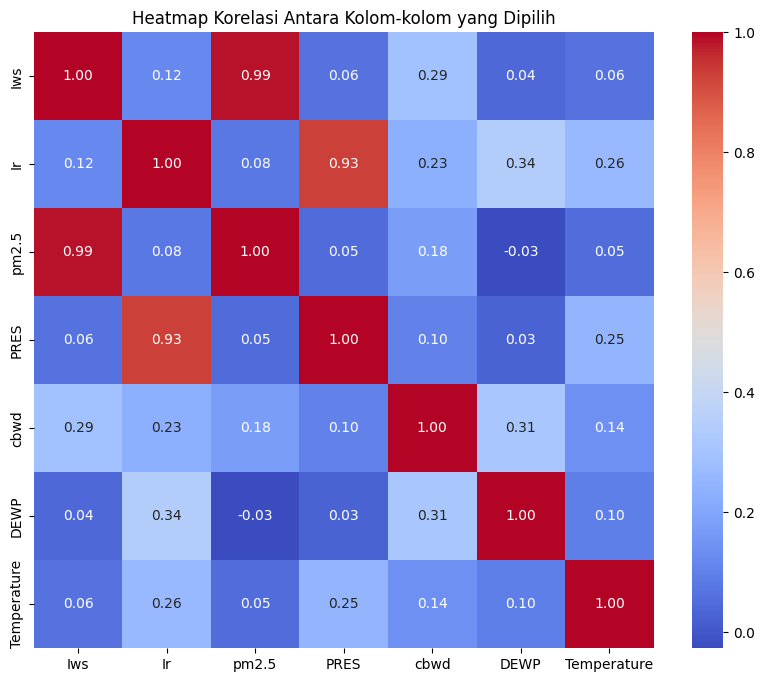

In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
subset_df = df_21[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom-kolom yang Dipilih')
plt.show()


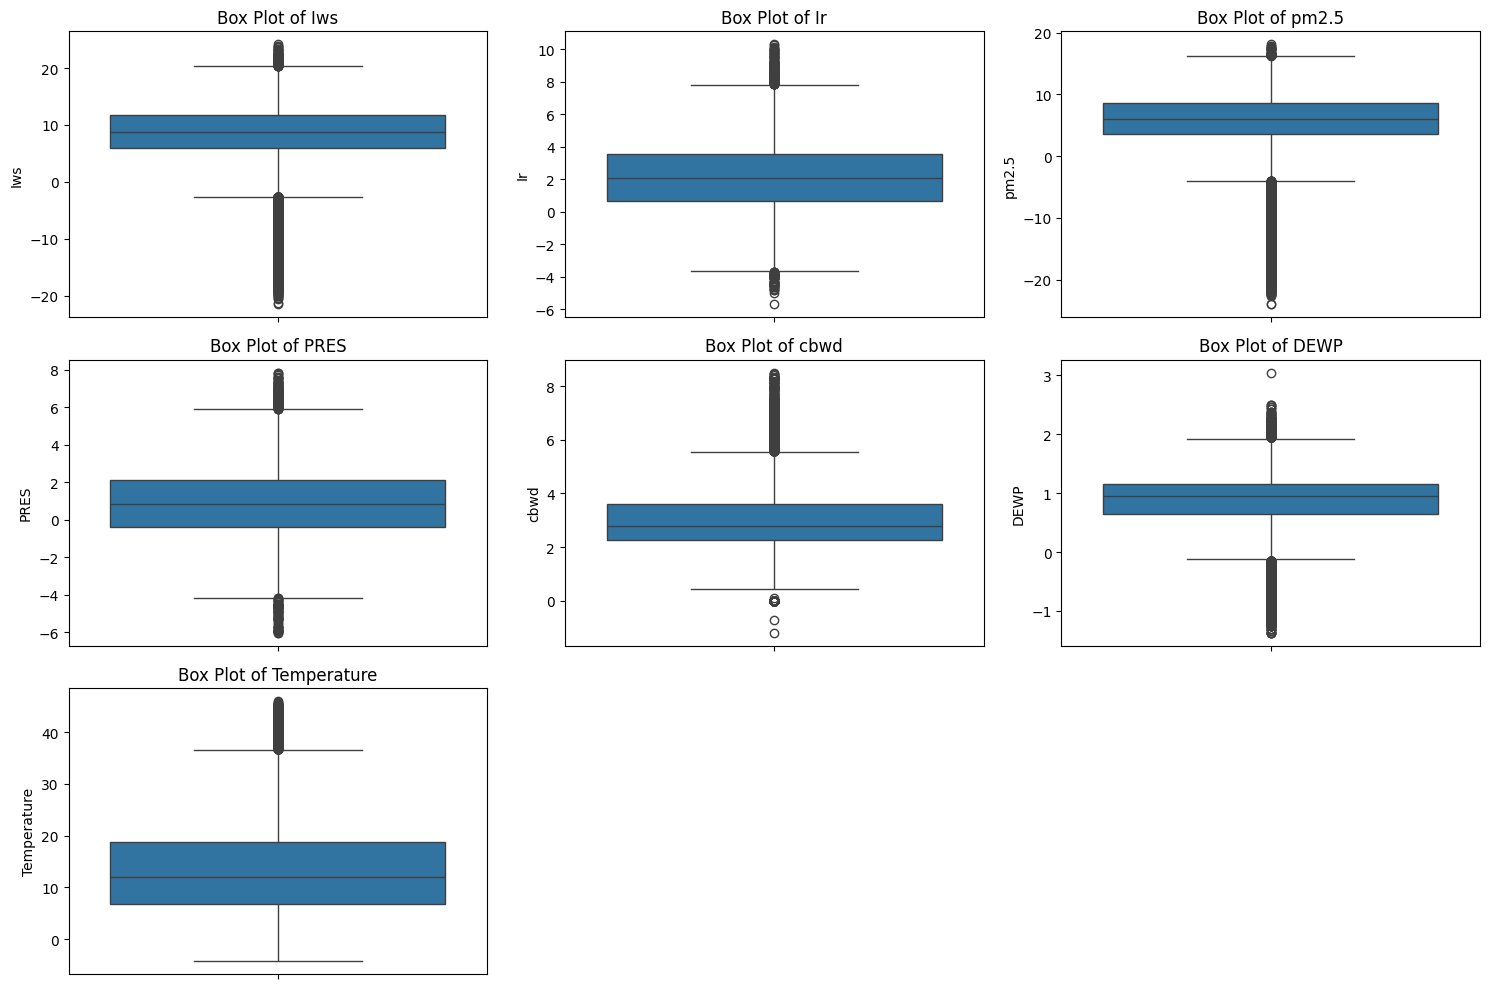

In [ ]:
# Mengambil subset dari DataFrame
subset_df = df_21[selected_columns]

# Visualisasi menggunakan Box Plot
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=subset_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung jumlah nilai dalam kolom 'target'
Kolom_target = df_21['Temperature'].value_counts()

# Menampilkan hasil
print(Kolom_target)

Temperature
 0.000000     432
 6.753000     351
 10.060000    332
 4.995000     330
 10.130000    324
             ... 
 42.490002      1
 42.348999      1
 46.007000      1
 42.068001      1
-3.728000       1
Name: count, Length: 700, dtype: int64


In [ ]:
# Menemukan nilai minimum dan maksimum
min_temperature = df_21['Temperature'].min()
max_temperature = df_21['Temperature'].max()

# Menampilkan nilai minimum dan maksimum
print("Nilai Minimum Temperature:", min_temperature)
print("Nilai Maksimum Temperature:", max_temperature)

Nilai Minimum Temperature: -4.221000195
Nilai Maksimum Temperature: 46.00699997


In [ ]:
missing_values = df_21.isna().sum()
missing_values

id             0
date           0
years          0
Iws            0
Ir             0
pm2.5          0
PRES           0
cbwd           0
DEWP           0
Temperature    0
dtype: int64

In [ ]:
# Tidak ada missing Vallue
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           64320 non-null  int64  
 1   date         64320 non-null  object 
 2   years        64320 non-null  object 
 3   Iws          64320 non-null  float64
 4   Ir           64320 non-null  float64
 5   pm2.5        64320 non-null  float64
 6   PRES         64320 non-null  float64
 7   cbwd         64320 non-null  float64
 8   DEWP         64320 non-null  float64
 9   Temperature  64320 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.9+ MB


In [ ]:
# Mengubah tipe data kolom date menjadi datetime
df_21['date'] = pd.to_datetime(df_21['date'])

# Menampilkan informasi dataset untuk memastikan perubahan
print(df_21.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           64320 non-null  int64         
 1   date         64320 non-null  datetime64[ns]
 2   years        64320 non-null  object        
 3   Iws          64320 non-null  float64       
 4   Ir           64320 non-null  float64       
 5   pm2.5        64320 non-null  float64       
 6   PRES         64320 non-null  float64       
 7   cbwd         64320 non-null  float64       
 8   DEWP         64320 non-null  float64       
 9   Temperature  64320 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.9+ MB
None


In [ ]:
#menghitung berapa baris yg duplicate
duplicate_rows = df_21.duplicated().sum()
print(duplicate_rows)
# melihat isi data yg duplicate
duplicate_rows = df_21[df_21.duplicated()]
duplicate_rows.head(10)

0


,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature


In [ ]:


def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df_21[col].unique()
    return res


columns = ["date","years"]

for column in columns:
    print(f"uniq {column}: ")
    print(checkUniq(column))

uniq date: 
<DatetimeArray>
['2016-07-01 00:00:00', '2016-07-01 00:15:00', '2016-07-01 00:30:00',
 '2016-07-01 00:45:00', '2016-07-01 01:00:00', '2016-07-01 01:15:00',
 '2016-07-01 01:30:00', '2016-07-01 01:45:00', '2016-07-01 02:00:00',
 '2016-07-01 02:15:00',
 ...
 '2018-05-01 21:30:00', '2018-05-01 21:45:00', '2018-05-01 22:00:00',
 '2018-05-01 22:15:00', '2018-05-01 22:30:00', '2018-05-01 22:45:00',
 '2018-05-01 23:00:00', '2018-05-01 23:15:00', '2018-05-01 23:30:00',
 '2018-05-01 23:45:00']
Length: 64320, dtype: datetime64[ns]
uniq years: 
['July 2016' 'August 2016' 'September 2016' 'October 2016' 'November 2016'
 'December 2016' 'January 2017' 'February 2017' 'March 2017' 'April 2017'
 'May 2017' 'June 2017' 'July 2017' 'August 2017' 'September 2017'
 'October 2017' 'November 2017' 'December 2017' 'January 2018'
 'February 2018' 'March 2018' 'April 2018' 'May 2018']


## Temperature (Sebagai target)

Hanya Ingin Melihat Penyebaran per 15 menit temperature sebagai target bagaimana

Iklim : Gandum dapat ditanam dalam berbagai kondisi iklim, namun umumnya lebih menyukai suhu dingin dan curah hujan sedang. Gandum pada suhu 12C hingga 25C dianggap optimal / Ideal


Sumber : https://www.renature.co/commodities/wheat-2/

In [ ]:
# Define fungsi untuk kategorisasi suhu berdasarkan kriteria
def temperature_category(temperature):
    if 12 <= temperature <= 25:
        return 0  # Suhu Ideal
    elif 4 <= temperature < 12:
        return 1  # Suhu Rendah Tidak Ideal
    elif 26 <= temperature <= 37:
        return 2  # Suhu Tinggi Tidak Ideal
    else:
        return 3  # Suhu Tidak Bagus untuk Menanam Gandum

df_21["temperature_category"] = df_21["Temperature"].apply(temperature_category)

print(df_21["temperature_category"])




0        2
1        2
2        2
3        2
4        2
        ..
64315    1
64316    1
64317    1
64318    1
64319    1
Name: temperature_category, Length: 64320, dtype: int64


In [ ]:
df_21["temperature_category"].value_counts(normalize = True)


temperature_category
0    0.394154
1    0.393812
3    0.135976
2    0.076057
Name: proportion, dtype: float64

## Analisis Feature date

In [ ]:
def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df_21[col].unique()
    return res


columns = ["date","years"]

for column in columns:
    print(f"uniq {column}: ")
    print(checkUniq(column))

uniq date: 
<DatetimeArray>
['2016-07-01 00:00:00', '2016-07-01 00:15:00', '2016-07-01 00:30:00',
 '2016-07-01 00:45:00', '2016-07-01 01:00:00', '2016-07-01 01:15:00',
 '2016-07-01 01:30:00', '2016-07-01 01:45:00', '2016-07-01 02:00:00',
 '2016-07-01 02:15:00',
 ...
 '2018-05-01 21:30:00', '2018-05-01 21:45:00', '2018-05-01 22:00:00',
 '2018-05-01 22:15:00', '2018-05-01 22:30:00', '2018-05-01 22:45:00',
 '2018-05-01 23:00:00', '2018-05-01 23:15:00', '2018-05-01 23:30:00',
 '2018-05-01 23:45:00']
Length: 64320, dtype: datetime64[ns]
uniq years: 
['July 2016' 'August 2016' 'September 2016' 'October 2016' 'November 2016'
 'December 2016' 'January 2017' 'February 2017' 'March 2017' 'April 2017'
 'May 2017' 'June 2017' 'July 2017' 'August 2017' 'September 2017'
 'October 2017' 'November 2017' 'December 2017' 'January 2018'
 'February 2018' 'March 2018' 'April 2018' 'May 2018']


Terdapat 64.320 baris data training mulai dari 01-07-2016 hingga 01-05-2018 dan
Feature ini sangat berguna untuk mengetahui bulan yang memiliki waktu terbaik untuk menanam gandum

## Analisis Feature lws (Kecepatan Angin Kumualtif)

  Fitur ini tidak berpengaruh langsung terhadap pertumbuhan tanaman gandum

## Analisis Feature Ir(Intensitas Curah Hujan)

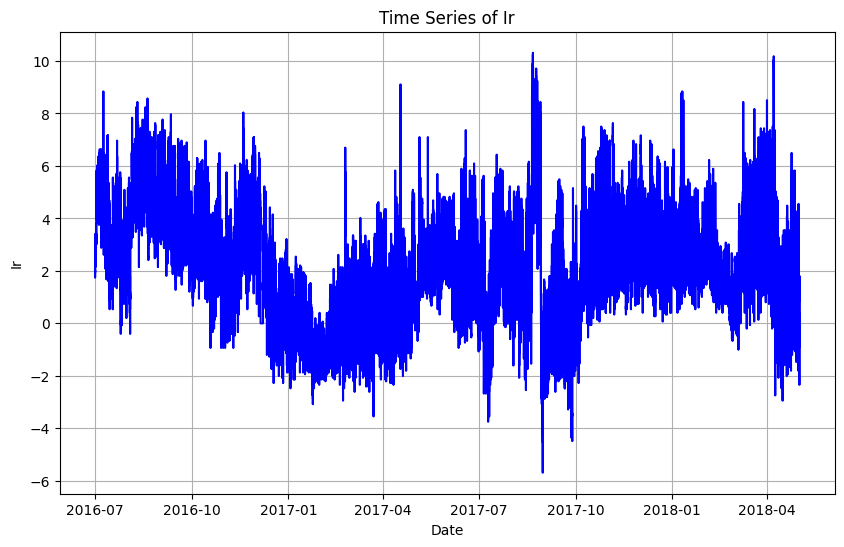

In [ ]:
# Plot the time series of Ir
plt.figure(figsize=(10, 6))
plt.plot(df_21['date'], df_21['Ir'], color='blue')
plt.title('Time Series of Ir')
plt.xlabel('Date')
plt.ylabel('Ir')
plt.grid(True)
plt.show()

0 mm/hari (abu-abu) : Berawan

0.5 – 20 mm/hari (hijau) : Hujan ringan

20 – 50 mm/hari (kuning) : Hujan sedang

50 – 100 mm/hari (oranye): Hujan lebat

100 – 150 mm/hari (merah) : Hujan sangat lebat

150 mm / hari (ungu) : Hujan ekstrem
\
https://www.bmkg.go.id/cuaca/probabilistik-curah-hujan.bmkg


Indeks curah hujan minus : https://jdih.bmkg.go.id/common/dokumen/perbanno.9tahun2019.pdf

In [ ]:
def weather_category(ir):
    if ir < 2:
        return 0  # Curah hujan dibawah 2 mm (minus)
    elif 2 <= ir <= 10:
        return 0  # Curah hujan antara 2-10 mm (ideal)
    else:
        return 1  # Curah hujan di atas 10 mm (tidak bagus)

df_21["Weather_Category"] = df_21["Ir"].apply(weather_category)

print(df_21["Weather_Category"])


0        0
1        0
2        0
3        0
4        0
        ..
64315    0
64316    0
64317    0
64318    0
64319    0
Name: Weather_Category, Length: 64320, dtype: int64


In [ ]:
df_21["Weather_Category"].value_counts(normalize = True)

Weather_Category
0    0.999907
1    0.000093
Name: proportion, dtype: float64

## Analisis Feature PM2.5


- Informasi Konsentrasi Partikulat (PM2.5)
Particulate Matter (PM2.5) adalah partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer). atau bisaa di sebut polusi
- Polusi udara menghambat pertumbuhan tanaman dengan melemahkan fotosintesis. Ozon troposfer saja menyebabkan kerugian tahunan sekitar 110 juta ton tanaman pokok utama: gandum, beras, jagung, dan kedelai. Jumlah ini mewakili sekitar 4% dari total produksi tanaman global tahunan, dan mencapai 15% di beberapa wilayah.

Sumber : https://www.ccacoalition.org/content/short-lived-climate-pollutants-and-food-security

- Pengukuran konsentrasi PM2.5 menggunakan metode penyinaran sinar Beta (Beta Attenuation Monitoring) dengan satuan mikrogram per meter kubik (µm/m3).

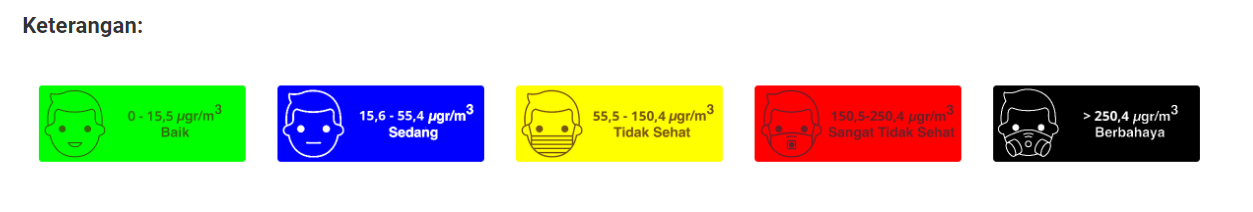

Sumber : https://www.bmkg.go.id/kualitas-udara/informasi-partikulat-pm25.bmkg


In [ ]:
df_21

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category
0,0,2016-07-01 00:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0
1,1,2016-07-01 00:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0
2,2,2016-07-01 00:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0
3,3,2016-07-01 00:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0
4,4,2016-07-01 01:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64315,64315,2018-05-01 22:45:00,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,1,0
64316,64316,2018-05-01 23:00:00,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,1,0
64317,64317,2018-05-01 23:15:00,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,1,0
64318,64318,2018-05-01 23:30:00,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000,1,0


In [ ]:
# Menampilkan DataFrame sebelum pembersihan
print("DataFrame sebelum pembersihan:")
print(df_21)

# Menemukan tahun terkait dengan nilai minimum dan maksimum
min_pm25_year = df_21.loc[df_21['pm2.5'].idxmin(), 'years']
max_pm25_year = df_21.loc[df_21['pm2.5'].idxmax(), 'years']

print("\nNilai minimum dari PM2.5:")
print(f"Nilai: {min_pm25_year}, Tahun: {min_pm25_year}")

print("\nNilai maksimum dari PM2.5:")
print(f"Nilai: {min_pm25_year}, Tahun: {max_pm25_year}")

DataFrame sebelum pembersihan:
          id                date      years     Iws     Ir  pm2.5   PRES  \
0          0 2016-07-01 00:00:00  July 2016   5.827  2.009  1.599  0.462   
1          1 2016-07-01 00:15:00  July 2016   5.760  2.076  1.492  0.426   
2          2 2016-07-01 00:30:00  July 2016   5.760  1.942  1.492  0.391   
3          3 2016-07-01 00:45:00  July 2016   5.760  1.942  1.492  0.426   
4          4 2016-07-01 01:00:00  July 2016   5.693  2.076  1.492  0.426   
...      ...                 ...        ...     ...    ...    ...    ...   
64315  64315 2018-05-01 22:45:00   May 2018  12.458  1.407  7.889 -0.746   
64316  64316 2018-05-01 23:00:00   May 2018  14.200  1.541  9.310  0.284   
64317  64317 2018-05-01 23:15:00   May 2018  12.659  1.474  7.924 -0.959   
64318  64318 2018-05-01 23:30:00   May 2018  13.329  1.541  8.671 -0.533   
64319  64319 2018-05-01 23:45:00   May 2018  11.588  0.871  7.214 -0.426   

        cbwd   DEWP  Temperature  temperature_category  

In [ ]:

# Filter DataFrame untuk mendapatkan baris dengan nilai PM2.5 negatif
df_negative_pm25 = df_21[df_21['pm2.5'] < 0]

# Menampilkan DataFrame dengan nilai PM2.5 negatif
print("\nDataFrame dengan nilai PM2.5 negatif:")
print(df_negative_pm25)


DataFrame dengan nilai PM2.5 negatif:
          id                date         years    Iws     Ir  pm2.5   PRES  \
18674  18674 2017-01-11 12:30:00  January 2017  2.478  0.000 -0.142 -1.350   
18861  18861 2017-01-13 11:15:00  January 2017  2.813  0.000 -0.036 -1.421   
18862  18862 2017-01-13 11:30:00  January 2017  2.411  0.000 -0.640 -1.528   
18863  18863 2017-01-13 11:45:00  January 2017  1.808 -0.067 -1.315 -1.706   
18864  18864 2017-01-13 12:00:00  January 2017  0.670 -0.201 -1.954 -1.848   
...      ...                 ...           ...    ...    ...    ...    ...   
64284  64284 2018-05-01 15:00:00      May 2018 -6.162  0.000 -8.742 -2.061   
64285  64285 2018-05-01 15:15:00      May 2018 -5.492 -0.402 -9.239 -2.132   
64286  64286 2018-05-01 15:30:00      May 2018 -2.545 -0.938 -5.259 -2.452   
64287  64287 2018-05-01 15:45:00      May 2018 -4.086 -0.603 -7.107 -1.670   
64288  64288 2018-05-01 16:00:00      May 2018 -0.737 -0.536 -3.269 -1.954   

        cbwd   DEWP  Tem

In [ ]:
# Menampilkan nilai maksimum dan minimum dari nilai PM2.5 yang negatif
if not df_negative_pm25.empty:
    max_negative_pm25 = df_negative_pm25['pm2.5'].max()
    min_negative_pm25 = df_negative_pm25['pm2.5'].min()
    print(f"Nilai maksimum dari PM2.5 negatif: {max_negative_pm25}")
    print(f"Nilai minimum dari PM2.5 negatif: {min_negative_pm25}")
else:
    print("Tidak ada nilai PM2.5 negatif dalam DataFrame.")

Nilai maksimum dari PM2.5 negatif: -0.03599999845
Nilai minimum dari PM2.5 negatif: -23.98600006


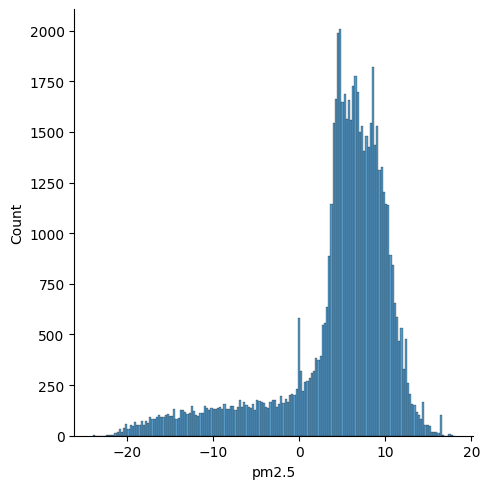

In [ ]:

sns.displot(df_21, x="pm2.5")

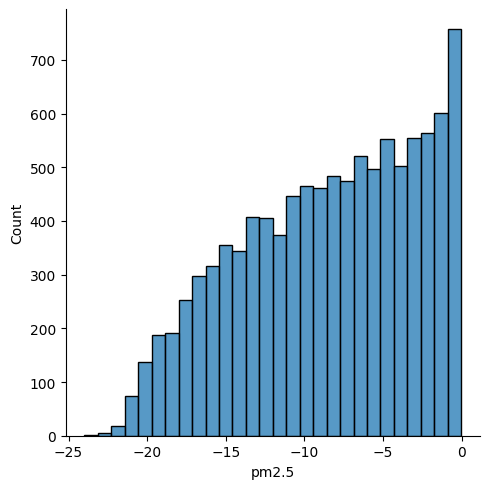

In [ ]:
sns.displot(df_negative_pm25, x="pm2.5")


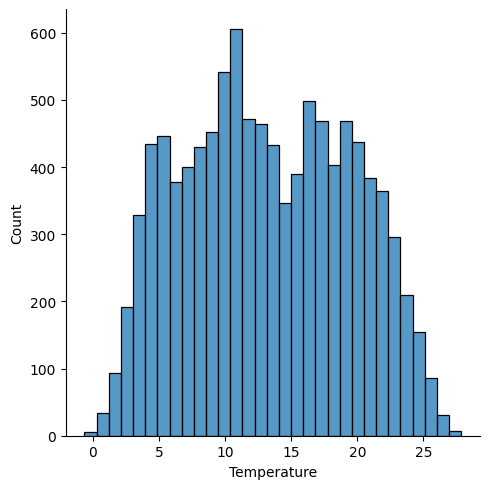

In [ ]:
sns.displot(df_negative_pm25, x="Temperature")


In [ ]:
# Mengubah nilai-nilai dalam kolom pm2.5 menjadi nilai absolut
df_21['pm2.5'] = df_21['pm2.5'].abs()

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame setelah mengubah kolom pm2.5 menjadi nilai absolut:")
print(df_21)


DataFrame setelah mengubah kolom pm2.5 menjadi nilai absolut:
          id                date      years     Iws     Ir  pm2.5   PRES  \
0          0 2016-07-01 00:00:00  July 2016   5.827  2.009  1.599  0.462   
1          1 2016-07-01 00:15:00  July 2016   5.760  2.076  1.492  0.426   
2          2 2016-07-01 00:30:00  July 2016   5.760  1.942  1.492  0.391   
3          3 2016-07-01 00:45:00  July 2016   5.760  1.942  1.492  0.426   
4          4 2016-07-01 01:00:00  July 2016   5.693  2.076  1.492  0.426   
...      ...                 ...        ...     ...    ...    ...    ...   
64315  64315 2018-05-01 22:45:00   May 2018  12.458  1.407  7.889 -0.746   
64316  64316 2018-05-01 23:00:00   May 2018  14.200  1.541  9.310  0.284   
64317  64317 2018-05-01 23:15:00   May 2018  12.659  1.474  7.924 -0.959   
64318  64318 2018-05-01 23:30:00   May 2018  13.329  1.541  8.671 -0.533   
64319  64319 2018-05-01 23:45:00   May 2018  11.588  0.871  7.214 -0.426   

        cbwd   DEWP  Tem

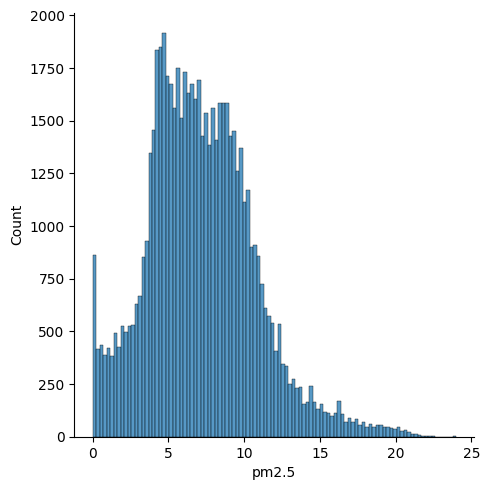

In [ ]:
sns.displot(df_21, x="pm2.5")


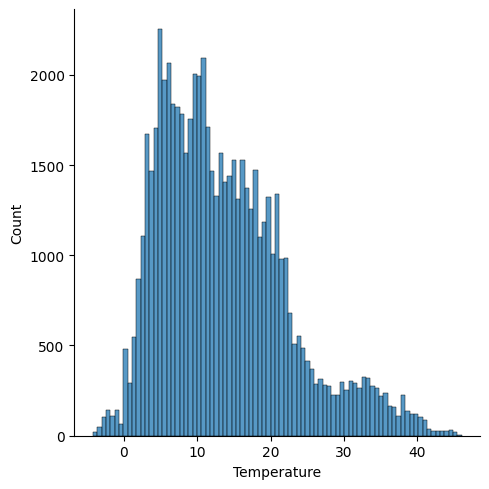

In [ ]:
sns.displot(df_21, x="Temperature")


In [ ]:
# Filter DataFrame untuk mendapatkan baris dengan nilai PM2.5 negatif
df_negative_pm25 = df_21[df_21['pm2.5'] < 0]

# Menampilkan DataFrame dengan nilai PM2.5 negatif
print("\nDataFrame dengan nilai PM2.5 negatif:")
print(df_negative_pm25)


DataFrame dengan nilai PM2.5 negatif:
Empty DataFrame
Columns: [id, date, years, Iws, Ir, pm2.5, PRES, cbwd, DEWP, Temperature, temperature_category, Weather_Category]
Index: []


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran

def flags(df):
    if 0 <= df["pm2.5"] <= 15.5:
        return 0
    elif 15.5 < df["pm2.5"] <= 55.4:  # Penyesuaian batas bawah
        return 1
    elif 55.5 <= df["pm2.5"] <= 150.4:
        return 2
    elif 150.5 <= df["pm2.5"] <= 250.4:
        return 3
    elif df["pm2.5"] > 250.4:
        return 4
    else:
        return 5

df_21["Category_pm2.5"] = df_21.apply(flags, axis =1)

print (df_21["Category_pm2.5"])

0        0
1        0
2        0
3        0
4        0
        ..
64315    0
64316    0
64317    0
64318    0
64319    0
Name: Category_pm2.5, Length: 64320, dtype: int64


In [ ]:
df_21["Category_pm2.5"].value_counts(normalize = True)

Category_pm2.5
0    0.974845
1    0.025155
Name: proportion, dtype: float64

In [ ]:
# Filter the DataFrame to select rows where "Category_pm2.5" column has value 5
rows_with_value_5 = df_21[df_21["Category_pm2.5"] == 5]

# Display the filtered rows
print("Baris dengan nilai 5 di kolom 'Category_pm2.5':")
print(rows_with_value_5)


Baris dengan nilai 5 di kolom 'Category_pm2.5':
Empty DataFrame
Columns: [id, date, years, Iws, Ir, pm2.5, PRES, cbwd, DEWP, Temperature, temperature_category, Weather_Category, Category_pm2.5]
Index: []


In [ ]:

year = df_21['years'].iloc[0]  # Assuming 'Year' is the column name containing years

# Get the count of temperature values
pm_count = df_21['pm2.5'].count()

# Find the minimum and maximum temperature values
min_pm = df_21['pm2.5'].min()
max_pm = df_21['pm2.5'].max()

# Get the year for the minimum temperature
min_year = df_21.loc[df_21['pm2.5'].idxmin(), 'years']


# Get the year for the maximum temperature
max_year = df_21.loc[df_21['pm2.5'].idxmax(), 'years']


print("Year with Minimum pm2.5	:", min_year)
print("Year with Maximum pm2.5	:", max_year)
print("Minimum pm2.5 :", min_pm)
print("Maximum pm2.5	:", max_pm)
print(" count	:", pm_count)


Year with Minimum pm2.5	: August 2016
Year with Maximum pm2.5	: September 2017
Minimum pm2.5 : 0.0
Maximum pm2.5	: 23.98600006
 count	: 64320


Selain itu, pergerakan angin dapat
mempengaruhi nilai PM2.5 pada suatu
wilayah. Hal ini disebabkan angin yang
membawa massa udara tidak hanya
membawa uap air, tetapi membawa
partikulat-partikulat lain.

sumber : https://journal.uii.ac.id/chemical/article/download/25631/14544/85189

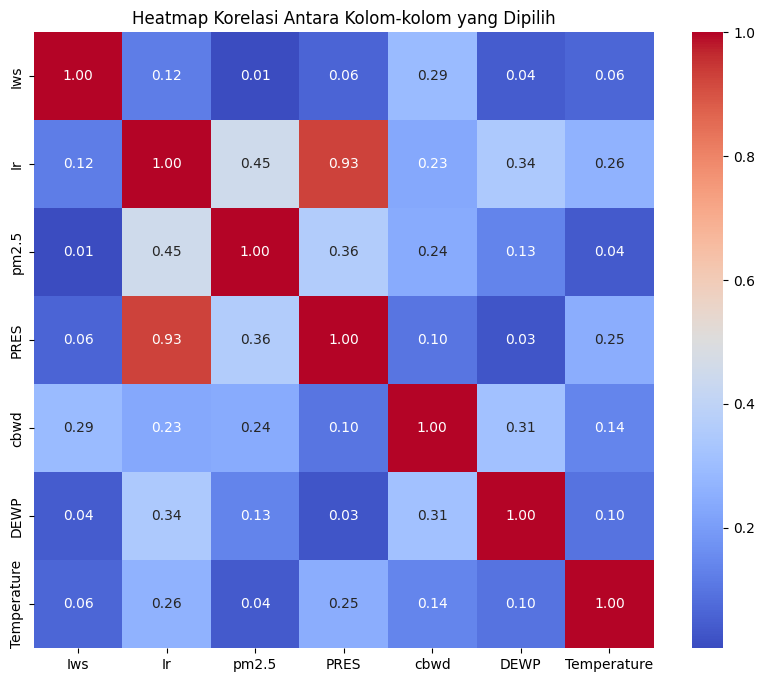

In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
subset_df = df_21[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom-kolom yang Dipilih')
plt.show()


## Analisis Feature PRES (Tekanan atmosfer)

Suhu adalah salah satu faktor yang memengaruhi tekanan udara. Adapun hubungan suhu dan tekanan udara adalah semakin tinggi suhu suatu daerah, maka semakin rendah tekanan udara daerah tersebut.

Sumber : https://kumparan.com/ragam-info/hubungan-suhu-dan-tekanan-udara-beserta-pengertian-22Qod7tnmv2



Gabungan arah angin yang diukur di lokasi pengamatan. Arah angin dapat
mempengaruhi pola suhu, khususnya yang berkaitan dengan wilayah sumber
massa udara. **PRES TIDAK BERPENGARUH SECARA LANGSUNG DALAM PENANAMAN GANDUM**

##Analisis Feature DEWP

Suhu titik embun, mewakili suhu saat udara menjadi jenuh dengan uap air.
Titik embun adalah parameter penting untuk memahamitingkat kelembapan dan
dapat mempengaruhi suhu dan kenyamanan yang dirasakan.
**DEWP TIDAK BERPENGARUH SECARA LANGSUNG DALAM PENANAMAN GANDUM**

##  Data Processing Bulanan

In [ ]:

# Get the year information
year = df_21['years'].iloc[0]  # Assuming 'Year' is the column name containing years

# Get the count of temperature values
temp_count = df_21['Temperature'].count()

# Find the minimum and maximum temperature values
min_temp = df_21['Temperature'].min()
max_temp = df_21['Temperature'].max()

# Get the year for the minimum temperature
min_year = df_21.loc[df_21['Temperature'].idxmin(), 'years']


# Get the year for the maximum temperature
max_year = df_21.loc[df_21['Temperature'].idxmax(), 'years']

print("Year with Minimum Temperature:", min_year)
print("Year with Maximum Temperature:", max_year)
print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)

Year with Minimum Temperature: December 2016
Year with Maximum Temperature: July 2016
Minimum Temperature: -4.221000195
Maximum Temperature: 46.00699997


In [ ]:
# Fungsi untuk mendapatkan nilai unik dari kolom tertentu
def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df_21[col].unique()
    return res

# Kolom yang ingin Anda periksa untuk nilai unik
columns = ["years"]

# Buat DataFrame baru df_bulanan dengan kolom 'bulan'
df_bulanan = pd.DataFrame(columns=['bulan'])

# Loop melalui setiap tahun yang unik
for year in checkUniq('years'):
    # Tambahkan nilai bulan ke dalam DataFrame baru
    df_bulanan.loc[len(df_bulanan)] = [year]

# Cetak DataFrame baru
print("DataFrame baru (df_bulanan):")
print(df_bulanan)


DataFrame baru (df_bulanan):
             bulan
0        July 2016
1      August 2016
2   September 2016
3     October 2016
4    November 2016
5    December 2016
6     January 2017
7    February 2017
8       March 2017
9       April 2017
10        May 2017
11       June 2017
12       July 2017
13     August 2017
14  September 2017
15    October 2017
16   November 2017
17   December 2017
18    January 2018
19   February 2018
20      March 2018
21      April 2018
22        May 2018


### Hitung data perbulannya

In [ ]:
ir_bulanan = []
pm25_bulanan = []
temperature_bulanan = []


In [ ]:
tem = df_21[df_21['Temperature'] >= 10.833000]
display(tem)

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,0,2016-07-01 00:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,1,2016-07-01 00:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2,2016-07-01 00:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,3,2016-07-01 00:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,4,2016-07-01 01:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64292,64292,2018-05-01 17:00:00,May 2018,6.899,-0.469,3.944,-1.812,2.924,1.005,13.647000,0,0,0
64293,64293,2018-05-01 17:15:00,May 2018,7.569,-0.670,4.762,-1.919,2.955,0.853,13.507000,0,0,0
64294,64294,2018-05-01 17:30:00,May 2018,7.569,-0.804,4.513,-2.132,3.015,0.822,13.225000,0,0,0
64312,64312,2018-05-01 22:00:00,May 2018,10.516,0.670,7.924,-0.533,2.254,1.005,10.833000,1,0,0


In [ ]:
b = df_21[df_21['years'] == "July 2016"]
b.describe()

,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,1487.500000,2016-07-16 11:52:30,11.958810,3.381800,8.187963,1.321868,3.668116,1.400037,33.781010,2.189852,0.0,0.034946
min,0.000000,2016-07-01 00:00:00,3.215000,-0.402000,0.071000,-2.168000,1.371000,0.640000,16.391001,0.000000,0.0,0.000000
25%,743.750000,2016-07-08 17:56:15,9.444000,2.277000,6.432000,0.533000,2.802000,1.127000,30.249001,2.000000,0.0,0.000000
50%,1487.500000,2016-07-16 11:52:30,11.320000,3.248500,7.747000,1.208000,3.350000,1.340000,34.048000,2.000000,0.0,0.000000
75%,2231.250000,2016-07-24 05:48:45,14.066000,4.488000,9.772000,2.203000,4.508000,1.675000,38.269001,3.000000,0.0,0.000000
max,2975.000000,2016-07-31 23:45:00,22.438000,8.841000,16.594999,4.584000,8.163000,3.046000,46.007000,3.000000,0.0,1.000000
std,859.241526,NaN,3.706734,1.414558,2.918883,1.169095,1.191579,0.350340,5.909852,0.809966,0.0,0.183675


In [ ]:
# Kategori 3
stdb_min =  33.781010 - 5.909852
stdb_plus = 33.781010 + 5.909852
print (stdb_min)
print (stdb_plus)

27.871158
39.690862


In [ ]:
meanb = 33.781010
print("Nilai rata-rata suhu (meanb):", meanb)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanb):
    if 21 <= meanb <= 24:
        return 0
    elif 4 <= meanb <= 20:
        return 1
    elif 25 <= meanb <= 35:
        return 2
    else:
        return 3

category = flags(meanb)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanb): 33.78101
Kategori suhu: 2


In [ ]:
# Weather_Category
ir_meanb = 3.381800
def weather_category(ir_meanb):
    if ir_meanb <= 0:
        return 0  # Tidak Hujan
    elif ir_meanb <= 2:
        return 1  # Berawan
    elif ir_meanb <= 8:
        return 2  # Hujan Ringan
    elif ir_meanb <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanb))
ir_bulanan.append(weather_category(ir_meanb))



Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran

# Definisi fungsi
def category_pm(pm_meanb):
    if 0 <= pm_meanb <= 15.5:
        return 0
    elif 15.6 <= pm_meanb <= 55.4:
        return 1
    elif 55.5 <= pm_meanb <= 150.4:
        return 2
    elif 150.5 <= pm_meanb <= 250.4:
        return 3
    elif pm_meanb > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanb = 8.187963
print("Category pm2.5:", category_pm(pm_meanb))
pm25_bulanan.append(category_pm(pm_meanb))

Category pm2.5: 0


In [ ]:
print ("Agustus 2016")
c = df_21[df_21['years'] == "August 2016"]
c.describe()

Agustus 2016


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,4463.500000,2016-08-16 11:52:30,13.012467,4.927991,9.192595,2.944231,3.756678,1.215012,31.144733,1.963038,0.0,0.011089
min,2976.000000,2016-08-01 00:00:00,2.277000,-0.402000,0.000000,-2.097000,1.340000,0.518000,20.190001,0.000000,0.0,0.000000
25%,3719.750000,2016-08-08 17:56:15,10.449000,4.153000,7.143000,2.452000,2.650000,1.005000,28.420000,2.000000,0.0,0.000000
50%,4463.500000,2016-08-16 11:52:30,13.061000,4.957000,9.026000,3.056000,3.564000,1.188000,31.586000,2.000000,0.0,0.000000
75%,5207.250000,2016-08-24 05:48:45,15.204000,5.827000,11.194000,3.660000,4.691000,1.401000,33.907001,2.000000,0.0,0.000000
max,5951.000000,2016-08-31 23:45:00,24.180000,8.573000,18.087000,6.041000,7.676000,2.132000,40.660999,3.000000,0.0,1.000000
std,859.241526,NaN,3.570252,1.339387,2.778199,1.130879,1.312875,0.286914,3.884796,0.610809,0.0,0.104735


In [ ]:
# Kategori 2
stdc_min =  31.144733 - 3.884796
stdc_plus = 31.144733 + 3.884796
print (stdc_min)
print (stdc_plus)

27.259936999999997
35.029529


In [ ]:
meanc = 31.144733
print("Nilai rata-rata suhu (meanc):", meanc)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanc):
    if 21 <= meanc <= 24:
        return 0
    elif 4 <= meanc <= 20:
        return 1
    elif 25 <= meanc <= 35:
        return 2
    else:
        return 3

category = flags(meanc)
print("Kategori suhu:", category)
temperature_bulanan.append(category)



Nilai rata-rata suhu (meanc): 31.144733
Kategori suhu: 2


In [ ]:
# Weather_Category
ir_meanc = 4.927991
def weather_category(ir_meanc):
    if ir_meanc <= 0:
        return 0  # Tidak Hujan
    elif ir_meanc <= 2:
        return 1  # Berawan
    elif ir_meanc <= 8:
        return 2  # Hujan Ringan
    elif ir_meanc <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanc))
ir_bulanan.append(weather_category(ir_meanc))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanc):
    if 0 <= pm_meanc <= 15.5:
        return 0
    elif 15.6 <= pm_meanc <= 55.4:
        return 1
    elif 55.5 <= pm_meanc <= 150.4:
        return 2
    elif 150.5 <= pm_meanc <= 250.4:
        return 3
    elif pm_meanc > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanc = 9.192595
print("Category pm2.5:", category_pm(pm_meanc))
pm25_bulanan.append(category_pm(pm_meanc))



Category pm2.5: 0


In [ ]:
print ("September 2016")
d = df_21[df_21['years'] == "September 2016"]
d.describe()

September 2016


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.0
mean,7391.500000,2016-09-15 23:52:30.000000256,9.044914,4.103064,6.465602,2.60092,2.484533,1.002549,23.037765,0.845139,0.0,0.0
min,5952.000000,2016-09-01 00:00:00,2.880000,1.206000,1.741000,0.21300,0.670000,0.213000,9.075000,0.000000,0.0,0.0
25%,6671.750000,2016-09-08 11:56:15,6.698000,3.215000,4.513000,1.91900,1.858000,0.761000,21.315001,0.000000,0.0,0.0
50%,7391.500000,2016-09-15 23:52:30,8.439000,3.952000,5.934000,2.48700,2.254000,0.975000,23.707001,0.000000,0.0,0.0
75%,8111.250000,2016-09-23 11:48:45,11.052000,4.890000,8.173000,3.16300,2.741000,1.218000,25.888000,2.000000,0.0,0.0
max,8831.000000,2016-09-30 23:45:00,18.152000,7.971000,13.326000,5.86300,5.422000,2.010000,32.640999,3.000000,0.0,0.0
std,831.528713,NaN,2.937880,1.200470,2.458993,0.91801,0.926393,0.293168,4.289161,1.127036,0.0,0.0


In [ ]:
# Kategori 2
stdd_min =  23.037765 - 4.289161
stdd_plus = 23.037765 + 4.289161
print (stdd_min)
print (stdd_plus)

18.748604
27.326926


In [ ]:
meand = 23.037765
print("Nilai rata-rata suhu (meanb):", meand)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meand):
    if 21 <= meand <= 24:
        return 0
    elif 4 <= meand <= 20:
        return 1
    elif 25 <= meand <= 35:
        return 2
    else:
        return 3

category = flags(meand)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanb): 23.037765
Kategori suhu: 0


In [ ]:
# Weather_Category
ir_meand = 4.103064
def weather_category(ir_meand):
    if ir_meand <= 0:
        return 0  # Tidak Hujan
    elif ir_meand <= 2:
        return 1  # Berawan
    elif ir_meand <= 8:
        return 2  # Hujan Ringan
    elif ir_meand <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meand))
ir_bulanan.append(weather_category(ir_meand))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran

# Definisi fungsi
def category_pm(pm_meand):
    if 0 <= pm_meand <= 15.5:
        return 0
    elif 15.6 <= pm_meand <= 55.4:
        return 1
    elif 55.5 <= pm_meand <= 150.4:
        return 2
    elif 150.5 <= pm_meand <= 250.4:
        return 3
    elif pm_meand > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meand = 6.465602
print("Category pm2.5:", category_pm(pm_meand))
pm25_bulanan.append(category_pm(pm_meand))



Category pm2.5: 0


In [ ]:
print ("Oktober 2016")
e = df_21[df_21['years'] == "October 2016"]
e.describe()

Oktober 2016


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,10319.500000,2016-10-16 11:52:30,8.711088,2.899241,6.252790,2.116707,2.370440,0.346446,17.155029,0.133737,0.0,0.001344
min,8832.000000,2016-10-01 00:00:00,4.287000,-0.938000,3.020000,-0.320000,-1.188000,-1.371000,4.080000,0.000000,0.0,0.000000
25%,9575.750000,2016-10-08 17:56:15,6.631000,2.009000,4.513000,1.421000,1.675000,-0.548000,14.562000,0.000000,0.0,0.000000
50%,10319.500000,2016-10-16 11:52:30,8.105000,2.813000,5.721000,2.097000,2.163000,0.670000,17.798000,0.000000,0.0,0.000000
75%,11063.250000,2016-10-24 05:48:45,10.717000,3.885000,7.676000,2.736000,2.772000,0.975000,19.837999,0.000000,0.0,0.000000
max,11807.000000,2016-10-31 23:45:00,19.759001,6.966000,16.275000,5.010000,5.483000,1.858000,27.506001,3.000000,0.0,1.000000
std,859.241526,NaN,2.531364,1.419473,2.136937,0.931924,0.950426,0.835896,3.849082,0.411912,0.0,0.036643


In [ ]:
# Kategori 0
stde_min =  17.155029 - 3.849082
stde_plus = 17.155029 + 3.849082
print (stde_min)
print (stde_plus)

13.305947
21.004110999999998


In [ ]:
meane = 17.155029
print("Nilai rata-rata suhu (meanb):", meane)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meane):
    if 21 <= meane <= 24:
        return 0
    elif 4 <= meane <= 20:
        return 1
    elif 25 <= meane <= 35:
        return 2
    else:
        return 3

category = flags(meane)
print("Kategori suhu:", category)
temperature_bulanan.append(category)



Nilai rata-rata suhu (meanb): 17.155029
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meane = 2.899241
def weather_category(ir_meane):
    if ir_meane <= 0:
        return 0  # Tidak Hujan
    elif ir_meane <= 2:
        return 1  # Berawan
    elif ir_meane <= 8:
        return 2  # Hujan Ringan
    elif ir_meane <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meane))
ir_bulanan.append(weather_category(ir_meane))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran

# Definisi fungsi
def category_pm(pm_meane):
    if 0 <= pm_meane <= 15.5:
        return 0
    elif 15.6 <= pm_meane <= 55.4:
        return 1
    elif 55.5 <= pm_meane <= 150.4:
        return 2
    elif 150.5 <= pm_meane <= 250.4:
        return 3
    elif pm_meane > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meane = 6.252790
print("Category pm2.5:", category_pm(pm_meane))
pm25_bulanan.append(category_pm(pm_meane))



Category pm2.5: 0


In [ ]:
print ("November 2016")
f = df_21[df_21['years'] == "November 2016"]
f.describe()

November 2016


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.0
mean,13247.500000,2016-11-15 23:52:30.000000256,9.259652,2.894568,6.727288,2.402553,2.456675,0.011149,13.497975,0.420139,0.0,0.0
min,11808.000000,2016-11-01 00:00:00,4.287000,-0.938000,2.807000,-0.426000,0.792000,-1.371000,0.633000,0.000000,0.0,0.0
25%,12527.750000,2016-11-08 11:56:15,7.167000,1.741000,4.833000,1.599000,1.767000,-0.799500,10.974000,0.000000,0.0,0.0
50%,13247.500000,2016-11-15 23:52:30,8.640000,2.947000,6.041000,2.274000,2.315000,0.366000,14.140000,0.000000,0.0,0.0
75%,13967.250000,2016-11-23 11:48:45,10.985000,4.019000,8.599000,3.198000,2.924000,0.761000,16.672001,1.000000,0.0,0.0
max,14687.000000,2016-11-30 23:45:00,18.486000,8.038000,13.290000,6.076000,5.513000,1.523000,24.270000,3.000000,0.0,0.0
std,831.528713,NaN,2.723492,1.618546,2.310210,1.082227,0.914554,0.827807,4.659108,0.727477,0.0,0.0


In [ ]:
# Kategori 1
stdf_min =  13.497975 - 4.659108
stdf_plus = 13.497975 + 4.659108
print (stdf_min)
print (stdf_plus)

8.838867
18.157083


In [ ]:
meanf = 13.497975
print("Nilai rata-rata suhu (meanf):", meanf)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanf):
    if 21 <= meanf <= 24:
        return 0
    elif 4 <= meanf <= 20:
        return 1
    elif 25 <= meanf <= 35:
        return 2
    else:
        return 3

category = flags(meanf)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanf): 13.497975
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanf = 2.894568
def weather_category(ir_meanf):
    if ir_meanf <= 0:
        return 0  # Tidak Hujan
    elif ir_meanf <= 2:
        return 1  # Berawan
    elif ir_meanf <= 8:
        return 2  # Hujan Ringan
    elif ir_meanf <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanf))
ir_bulanan.append(weather_category(ir_meanf))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanf):
    if 0 <= pm_meanf <= 15.5:
        return 0
    elif 15.6 <= pm_meanf <= 55.4:
        return 1
    elif 55.5 <= pm_meanf <= 150.4:
        return 2
    elif 150.5 <= pm_meanf <= 250.4:
        return 3
    elif pm_meanf > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanf = 6.727288
print("Category pm2.5:", category_pm(pm_meanf))
pm25_bulanan.append(category_pm(pm_meanf))



Category pm2.5: 0


In [ ]:
print ("Desember 2016")
g = df_21[df_21['years'] == "December 2016"]
g.describe()

Desember 2016


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.0
mean,16175.500000,2016-12-16 11:52:30,9.172616,1.111888,6.583028,-0.174139,2.540894,0.832348,9.577848,0.890457,0.0,0.0
min,14688.000000,2016-12-01 00:00:00,0.000000,-2.277000,0.000000,-3.305000,0.000000,0.000000,-4.221000,0.000000,0.0,0.0
25%,15431.750000,2016-12-08 17:56:15,7.770000,0.000000,5.295000,-1.386000,1.949000,0.670000,7.105000,0.000000,0.0,0.0
50%,16175.500000,2016-12-16 11:52:30,9.310000,0.737000,6.432000,-0.178000,2.559000,0.853000,9.567000,1.000000,0.0,0.0
75%,16919.250000,2016-12-24 05:48:45,11.387000,2.009000,8.635000,0.569000,3.137000,1.073750,12.240000,1.000000,0.0,0.0
max,17663.000000,2016-12-31 23:45:00,18.219000,6.497000,13.717000,4.548000,6.244000,2.071000,19.697001,3.000000,0.0,0.0
std,859.241526,NaN,3.697545,1.575955,3.028423,1.473215,1.142657,0.342939,4.378128,0.749294,0.0,0.0


In [ ]:
# Kategori 2
stdg_min =  9.577848 - 4.378128
stdg_plus = 9.577848 + 4.378128
print (stdg_min)
print (stdg_plus)

5.199719999999999
13.955976


In [ ]:
meang = 9.577848
print("Nilai rata-rata suhu (meanb):", meang)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meang):
    if 21 <= meang <= 24:
        return 0
    elif 4 <= meang <= 20:
        return 1
    elif 25 <= meang <= 35:
        return 2
    else:
        return 3

category = flags(meang)
print("Kategori suhu:", category)
temperature_bulanan.append(category)



Nilai rata-rata suhu (meanb): 9.577848
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meang = 1.111888
def weather_category(ir_meang):
    if ir_meang <= 0:
        return 0  # Tidak Hujan
    elif ir_meang <= 2:
        return 1  # Berawan
    elif ir_meang <= 8:
        return 2  # Hujan Ringan
    elif ir_meang <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meang))
ir_bulanan.append(weather_category(ir_meang))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meang):
    if 0 <= pm_meang <= 15.5:
        return 0
    elif 15.6 <= pm_meang <= 55.4:
        return 1
    elif 55.5 <= pm_meang <= 150.4:
        return 2
    elif 150.5 <= pm_meang <= 250.4:
        return 3
    elif pm_meang > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meang = 6.583028
print("Category pm2.5:", category_pm(pm_meang))
pm25_bulanan.append(category_pm(pm_meang))



Category pm2.5: 0


In [ ]:
print ("Januari 2017")
h = df_21[df_21['years'] == "January 2017"]
h.describe()

Januari 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.0
mean,19151.500000,2017-01-16 11:52:30,9.020981,-0.268342,6.892879,-1.583794,2.827293,0.735756,7.952813,0.935148,0.0,0.0
min,17664.000000,2017-01-01 00:00:00,-7.100000,-3.081000,0.000000,-3.625000,0.548000,0.000000,2.392000,0.000000,0.0,0.0
25%,18407.750000,2017-01-08 17:56:15,7.502000,-1.072000,5.437000,-2.274000,2.193000,0.518000,5.839000,1.000000,0.0,0.0
50%,19151.500000,2017-01-16 11:52:30,9.913000,-0.134000,7.071000,-1.670000,2.833000,0.701000,7.457000,1.000000,0.0,0.0
75%,19895.250000,2017-01-24 05:48:45,11.655000,0.469000,8.742000,-0.924000,3.350000,0.883000,9.778000,1.000000,0.0,0.0
max,20639.000000,2017-01-31 23:45:00,17.415001,2.545000,13.432000,1.279000,6.153000,1.828000,17.375999,3.000000,0.0,0.0
std,859.241526,NaN,4.275123,1.036313,2.546807,0.878232,0.820753,0.264559,2.704712,0.426234,0.0,0.0


In [ ]:
# Kategori 1
stdh_min =  7.952813 - 2.704712
stdh_plus = 7.952813 + 2.704712
print (stdh_min)
print (stdh_plus)

5.248101
10.657525


In [ ]:
meanh = 7.952813
print("Nilai rata-rata suhu (meanb):", meanh)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanh):
    if 21 <= meanh <= 24:
        return 0
    elif 4 <= meanh <= 20:
        return 1
    elif 25 <= meanh <= 35:
        return 2
    else:
        return 3

category = flags(meanh)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanb): 7.952813
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanh = -0.268342
def weather_category(ir_meanh):
    if ir_meanh <= 0:
        return 0  # Tidak Hujan
    elif ir_meanh <= 2:
        return 1  # Berawan
    elif ir_meanh <= 8:
        return 2  # Hujan Ringan
    elif ir_meanh <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanh))
ir_bulanan.append(weather_category(ir_meanh))


Category ir :   0


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanh):
    if 0 <= pm_meanh <= 15.5:
        return 0
    elif 15.6 <= pm_meanh <= 55.4:
        return 1
    elif 55.5 <= pm_meanh <= 150.4:
        return 2
    elif 150.5 <= pm_meanh <= 250.4:
        return 3
    elif pm_meanh > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanh = 6.121396
print("Category pm2.5:", category_pm(pm_meanh))
pm25_bulanan.append(category_pm(pm_meanh))

Category pm2.5: 0


In [ ]:
print ("Febuari 2017")
i = df_21[df_21['years'] == "February 2017"]
i.describe()

Febuari 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2688.000000,2688,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.0,2688.0
mean,21983.500000,2017-02-14 23:52:30,7.212612,-0.272016,6.341788,-1.531462,2.949728,0.777681,8.512802,1.056920,0.0,0.0
min,20640.000000,2017-02-01 00:00:00,-8.439000,-2.947000,0.000000,-3.909000,0.426000,0.183000,-1.055000,0.000000,0.0,0.0
25%,21311.750000,2017-02-07 23:56:15,6.296000,-1.206000,4.859250,-2.310000,2.284000,0.548000,6.102500,1.000000,0.0,0.0
50%,21983.500000,2017-02-14 23:52:30,8.539500,-0.469000,6.361000,-1.883000,2.894000,0.701000,8.653000,1.000000,0.0,0.0
75%,22655.250000,2017-02-21 23:48:45,10.717000,0.536000,8.173000,-0.782000,3.442000,0.944000,11.044000,1.000000,0.0,0.0
max,23327.000000,2017-02-28 23:45:00,17.816999,6.698000,11.833000,3.553000,6.122000,2.193000,16.743000,3.000000,0.0,0.0
std,776.103086,NaN,5.565774,1.195478,2.355965,1.038354,0.880186,0.308962,3.477802,0.773657,0.0,0.0


In [ ]:
# Kategori 1
stdi_min =  8.512802 - 3.477802
stdi_plus = 8.512802 + 3.477802
print (stdi_min)
print (stdi_plus)

5.035
11.990604000000001


In [ ]:
meani = 8.512802
print("Nilai rata-rata suhu (meani):", meani)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meani):
    if 21 <= meani <= 24:
        return 0
    elif 4 <= meani <= 20:
        return 1
    elif 25 <= meani <= 35:
        return 2
    else:
        return 3

category = flags(meani)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meani): 8.512802
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meani = -0.272016
def weather_category(ir_meani):
    if ir_meani <= 0:
        return 0  # Tidak Hujan
    elif ir_meani <= 2:
        return 1  # Berawan
    elif ir_meani <= 8:
        return 2  # Hujan Ringan
    elif ir_meani <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meani))
ir_bulanan.append(weather_category(ir_meani))


Category ir :   0


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meani):
    if 0 <= pm_meani <= 15.5:
        return 0
    elif 15.6 <= pm_meani <= 55.4:
        return 1
    elif 55.5 <= pm_meani <= 150.4:
        return 2
    elif 150.5 <= pm_meani <= 250.4:
        return 3
    elif pm_meani > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meani = 4.201330
print("Category pm2.5:", category_pm(pm_meani))
pm25_bulanan.append(category_pm(pm_meani))

Category pm2.5: 0


In [ ]:
print ("Maret 2017")
j = df_21[df_21['years'] == "March 2017"]
j.describe()

Maret 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,24815.500000,2017-03-16 11:52:30,6.602462,0.524543,6.511394,-0.885005,2.698084,0.965659,9.380204,0.890793,0.0,0.010417
min,23328.000000,2017-03-01 00:00:00,-16.879000,-3.550000,0.000000,-4.904000,1.310000,0.426000,0.774000,0.000000,0.0,0.000000
25%,24071.750000,2017-03-08 17:56:15,5.023000,-0.335000,4.300000,-1.706000,2.102000,0.761000,7.386000,1.000000,0.0,0.000000
50%,24815.500000,2017-03-16 11:52:30,7.904000,0.469000,6.325000,-0.888000,2.559000,0.944000,9.426000,1.000000,0.0,0.000000
75%,25559.250000,2017-03-24 05:48:45,10.583000,1.407000,8.884000,0.000000,3.046000,1.127000,11.273500,1.000000,0.0,0.000000
max,26303.000000,2017-03-31 23:45:00,18.353001,4.622000,20.077000,2.523000,5.879000,2.224000,17.868000,3.000000,0.0,1.000000
std,859.241526,NaN,6.297440,1.202117,3.229464,1.090968,0.843187,0.242123,2.952958,0.585973,0.0,0.101546


In [ ]:
# Kategori 1
stdj_min =  9.380204 - 2.952958
stdj_plus = 9.380204 + 2.952958
print (stdj_min)
print (stdj_plus)

6.427246
12.333162000000002


In [ ]:
meanj = 9.380204
print("Nilai rata-rata suhu (meanj):", meanj)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanj):
    if 21 <= meanj <= 24:
        return 0
    elif 4 <= meanj <= 20:
        return 1
    elif 25 <= meanj <= 35:
        return 2
    else:
        return 3

category = flags(meanj)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanj): 9.380204
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanj = 0.524543
def weather_category(ir_meanj):
    if ir_meanj <= 0:
        return 0  # Tidak Hujan
    elif ir_meanj <= 2:
        return 1  # Berawan
    elif ir_meanj <= 8:
        return 2  # Hujan Ringan
    elif ir_meanj <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanj))
ir_bulanan.append(weather_category(ir_meanj))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanj):
    if 0 <= pm_meanj <= 15.5:
        return 0
    elif 15.6 <= pm_meanj <= 55.4:
        return 1
    elif 55.5 <= pm_meanj <= 150.4:
        return 2
    elif 150.5 <= pm_meanj <= 250.4:
        return 3
    elif pm_meanj > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanj = 3.834800
print("Category pm2.5:", category_pm(pm_meanj))
pm25_bulanan.append(category_pm(pm_meanj))

Category pm2.5: 0


In [ ]:
print ("April 2017")
k = df_21[df_21['years'] == "April 2017"]
k.describe()

April 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.000000
mean,27743.500000,2017-04-15 23:52:30.000000256,3.960243,0.859835,7.234796,-0.612551,2.554742,1.047939,15.431626,0.185417,0.0,0.066667
min,26304.000000,2017-04-01 00:00:00,-18.820999,-2.344000,0.000000,-3.802000,0.853000,0.305000,2.110000,0.000000,0.0,0.000000
25%,27023.750000,2017-04-08 11:56:15,0.452250,-0.134000,4.087000,-1.635000,2.132000,0.883000,13.085000,0.000000,0.0,0.000000
50%,27743.500000,2017-04-15 23:52:30,6.832000,0.670000,6.610000,-0.711000,2.498000,1.036000,15.758000,0.000000,0.0,0.000000
75%,28463.250000,2017-04-23 11:48:45,9.913000,1.674000,9.275000,0.142000,2.863000,1.188000,18.079000,0.000000,0.0,0.000000
max,29183.000000,2017-04-30 23:45:00,16.209000,9.109000,22.103001,7.143000,5.544000,2.284000,27.153999,3.000000,0.0,1.000000
std,831.528713,NaN,8.282910,1.395868,4.366964,1.290746,0.683927,0.220903,4.071932,0.474785,0.0,0.249487


In [ ]:
# Kategori 1
stdk_min =  15.431626 - 4.071932
stdk_plus = 15.431626 + 4.071932
print (stdk_min)
print (stdk_plus)

11.359694
19.503557999999998


In [ ]:
meank = 15.431626
print("Nilai rata-rata suhu (meank):", meank)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meank):
    if 21 <= meank <= 24:
        return 0
    elif 4 <= meank <= 20:
        return 1
    elif 25 <= meank <= 35:
        return 2
    else:
        return 3

category = flags(meank)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meank): 15.431626
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meank = 0.859835
def weather_category(ir_meank):
    if ir_meank <= 0:
        return 0  # Tidak Hujan
    elif ir_meank <= 2:
        return 1  # Berawan
    elif ir_meank <= 8:
        return 2  # Hujan Ringan
    elif ir_meank <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meank))
ir_bulanan.append(weather_category(ir_meank))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meank):
    if 0 <= pm_meank <= 15.5:
        return 0
    elif 15.6 <= pm_meank <= 55.4:
        return 1
    elif 55.5 <= pm_meank <= 150.4:
        return 2
    elif 150.5 <= pm_meank <= 250.4:
        return 3
    elif pm_meank > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meank = 1.326834
print("Category pm2.5:", category_pm(pm_meank))
pm25_bulanan.append(category_pm(pm_meank))

Category pm2.5: 0


In [ ]:
print ("May 2017")
l = df_21[df_21['years'] == "May 2017"]
l.describe()

May 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,30671.500000,2017-05-16 11:52:30,2.426288,2.155474,5.461097,0.786385,2.633674,1.064817,17.643219,0.108199,0.0,0.052083
min,29184.000000,2017-05-01 00:00:00,-19.357000,-0.670000,0.000000,-2.025000,0.548000,0.152000,6.683000,0.000000,0.0,0.000000
25%,29927.750000,2017-05-08 17:56:15,-0.536000,1.407000,3.020000,0.284000,2.193000,0.914000,15.547000,0.000000,0.0,0.000000
50%,30671.500000,2017-05-16 11:52:30,5.425000,2.076000,4.087000,0.711000,2.498000,1.036000,17.798000,0.000000,0.0,0.000000
75%,31415.250000,2017-05-24 05:48:45,6.832000,2.746000,6.148000,1.208000,2.894000,1.218000,20.118999,0.000000,0.0,0.000000
max,32159.000000,2017-05-31 23:45:00,12.860000,7.100000,21.320999,4.975000,5.665000,1.858000,26.591000,3.000000,0.0,1.000000
std,859.241526,NaN,6.970825,1.058868,4.285344,0.857421,0.758740,0.243886,3.497715,0.416936,0.0,0.222232


In [ ]:
# Kategori 0
stdl_min =  17.643219 - 3.497715
stdl_plus = 17.643219 + 3.497715
print (stdl_min)
print (stdl_plus)

14.145503999999999
21.140933999999998


In [ ]:





meanl = 17.643219
print("Nilai rata-rata suhu (meanl):", meanl)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanl):
    if 21 <= meanl <= 24:
        return 0
    elif 4 <= meanl <= 20:
        return 1
    elif 25 <= meanl <= 35:
        return 2
    else:
        return 3

category = flags(meanl)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanl): 17.643219
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanl = 2.155474
def weather_category(ir_meanl):
    if ir_meanl <= 0:
        return 0  # Tidak Hujan
    elif ir_meanl <= 2:
        return 1  # Berawan
    elif ir_meanl <= 8:
        return 2  # Hujan Ringan
    elif ir_meanl <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanl))
ir_bulanan.append(weather_category(ir_meanl))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanl):
    if 0 <= pm_meanl <= 15.5:
        return 0
    elif 15.6 <= pm_meanl <= 55.4:
        return 1
    elif 55.5 <= pm_meanl <= 150.4:
        return 2
    elif 150.5 <= pm_meanl <= 250.4:
        return 3
    elif pm_meanl > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanl = -0.272483
print("Category pm2.5:", category_pm(pm_meanl))
pm25_bulanan.append(category_pm(pm_meanl))

Category pm2.5: 5


In [ ]:
print ("June 2017")
m = df_21[df_21['years'] == "June 2017"]
m.describe()

June 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.000000
mean,33599.500000,2017-06-15 23:52:30.000000256,4.932522,1.959487,5.581011,1.772761,2.764938,-0.143864,18.077689,0.032292,0.0,0.009028
min,32160.000000,2017-06-01 00:00:00,-16.879000,-1.072000,0.000000,-0.817000,1.401000,-1.005000,6.050000,0.000000,0.0,0.000000
25%,32879.750000,2017-06-08 11:56:15,2.193250,1.072000,3.651250,1.031000,2.345000,-0.548000,16.180000,0.000000,0.0,0.000000
50%,33599.500000,2017-06-15 23:52:30,6.899000,1.875000,5.330000,1.706000,2.741000,-0.396000,18.290001,0.000000,0.0,0.000000
75%,34319.250000,2017-06-23 11:48:45,8.924750,2.679000,7.178000,2.310000,3.076000,-0.091000,20.277500,0.000000,0.0,0.000000
max,35039.000000,2017-06-30 23:45:00,15.338000,7.368000,20.042000,7.178000,5.361000,1.858000,25.535999,3.000000,0.0,1.000000
std,831.528713,NaN,5.932011,1.248978,3.100502,1.052025,0.567111,0.646146,2.975625,0.198987,0.0,0.094601


In [ ]:
# Kategori 0
stdm_min =  18.077689 - 2.975625
stdm_plus = 18.077689 + 2.975625
print (stdm_min)
print (stdm_plus)

15.102063999999999
21.053314


In [ ]:
meanm = 18.077689
print("Nilai rata-rata suhu (meanm):", meanm)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanm):
    if 21 <= meanm <= 24:
        return 0
    elif 4 <= meanm <= 20:
        return 1
    elif 25 <= meanm <= 35:
        return 2
    else:
        return 3

category = flags(meanm)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanm): 18.077689
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanm = 1.959487
def weather_category(ir_meanm):
    if ir_meanm <= 0:
        return 0  # Tidak Hujan
    elif ir_meanm <= 2:
        return 1  # Berawan
    elif ir_meanm <= 8:
        return 2  # Hujan Ringan
    elif ir_meanm <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanm))
ir_bulanan.append(weather_category(ir_meanm))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanm):
    if 0 <= pm_meanm <= 15.5:
        return 0
    elif 15.6 <= pm_meanm <= 55.4:
        return 1
    elif 55.5 <= pm_meanm <= 150.4:
        return 2
    elif 150.5 <= pm_meanm <= 250.4:
        return 3
    elif pm_meanm > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanm = 2.080975
print("Category pm2.5:", category_pm(pm_meanm))
pm25_bulanan.append(category_pm(pm_meanm))

Category pm2.5: 0


In [ ]:
print ("July 2017")
n = df_21[df_21['years'] == "July 2017"]
n.describe()

July 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,36527.500000,2017-07-16 11:52:30,7.471564,1.493721,7.964114,0.682258,4.878149,0.292909,21.033239,0.120632,0.0,0.015793
min,35040.000000,2017-07-01 00:00:00,-15.472000,-3.751000,0.000000,-3.269000,1.828000,-1.188000,10.130000,0.000000,0.0,0.000000
25%,35783.750000,2017-07-08 17:56:15,1.524250,0.067000,4.691000,-0.284000,3.290000,-0.548000,19.697001,0.000000,0.0,0.000000
50%,36527.500000,2017-07-16 11:52:30,9.109000,1.541000,7.818000,0.604000,4.203000,0.000000,21.385000,0.000000,0.0,0.000000
75%,37271.250000,2017-07-24 05:48:45,13.463000,2.947000,11.513000,1.599000,6.153000,1.310000,22.580999,0.000000,0.0,0.000000
max,38015.000000,2017-07-31 23:45:00,23.108000,6.430000,18.905001,6.041000,8.498000,2.284000,27.927999,3.000000,0.0,1.000000
std,859.241526,NaN,8.233124,1.869032,4.265000,1.399393,2.021737,0.937660,2.648102,0.551146,0.0,0.124695


In [ ]:
# Kategori 0
stdn_min =  21.033239 - 2.648102
stdn_plus = 21.033239 + 2.648102
print (stdn_min)
print (stdn_plus)

18.385136999999997
23.681341


In [ ]:
meann = 21.033239
print("Nilai rata-rata suhu (meann):", meann)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meann):
    if 21 <= meann <= 24:
        return 0
    elif 4 <= meann <= 20:
        return 1
    elif 25 <= meann <= 35:
        return 2
    else:
        return 3

category = flags(meann)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meann): 21.033239
Kategori suhu: 0


In [ ]:
# Weather_Category
ir_meann = 1.493721
def weather_category(ir_meann):
    if ir_meann <= 0:
        return 0  # Tidak Hujan
    elif ir_meann <= 2:
        return 1  # Berawan
    elif ir_meann <= 8:
        return 2  # Hujan Ringan
    elif ir_meann <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meann))
ir_bulanan.append(weather_category(ir_meann))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meann):
    if 0 <= pm_meann <= 15.5:
        return 0
    elif 15.6 <= pm_meann <= 55.4:
        return 1
    elif 55.5 <= pm_meann <= 150.4:
        return 2
    elif 150.5 <= pm_meann <= 250.4:
        return 3
    elif pm_meann > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meann = 4.093075
print("Category pm2.5:", category_pm(pm_meann))
pm25_bulanan.append(category_pm(pm_meann))

Category pm2.5: 0


In [ ]:
print ("Agustus 2017")
o = df_21[df_21['years'] == "August 2017"]
o.describe()

Agustus 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,39503.500000,2017-08-16 11:52:30,7.405061,2.423494,7.432079,0.685475,3.631290,1.183887,16.138329,0.112567,0.001008,0.005712
min,38016.000000,2017-08-01 00:00:00,-16.945999,-5.693000,0.000000,-6.041000,0.000000,0.274000,7.738000,0.000000,0.000000,0.000000
25%,38759.750000,2017-08-08 17:56:15,3.416000,0.469000,4.584000,-1.066000,3.015000,0.944000,14.491000,0.000000,0.000000,0.000000
50%,39503.500000,2017-08-16 11:52:30,9.377000,1.942000,7.711000,0.249000,3.564000,1.157000,16.250000,0.000000,0.000000,0.000000
75%,40247.250000,2017-08-24 05:48:45,12.659000,4.354000,10.234000,2.594000,4.173000,1.371000,18.150000,0.000000,0.000000,0.000000
max,40991.000000,2017-08-31 23:45:00,20.898001,10.315000,20.042000,7.853000,8.072000,2.498000,23.707001,1.000000,1.000000,1.000000
std,859.241526,NaN,7.410386,2.877919,3.743530,2.683722,1.013452,0.336789,3.003307,0.316116,0.031739,0.075377


In [ ]:
# Kategori 1
stdo_min =  16.138329 - 3.003307
stdo_plus = 16.138329 + 3.003307
print (stdo_min)
print (stdo_plus)

13.135022
19.141636


In [ ]:
meano = 16.138329
print("Nilai rata-rata suhu (meano):", meano)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meano):
    if 21 <= meano <= 24:
        return 0
    elif 4 <= meano <= 20:
        return 1
    elif 25 <= meano <= 35:
        return 2
    else:
        return 3

category = flags(meano)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meano): 16.138329
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meano = 2.423494
def weather_category(ir_meano):
    if ir_meano <= 0:
        return 0  # Tidak Hujan
    elif ir_meano <= 2:
        return 1  # Berawan
    elif ir_meano <= 8:
        return 2  # Hujan Ringan
    elif ir_meano <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meano))
ir_bulanan.append(weather_category(ir_meano))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meano):
    if 0 <= pm_meano <= 15.5:
        return 0
    elif 15.6 <= pm_meano <= 55.4:
        return 1
    elif 55.5 <= pm_meano <= 150.4:
        return 2
    elif 150.5 <= pm_meano <= 250.4:
        return 3
    elif pm_meano > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meano = 3.703144
print("Category pm2.5:", category_pm(pm_meano))
pm25_bulanan.append(category_pm(pm_meano))

Category pm2.5: 0


In [ ]:
print ("September 2017")
p = df_21[df_21['years'] == "September 2017"]
p.describe()

September 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.000000
mean,42431.500000,2017-09-15 23:52:30.000000256,5.295251,0.065061,6.285643,-1.125054,2.442870,0.716282,13.301285,0.307292,0.0,0.036111
min,40992.000000,2017-09-01 00:00:00,-21.568001,-4.488000,0.000000,-4.300000,1.279000,-1.127000,5.276000,0.000000,0.0,0.000000
25%,41711.750000,2017-09-08 11:56:15,3.014000,-0.938000,3.696000,-2.203000,2.102000,0.731000,11.537000,0.000000,0.0,0.000000
50%,42431.500000,2017-09-15 23:52:30,7.301000,-0.067000,5.845500,-1.208000,2.467000,0.914000,13.436000,0.000000,0.0,0.000000
75%,43151.250000,2017-09-23 11:48:45,10.047000,0.871000,8.635000,-0.320000,2.772000,1.066000,15.336000,1.000000,0.0,0.000000
max,43871.000000,2017-09-30 23:45:00,14.401000,5.492000,23.986000,4.584000,3.990000,1.675000,19.768000,1.000000,0.0,1.000000
std,831.528713,NaN,6.815093,1.424433,4.020572,1.368065,0.473101,0.660169,2.603892,0.461451,0.0,0.186599


In [ ]:
# Kategori 1
stdp_min =  13.301285 - 2.603892
stdp_plus = 13.301285 + 2.603892
print (stdp_min)
print (stdp_plus)

10.697393
15.905177


In [ ]:
meanp = 13.301285
print("Nilai rata-rata suhu (meanp):", meanp)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanp):
    if 21 <= meanp <= 24:
        return 0
    elif 4 <= meanp <= 20:
        return 1
    elif 25 <= meanp <= 35:
        return 2
    else:
        return 3

category = flags(meanp)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanp): 13.301285
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanp = 0.065061
def weather_category(ir_meanp):
    if ir_meanp <= 0:
        return 0  # Tidak Hujan
    elif ir_meanp <= 2:
        return 1  # Berawan
    elif ir_meanp <= 8:
        return 2  # Hujan Ringan
    elif ir_meanp <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanp))
ir_bulanan.append(weather_category(ir_meanp))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanp):
    if 0 <= pm_meanp <= 15.5:
        return 0
    elif 15.6 <= pm_meanp <= 55.4:
        return 1
    elif 55.5 <= pm_meanp <= 150.4:
        return 2
    elif 150.5 <= pm_meanp <= 250.4:
        return 3
    elif pm_meanp > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanp = 2.766672
print("Category pm2.5:", category_pm(pm_meanp))
pm25_bulanan.append(category_pm(pm_meanp))

Category pm2.5: 0


In [ ]:
print ("October 2017")
q = df_21[df_21['years'] == "October 2017"]
q.describe()

October 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,45359.500000,2017-10-16 11:52:30,5.267415,2.531314,6.523999,1.328011,2.335074,0.775651,9.530860,0.878360,0.0,0.035618
min,43872.000000,2017-10-01 00:00:00,-18.552999,-2.277000,0.000000,-1.812000,0.853000,-1.188000,2.532000,0.000000,0.0,0.000000
25%,44615.750000,2017-10-08 17:56:15,3.617000,1.273000,4.051000,0.320000,1.980000,0.761000,7.668000,1.000000,0.0,0.000000
50%,45359.500000,2017-10-16 11:52:30,7.368000,2.344000,6.041000,1.137000,2.315000,0.975000,9.567000,1.000000,0.0,0.000000
75%,46103.250000,2017-10-24 05:48:45,9.980000,3.751000,8.671000,2.239000,2.711000,1.097000,11.185000,1.000000,0.0,0.000000
max,46847.000000,2017-10-31 23:45:00,14.870000,7.502000,20.858999,5.757000,3.929000,1.645000,16.882999,3.000000,0.0,1.000000
std,859.241526,NaN,6.890858,1.634258,3.718195,1.262186,0.521930,0.633703,2.666897,0.455763,0.0,0.185368


In [ ]:
# Kategori 1
stdq_min =  9.530860 - 2.666897
stdq_plus = 9.530860 + 2.666897
print (stdq_min)
print (stdq_plus)

6.863963
12.197757000000001


In [ ]:
meanq = 9.530860
print("Nilai rata-rata suhu (meanq):", meanq)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanq):
    if 21 <= meanq <= 24:
        return 0
    elif 4 <= meanq <= 20:
        return 1
    elif 25 <= meanq <= 35:
        return 2
    else:
        return 3

category = flags(meanq)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanq): 9.53086
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanq = 2.531314
def weather_category(ir_meanq):
    if ir_meanq <= 0:
        return 0  # Tidak Hujan
    elif ir_meanq <= 2:
        return 1  # Berawan
    elif ir_meanq <= 8:
        return 2  # Hujan Ringan
    elif ir_meanq <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanq))
ir_bulanan.append(weather_category(ir_meanq))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanq):
    if 0 <= pm_meanq <= 15.5:
        return 0
    elif 15.6 <= pm_meanq <= 55.4:
        return 1
    elif 55.5 <= pm_meanq <= 150.4:
        return 2
    elif 150.5 <= pm_meanq <= 250.4:
        return 3
    elif pm_meanq > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanq = 2.841367
print("Category pm2.5:", category_pm(pm_meanq))
pm25_bulanan.append(category_pm(pm_meanq))

Category pm2.5: 0


In [ ]:
print ("November 2017")
r = df_21[df_21['years'] == "November 2017"]
r.describe()

November 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.0,2880.000000
mean,48287.500000,2017-11-15 23:52:30.000000256,5.829762,2.993768,7.06448,1.390533,2.800540,1.173544,7.441660,1.205208,0.0,0.037500
min,46848.000000,2017-11-01 00:00:00,-17.683001,0.335000,0.00000,-1.208000,0.487000,0.183000,0.000000,0.000000,0.0,0.000000
25%,47567.750000,2017-11-08 11:56:15,4.086000,2.076000,4.79700,0.604000,2.437000,1.066000,5.628000,1.000000,0.0,0.000000
50%,48287.500000,2017-11-15 23:52:30,8.573000,2.880000,6.78700,1.208000,2.772000,1.157000,7.386000,1.000000,0.0,0.000000
75%,49007.250000,2017-11-23 11:48:45,10.516000,3.818000,8.95500,2.132000,3.137000,1.310000,9.567000,1.000000,0.0,0.000000
max,49727.000000,2017-11-30 23:45:00,15.405000,7.636000,20.18400,5.899000,4.447000,2.102000,14.351000,3.000000,0.0,1.000000
std,831.528713,NaN,7.356664,1.240124,3.61674,1.087736,0.506422,0.189064,2.590416,0.666710,0.0,0.190017


In [ ]:
# Kategori 1
stdr_min =  7.441660 - 2.590416
stdr_plus = 7.441660 + 2.590416
print (stdr_min)
print (stdr_plus)

4.8512439999999994
10.032076


In [ ]:
meanr = 7.441660
print("Nilai rata-rata suhu (meanr):", meanr)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanr):
    if 21 <= meanr <= 24:
        return 0
    elif 4 <= meanr <= 20:
        return 1
    elif 25 <= meanr <= 35:
        return 2
    else:
        return 3

category = flags(meanr)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanr): 7.44166
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanr = 2.993768
def weather_category(ir_meanr):
    if ir_meanr <= 0:
        return 0  # Tidak Hujan
    elif ir_meanr <= 2:
        return 1  # Berawan
    elif ir_meanr <= 8:
        return 2  # Hujan Ringan
    elif ir_meanr <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanr))
ir_bulanan.append(weather_category(ir_meanr))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanr):
    if 0 <= pm_meanr <= 15.5:
        return 0
    elif 15.6 <= pm_meanr <= 55.4:
        return 1
    elif 55.5 <= pm_meanr <= 150.4:
        return 2
    elif 150.5 <= pm_meanr <= 250.4:
        return 3
    elif pm_meanr > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanr = 2.978423
print("Category pm2.5:", category_pm(pm_meanr))
pm25_bulanan.append(category_pm(pm_meanr))

Category pm2.5: 0


In [ ]:
print ("Desember 2017")
s = df_21[df_21['years'] == "December 2017"]
s.describe()

Desember 2017


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,51215.500000,2017-12-16 11:52:30,8.282917,3.226711,8.013894,1.630870,3.394889,1.058570,4.410764,1.756720,0.0,0.022849
min,49728.000000,2017-12-01 00:00:00,-16.945999,0.067000,0.000000,-0.959000,1.188000,0.305000,-0.844000,1.000000,0.0,0.000000
25%,50471.750000,2017-12-08 17:56:15,7.971000,2.277000,6.076000,0.817000,2.741000,0.883000,3.447000,1.000000,0.0,0.000000
50%,51215.500000,2017-12-16 11:52:30,10.449000,3.148000,7.924000,1.564000,3.290000,1.066000,4.432000,1.000000,0.0,0.000000
75%,51959.250000,2017-12-24 05:48:45,12.592000,3.952000,9.808000,2.381000,3.838000,1.249000,5.346000,3.000000,0.0,0.000000
max,52703.000000,2017-12-31 23:45:00,21.233000,7.167000,19.792999,4.939000,6.853000,2.345000,9.708000,3.000000,0.0,1.000000
std,859.241526,NaN,7.363615,1.159476,3.239767,0.959195,0.869514,0.236096,1.563045,0.970119,0.0,0.149449


In [ ]:
# Kategori 2
stds_min =  4.410764 - 1.563045
stds_plus = 4.410764 + 1.563045
print (stds_min)
print (stds_plus)

2.8477190000000006
5.973809


In [ ]:
means = 4.410764
print("Nilai rata-rata suhu (means):", means)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(means):
    if 21 <= means <= 24:
        return 0
    elif 4 <= means <= 20:
        return 1
    elif 25 <= means <= 35:
        return 2
    else:
        return 3

category = flags(means)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (means): 4.410764
Kategori suhu: 1


In [ ]:

# Weather_Category
ir_means = 3.226711
def weather_category(ir_means):
    if ir_means <= 0:
        return 0  # Tidak Hujan
    elif ir_means <= 2:
        return 1  # Berawan
    elif ir_means <= 8:
        return 2  # Hujan Ringan
    elif ir_means <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_means))
ir_bulanan.append(weather_category(ir_means))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_means):
    if 0 <= pm_means <= 15.5:
        return 0
    elif 15.6 <= pm_means <= 55.4:
        return 1
    elif 55.5 <= pm_means <= 150.4:
        return 2
    elif 150.5 <= pm_means <= 250.4:
        return 3
    elif pm_means > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_means = 4.824364
print("Category pm2.5:", category_pm(pm_means))
pm25_bulanan.append(category_pm(pm_means))

Category pm2.5: 0


In [ ]:
print ("Januari 2018")
t = df_21[df_21['years'] == "January 2018"]
t.describe()

Januari 2018


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,54191.500000,2018-01-16 11:52:30,10.837535,3.130003,8.778540,1.609055,3.718738,0.866258,2.371807,2.374328,0.0,0.015457
min,52704.000000,2018-01-01 00:00:00,-15.807000,0.402000,0.036000,-0.782000,-0.701000,-0.152000,-3.728000,1.000000,0.0,0.000000
25%,53447.750000,2018-01-08 17:56:15,10.315000,2.344000,7.462000,0.959000,2.985000,0.609000,0.492000,1.000000,0.0,0.000000
50%,54191.500000,2018-01-16 11:52:30,12.391000,3.014000,8.990000,1.492000,3.716000,0.853000,2.532000,3.000000,0.0,0.000000
75%,54935.250000,2018-01-24 05:48:45,13.999000,3.751000,10.447000,2.168000,4.386000,1.097000,4.502000,3.000000,0.0,0.000000
max,55679.000000,2018-01-31 23:45:00,19.759001,8.841000,18.940001,7.143000,7.158000,2.163000,8.160000,3.000000,0.0,1.000000
std,859.241526,NaN,6.089826,1.110325,2.753605,0.933859,0.997032,0.303035,2.569024,0.927452,0.0,0.123382


In [ ]:
# Kategori 2
stdt_min =  2.371807 - 2.569024
stdt_plus = 2.371807 + 2.569024
print (stdt_min)
print (stdt_plus)

-0.1972170000000002
4.940831


In [ ]:
meant = 2.371807
print("Nilai rata-rata suhu (meant):", meant)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meant):
    if 21 <= meant <= 24:
        return 0
    elif 4 <= meant <= 20:
        return 1
    elif 25 <= meant <= 35:
        return 2
    else:
        return 3

category = flags(meant)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meant): 2.371807
Kategori suhu: 3


In [ ]:
# Weather_Category
ir_meant = 3.130003
def weather_category(ir_meant):
    if ir_meant <= 0:
        return 0  # Tidak Hujan
    elif ir_meant <= 2:
        return 1  # Berawan
    elif ir_meant <= 8:
        return 2  # Hujan Ringan
    elif ir_meant <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meant))
ir_bulanan.append(weather_category(ir_meant))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meant):
    if 0 <= pm_meant <= 15.5:
        return 0
    elif 15.6 <= pm_meant <= 55.4:
        return 1
    elif 55.5 <= pm_meant <= 150.4:
        return 2
    elif 150.5 <= pm_meant <= 250.4:
        return 3
    elif pm_meant > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meant = 7.036321
print("Category pm2.5:", category_pm(pm_meant))
pm25_bulanan.append(category_pm(pm_meant))

Category pm2.5: 0


In [ ]:
print ("Febuari 2018")
u = df_21[df_21['years'] == "February 2018"]
u.describe()

Febuari 2018


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2688.000000,2688,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.000000,2688.0,2688.000000
mean,57023.500000,2018-02-14 23:52:30,7.687491,1.879710,8.386859,0.722648,3.314901,0.608982,3.840313,2.156250,0.0,0.052455
min,55680.000000,2018-02-01 00:00:00,-18.552999,-0.670000,0.000000,-1.599000,1.279000,0.305000,-0.633000,1.000000,0.0,0.000000
25%,56351.750000,2018-02-07 23:56:15,5.693000,0.938000,5.463250,0.142000,2.528000,0.487000,2.744000,1.000000,0.0,0.000000
50%,57023.500000,2018-02-14 23:52:30,9.645000,1.674000,8.048500,0.604000,3.259000,0.579000,3.658000,3.000000,0.0,0.000000
75%,57695.250000,2018-02-21 23:48:45,13.597000,2.679000,11.167000,1.244000,3.960000,0.701000,4.995000,3.000000,0.0,0.000000
max,58367.000000,2018-02-28 23:45:00,21.099001,6.229000,20.966000,4.087000,6.153000,1.432000,8.723000,3.000000,0.0,1.000000
std,776.103086,NaN,8.605229,1.207593,4.074644,0.930464,1.000336,0.171187,1.574708,0.987901,0.0,0.222985


In [ ]:
# Kategori 2
stdu_min =  3.840313 - 1.574708
stdu_plus = 3.840313 + 1.574708
print (stdu_min)
print (stdu_plus)

2.265605
5.415021


In [ ]:
meanu = 3.840313
print("Nilai rata-rata suhu (meanu):", meanu)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanu):
    if 21 <= meanu <= 24:
        return 0
    elif 4 <= meanu <= 20:
        return 1
    elif 25 <= meanu <= 35:
        return 2
    else:
        return 3

category = flags(meanu)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanu): 3.840313
Kategori suhu: 3


In [ ]:
# Weather_Category
ir_meanu = 1.879710
def weather_category(ir_meanu):
    if ir_meanu <= 0:
        return 0  # Tidak Hujan
    elif ir_meanu <= 2:
        return 1  # Berawan
    elif ir_meanu <= 8:
        return 2  # Hujan Ringan
    elif ir_meanu <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanu))
ir_bulanan.append(weather_category(ir_meanu))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanu):
    if 0 <= pm_meanu <= 15.5:
        return 0
    elif 15.6 <= pm_meanu <= 55.4:
        return 1
    elif 55.5 <= pm_meanu <= 150.4:
        return 2
    elif 150.5 <= pm_meanu <= 250.4:
        return 3
    elif pm_meanu > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanu = 4.310750
print("Category pm2.5:", category_pm(pm_meanu))
pm25_bulanan.append(category_pm(pm_meanu))

Category pm2.5: 0


In [ ]:
print ("March 2018")
v = df_21[df_21['years'] == "March 2018"]
v.describe()

March 2018


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0,2976.000000
mean,59855.500000,2018-03-16 11:52:30,6.215693,3.010544,7.925140,1.560415,3.231289,0.933429,6.673227,1.422379,0.0,0.068884
min,58368.000000,2018-03-01 00:00:00,-18.820999,-1.005000,0.000000,-1.990000,0.822000,0.244000,-0.985000,0.000000,0.0,0.000000
25%,59111.750000,2018-03-08 17:56:15,3.617000,1.591250,4.868000,0.391000,2.498000,0.701000,4.150000,1.000000,0.0,0.000000
50%,59855.500000,2018-03-16 11:52:30,8.774000,2.813000,7.569000,1.315000,3.015000,0.944000,6.261000,1.000000,0.0,0.000000
75%,60599.250000,2018-03-24 05:48:45,12.458000,4.421000,10.270000,2.736000,3.868000,1.157000,9.567000,1.000000,0.0,0.000000
max,61343.000000,2018-03-31 23:45:00,18.419001,8.439000,21.747000,6.965000,6.457000,2.467000,13.858000,3.000000,0.0,1.000000
std,859.241526,NaN,8.815347,1.753716,4.294132,1.457819,1.030895,0.295818,3.266716,0.889163,0.0,0.253300


In [ ]:
# Kategori 2
stdv_min =  6.673227 - 3.266716
stdv_plus = 6.673227 + 3.266716
print (stdv_min)
print (stdv_plus)

3.4065109999999996
9.939943


In [ ]:
meanv = 6.673227
print("Nilai rata-rata suhu (meanv):", meanv)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanv):
    if 21 <= meanv <= 24:
        return 0
    elif 4 <= meanv <= 20:
        return 1
    elif 25 <= meanv <= 35:
        return 2
    else:
        return 3

category = flags(meanv)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanv): 6.673227
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanv = 3.010544
def weather_category(ir_meanv):
    if ir_meanv <= 0:
        return 0  # Tidak Hujan
    elif ir_meanv <= 2:
        return 1  # Berawan
    elif ir_meanv <= 8:
        return 2  # Hujan Ringan
    elif ir_meanv <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanv))
ir_bulanan.append(weather_category(ir_meanv))


Category ir :   2


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanv):
    if 0 <= pm_meanv <= 15.5:
        return 0
    elif 15.6 <= pm_meanv <= 55.4:
        return 1
    elif 55.5 <= pm_meanv <= 150.4:
        return 2
    elif 150.5 <= pm_meanv <= 250.4:
        return 3
    elif pm_meanv > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanv = 2.907852
print("Category pm2.5:", category_pm(pm_meanv))
pm25_bulanan.append(category_pm(pm_meanv))

Category pm2.5: 0


In [ ]:
print ("April 2018")
w = df_21[df_21['years'] == "April 2018"]
w.describe()

April 2018


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,2880.000000,2880,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,62783.500000,2018-04-15 23:52:30.000000256,5.620571,1.890914,8.316439,0.259650,3.399455,1.092676,8.222539,1.064236,0.001042,0.079514
min,61344.000000,2018-04-01 00:00:00,-20.563000,-2.947000,0.000000,-3.873000,0.609000,0.244000,-1.548000,0.000000,0.000000,0.000000
25%,62063.750000,2018-04-08 11:56:15,0.318250,0.335000,4.548000,-1.004000,2.528000,0.914000,5.698000,1.000000,0.000000,0.000000
50%,62783.500000,2018-04-15 23:52:30,7.703000,1.808000,8.493000,0.142000,2.985000,1.097000,8.723000,1.000000,0.000000,0.000000
75%,63503.250000,2018-04-23 11:48:45,13.932000,3.014000,11.016000,1.102000,4.417000,1.279000,10.552000,1.000000,0.000000,0.000000
max,64223.000000,2018-04-30 23:45:00,19.089001,10.181000,22.671000,7.818000,6.214000,2.498000,16.813000,3.000000,1.000000,1.000000
std,831.528713,NaN,9.904997,2.004769,4.636967,1.781967,1.124236,0.277723,3.149893,0.666552,0.032264,0.270586


In [ ]:

# Kategori 2
stdw_min =  8.222539 - 3.149893
stdw_plus = 8.222539 + 3.149893
print (stdw_min)
print (stdw_plus)

5.072645999999999
11.372432


In [ ]:
meanw = 8.222539
print("Nilai rata-rata suhu (meanw):", meanw)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanw):
    if 21 <= meanw <= 24:
        return 0
    elif 4 <= meanw <= 20:
        return 1
    elif 25 <= meanw <= 35:
        return 2
    else:
        return 3

category = flags(meanw)
print("Kategori suhu:", category)
temperature_bulanan.append(category)


Nilai rata-rata suhu (meanw): 8.222539
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanw = 1.890914
def weather_category(ir_meanw):
    if ir_meanw <= 0:
        return 0  # Tidak Hujan
    elif ir_meanw <= 2:
        return 1  # Berawan
    elif ir_meanw <= 8:
        return 2  # Hujan Ringan
    elif ir_meanw <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanw))
ir_bulanan.append(weather_category(ir_meanw))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanw):
    if 0 <= pm_meanw <= 15.5:
        return 0
    elif 15.6 <= pm_meanw <= 55.4:
        return 1
    elif 55.5 <= pm_meanw <= 150.4:
        return 2
    elif 150.5 <= pm_meanw <= 250.4:
        return 3
    elif pm_meanw > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanw = 2.154146
print("Category pm2.5:", category_pm(pm_meanw))
pm25_bulanan.append(category_pm(pm_meanw))

Category pm2.5: 0


In [ ]:
print ("Mei 2018")
x = df_21[df_21['years'] == "May 2018"]
x.describe()

Mei 2018


,id,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
count,96.000000,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000
mean,64271.500000,2018-05-01 11:52:30,6.682646,0.724844,6.422208,-1.071635,3.754448,1.343708,12.199344,0.260417,0.0,0.020833
min,64224.000000,2018-05-01 00:00:00,-16.343000,-2.344000,0.071000,-3.234000,2.254000,0.701000,5.698000,0.000000,0.0,0.000000
25%,64247.750000,2018-05-01 05:56:15,1.390250,-0.418750,4.255500,-1.971750,2.756750,1.142000,10.833000,0.000000,0.0,0.000000
50%,64271.500000,2018-05-01 11:52:30,7.200500,0.569500,5.952000,-1.261500,3.122000,1.371000,13.260500,0.000000,0.0,0.000000
75%,64295.250000,2018-05-01 17:48:45,13.479750,1.824750,9.185750,-0.213000,4.752000,1.469500,13.577000,1.000000,0.0,0.000000
max,64319.000000,2018-05-01 23:45:00,16.611000,4.555000,19.438000,1.741000,5.726000,2.163000,14.280000,1.000000,0.0,1.000000
std,27.856777,NaN,7.477713,1.373007,3.694453,1.063253,1.142853,0.330601,2.195550,0.441166,0.0,0.143576


In [ ]:
# Kategori 2
stdx_min =  12.199344 - 2.195550
stdx_plus = 12.199344 + 2.195550
print (stdx_min)
print (stdx_plus)

10.003794
14.394894


In [ ]:
meanx = 12.199344
print("Nilai rata-rata suhu (meanx):", meanx)

# 0 = Suhu Ideal
# 1 = Suhu Rendah Tidak Ideal
# 2 = Suhu Tinggi Tidak Ideal
# 3 = Suhu Tidak Bagus

def flags(meanx):
    if 21 <= meanx <= 24:
        return 0
    elif 4 <= meanx <= 20:
        return 1
    elif 25 <= meanx <= 35:
        return 2
    else:
        return 3

category = flags(meanx)
print("Kategori suhu:", category)
temperature_bulanan.append(category)

Nilai rata-rata suhu (meanx): 12.199344
Kategori suhu: 1


In [ ]:
# Weather_Category
ir_meanx = 0.724844
def weather_category(ir_meanx):
    if ir_meanx <= 0:
        return 0  # Tidak Hujan
    elif ir_meanx <= 2:
        return 1  # Berawan
    elif ir_meanx <= 8:
        return 2  # Hujan Ringan
    elif ir_meanx <= 25:
        return 3  # Hujan Deras
    else:
        return 4  # Hujan Sangat Deras atau kondisi ekstrem
print ("Category ir :  ", weather_category(ir_meanx))
ir_bulanan.append(weather_category(ir_meanx))


Category ir :   1


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran


# Definisi fungsi
def category_pm(pm_meanx):
    if 0 <= pm_meanx <= 15.5:
        return 0
    elif 15.6 <= pm_meanx <= 55.4:
        return 1
    elif 55.5 <= pm_meanx <= 150.4:
        return 2
    elif 150.5 <= pm_meanx <= 250.4:
        return 3
    elif pm_meanx > 250.4:
        return 4
    else:
        return 5

# Memanggil fungsi dengan nilai pm2.5_mean1
pm_meanx = 2.898333
print("Category pm2.5:", category_pm(pm_meanx))
pm25_bulanan.append(category_pm(pm_meanx))

Category pm2.5: 0


In [ ]:
temperature_bulanan

[2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1]

In [ ]:
ir_bulanan

[2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1]

In [ ]:
pm25_bulanan

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Summary dari data bulanan

Ket temperatur
- 0 = Suhu Ideal
- 1 = Suhu Rendah Tidak Ideal
- 2 = Suhu Tinggi Tidak Ideal
- 3 = Suhu Tidak Bagus



Ket Ir
- 0 = Tidak Hujan
- 1 = Berawan
- 2 = Hujan Ringan
- 3 = Hujan Deras
- 4 = Hujan Sangat Deras atau kondisi ekstrem




Ket PM2.5
- 0 = Baik
- 1 = Sedang
- 2 = Tidak Sehat
- 3 = Sangat Tidak Sehat
- 4 = Berbahaya
- 5 = Salah Pengukuran


In [ ]:
# # Menambahkan kolom baru ke df_bulanan
# df_bulanan['temperature_bulanan'] = temperature_bulanan
# df_bulanan['ir_bulanan'] = ir_bulanan
# df_bulanan['pm25_bulanan'] = pm25_bulanan

# # Cetak DataFrame df_bulanan
# display(df_bulanan)

In [ ]:
# df_bulanan["temperature_bulanan"].value_counts(normalize = True)


In [ ]:
# df_bulanan["ir_bulanan"].value_counts(normalize = True)


In [ ]:
# df_bulanan["pm25_bulanan"].value_counts(normalize = True)

In [ ]:
# Fungsi untuk mendapatkan nilai unik dari kolom tertentu
def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df_21[col].unique()
    return res

# Kolom yang ingin Anda periksa untuk nilai unik
columns = ["years"]

# Buat DataFrame baru df_bulanan dengan kolom 'bulan'
df_bulanan = pd.DataFrame(columns=['bulan'])

# Loop melalui setiap tahun yang unik
for year in checkUniq('years'):
    # Tambahkan nilai bulan ke dalam DataFrame baru
    df_bulanan.loc[len(df_bulanan)] = [year]

# Cetak DataFrame baru
print("DataFrame baru (df_bulanan):")
print(df_bulanan)


DataFrame baru (df_bulanan):
             bulan
0        July 2016
1      August 2016
2   September 2016
3     October 2016
4    November 2016
5    December 2016
6     January 2017
7    February 2017
8       March 2017
9       April 2017
10        May 2017
11       June 2017
12       July 2017
13     August 2017
14  September 2017
15    October 2017
16   November 2017
17   December 2017
18    January 2018
19   February 2018
20      March 2018
21      April 2018
22        May 2018


## Data Processing 3 harian

Melihat distribusi Data

In [ ]:
df_21

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,0,2016-07-01 00:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,1,2016-07-01 00:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2,2016-07-01 00:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,3,2016-07-01 00:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,4,2016-07-01 01:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64315,64315,2018-05-01 22:45:00,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,1,0,0
64316,64316,2018-05-01 23:00:00,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,1,0,0
64317,64317,2018-05-01 23:15:00,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,1,0,0
64318,64318,2018-05-01 23:30:00,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000,1,0,0


In [ ]:
df_21.head()

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,0,2016-07-01 00:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,1,2016-07-01 00:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2,2016-07-01 00:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,3,2016-07-01 00:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,4,2016-07-01 01:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0


In [ ]:

df_minute = df_21[["date", "Iws", "Ir", "pm2.5", "PRES", "cbwd", "DEWP", "Temperature"]]

In [ ]:
df_21

,id,date,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,0,2016-07-01 00:00:00,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,1,2016-07-01 00:15:00,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2,2016-07-01 00:30:00,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,3,2016-07-01 00:45:00,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,4,2016-07-01 01:00:00,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64315,64315,2018-05-01 22:45:00,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,1,0,0
64316,64316,2018-05-01 23:00:00,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,1,0,0
64317,64317,2018-05-01 23:15:00,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,1,0,0
64318,64318,2018-05-01 23:30:00,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000,1,0,0


In [ ]:
df_21_copy = df_21.copy()
df_21_copy['date'] = pd.to_datetime(df_21_copy['date'])
# Atur kolom 'date' sebagai indeks DataFrame
df_21.set_index('date',inplace=True)

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 3 hari
summary_weather_cat = df_21.groupby(pd.Grouper(freq='3D'))['Weather_Category'].value_counts(normalize=True) * 100
# Tampilkan distribusi nilai
display (summary_weather_cat)


date        Weather_Category
2016-07-01  0                   100.0
2016-07-04  0                   100.0
2016-07-07  0                   100.0
2016-07-10  0                   100.0
2016-07-13  0                   100.0
                                ...  
2018-04-19  0                   100.0
2018-04-22  0                   100.0
2018-04-25  0                   100.0
2018-04-28  0                   100.0
2018-05-01  0                   100.0
Name: proportion, Length: 226, dtype: float64

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 3 hari
summary_cat_pm25 = df_21.groupby(pd.Grouper(freq='3D'))['Category_pm2.5'].value_counts(normalize=True) * 100
# Reset indeks DataFrame df_21
df_21.reset_index(inplace=True)
# Tampilkan distribusi nilai
display (summary_cat_pm25)


date        Category_pm2.5
2016-07-01  0                 100.000000
2016-07-04  0                 100.000000
2016-07-07  0                 100.000000
2016-07-10  0                 100.000000
2016-07-13  0                 100.000000
                                 ...    
2018-04-25  1                   4.513889
2018-04-28  0                  95.486111
            1                   4.513889
2018-05-01  0                  97.916667
            1                   2.083333
Name: proportion, Length: 325, dtype: float64

In [ ]:
df_minute.reset_index(inplace=True)
# Atur kolom 'date' sebagai indeks DataFrame
df_minute.set_index('date', inplace=True)

# Resample data menjadi frekuensi 3 hari (3D), kemudian hitung median untuk setiap interval
df_3daily = df_minute.resample('3D').mean()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_3daily.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_3daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837
...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472


In [ ]:
# Resample data menjadi frekuensi 3 hari (3D), kemudian hitung median untuk setiap interval
df_3daily_median = df_minute.resample('3D').median()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_3daily_median.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_3daily_median)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,143.5,9.2430,4.2200,6.2190,1.9010,3.076,1.736,21.667000
1,2016-07-04,431.5,10.7840,5.2240,7.2670,2.6300,3.350,1.949,29.968000
2,2016-07-07,719.5,11.1860,4.4545,7.6400,2.1320,3.259,1.675,30.742001
3,2016-07-10,1007.5,10.0135,3.3490,6.8940,1.4570,2.985,1.310,32.042999
4,2016-07-13,1295.5,9.6450,2.6790,6.5030,0.9590,2.772,1.127,34.083000
...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,7.2005,1.3400,8.6885,-0.4970,2.863,1.097,9.989000
220,2018-04-22,63503.5,8.7740,1.4405,6.6805,-0.3200,3.076,1.066,7.035000
221,2018-04-25,63791.5,9.2430,2.2770,9.0970,0.4260,2.985,1.218,9.919000
222,2018-04-28,64079.5,7.5355,1.5745,8.5990,-0.1245,3.229,1.249,12.451000


In [ ]:
# Gabungkan DataFrame df_3daily dengan df_3daily_median berdasarkan kolom 'date'
df_3daily = pd.merge(df_3daily, df_3daily_median, on='date', suffixes=('', '_median3'))

# Tampilkan DataFrame hasil gabungan
display(df_3daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,Iws_median3,Ir_median3,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,9.2430,4.2200,6.2190,1.9010,3.076,1.736,21.667000
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,10.7840,5.2240,7.2670,2.6300,3.350,1.949,29.968000
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,11.1860,4.4545,7.6400,2.1320,3.259,1.675,30.742001
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,10.0135,3.3490,6.8940,1.4570,2.985,1.310,32.042999
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,9.6450,2.6790,6.5030,0.9590,2.772,1.127,34.083000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,7.2005,1.3400,8.6885,-0.4970,2.863,1.097,9.989000
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,8.7740,1.4405,6.6805,-0.3200,3.076,1.066,7.035000
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,9.2430,2.2770,9.0970,0.4260,2.985,1.218,9.919000
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,7.5355,1.5745,8.5990,-0.1245,3.229,1.249,12.451000


In [ ]:
# Hitung delta dari kolom 'PRES'
df_PRESS_delta = df_3daily['PRES'].diff()

# Menggantikan nilai NaN dengan 0
df_PRESS_delta = df_PRESS_delta.fillna(0)

# Tampilkan DataFrame hasil
print(df_PRESS_delta)


0      0.000000
1      0.785146
2     -0.319698
3     -0.719816
4     -0.272083
         ...   
219   -0.011514
220    0.159045
221    0.859972
222   -0.811576
223   -0.738139
Name: PRES, Length: 224, dtype: float64


In [ ]:
# Gabungkan df_PRESS_delta ke df_3daily
df_3daily['PRES_delta'] = df_PRESS_delta

# Tampilkan DataFrame hasil gabungan
display(df_3daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,Iws_median3,Ir_median3,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3,PRES_delta
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,9.2430,4.2200,6.2190,1.9010,3.076,1.736,21.667000,0.000000
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,10.7840,5.2240,7.2670,2.6300,3.350,1.949,29.968000,0.785146
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,11.1860,4.4545,7.6400,2.1320,3.259,1.675,30.742001,-0.319698
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,10.0135,3.3490,6.8940,1.4570,2.985,1.310,32.042999,-0.719816
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,9.6450,2.6790,6.5030,0.9590,2.772,1.127,34.083000,-0.272083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,7.2005,1.3400,8.6885,-0.4970,2.863,1.097,9.989000,-0.011514
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,8.7740,1.4405,6.6805,-0.3200,3.076,1.066,7.035000,0.159045
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,9.2430,2.2770,9.0970,0.4260,2.985,1.218,9.919000,0.859972
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,7.5355,1.5745,8.5990,-0.1245,3.229,1.249,12.451000,-0.811576


In [ ]:
# Define fungsi weather_category berdasarkan logika yang telah Anda tentukan
def weather_category(ir_mean):
    if ir_mean < 2 :
        return 0  # minus
    elif 2 < ir_mean <= 10:
        return 0  # ideal
    # Hujan Ekstrem
    else:
        return 1  # tidak bagus

# Buat kolom baru 'Ir_category' dan isi dengan nilai hasil dari fungsi weather_category
df_3daily['Ir_category'] = df_3daily['Ir'].apply(weather_category)

# Tampilkan DataFrame hasil
display(df_3daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,Iws_median3,Ir_median3,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3,PRES_delta,Ir_category
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,9.2430,4.2200,6.2190,1.9010,3.076,1.736,21.667000,0.000000,0
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,10.7840,5.2240,7.2670,2.6300,3.350,1.949,29.968000,0.785146,0
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,11.1860,4.4545,7.6400,2.1320,3.259,1.675,30.742001,-0.319698,0
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,10.0135,3.3490,6.8940,1.4570,2.985,1.310,32.042999,-0.719816,0
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,9.6450,2.6790,6.5030,0.9590,2.772,1.127,34.083000,-0.272083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,7.2005,1.3400,8.6885,-0.4970,2.863,1.097,9.989000,-0.011514,0
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,8.7740,1.4405,6.6805,-0.3200,3.076,1.066,7.035000,0.159045,0
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,9.2430,2.2770,9.0970,0.4260,2.985,1.218,9.919000,0.859972,0
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,7.5355,1.5745,8.5990,-0.1245,3.229,1.249,12.451000,-0.811576,0


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran
# Define fungsi category berdasarkan logika yang telah Anda tentukan
def category(pm25_value):
    if 0 <= pm25_value <= 15.5:
        return 0
    elif 15.5 < pm25_value <= 55.4:  # Penyesuaian batas bawah
        return 1
    elif 55.5 <= pm25_value <= 150.4:
        return 2
    elif 150.5 <= pm25_value <= 250.4:
        return 3
    elif pm25_value > 250.4:
        return 4
    else:
        return 5

# Buat kolom baru 'pm2.5_category' dan isi dengan nilai hasil dari fungsi category
df_3daily['pm2.5_category'] = df_3daily['pm2.5'].apply(category)

# Tampilkan DataFrame hasil
display(df_3daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,Iws_median3,Ir_median3,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3,PRES_delta,Ir_category,pm2.5_category
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,9.2430,4.2200,6.2190,1.9010,3.076,1.736,21.667000,0.000000,0,0
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,10.7840,5.2240,7.2670,2.6300,3.350,1.949,29.968000,0.785146,0,0
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,11.1860,4.4545,7.6400,2.1320,3.259,1.675,30.742001,-0.319698,0,0
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,10.0135,3.3490,6.8940,1.4570,2.985,1.310,32.042999,-0.719816,0,0
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,9.6450,2.6790,6.5030,0.9590,2.772,1.127,34.083000,-0.272083,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,7.2005,1.3400,8.6885,-0.4970,2.863,1.097,9.989000,-0.011514,0,0
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,8.7740,1.4405,6.6805,-0.3200,3.076,1.066,7.035000,0.159045,0,0
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,9.2430,2.2770,9.0970,0.4260,2.985,1.218,9.919000,0.859972,0,0
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,7.5355,1.5745,8.5990,-0.1245,3.229,1.249,12.451000,-0.811576,0,0


In [ ]:
# Define fungsi untuk kategorisasi suhu berdasarkan kriteria
def temperature_category(temperature):
    if 12 <= temperature <= 25:
        return 0  # Suhu Ideal
    elif 4 <= temperature < 12:
        return 1  # Suhu Rendah Tidak Ideal
    elif 26 <= temperature <= 37:
        return 2  # Suhu Tinggi Tidak Ideal
    else:
        return 3  # Suhu Tidak Bagus untuk Menanam Gandum

# Buat kolom baru 'temperature_category' dan isi dengan nilai hasil dari fungsi temperature_category
df_3daily['temperature_category'] = df_3daily['Temperature'].apply(temperature_category)

# Tampilkan DataFrame hasil
display(df_3daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,...,Ir_median3,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3,PRES_delta,Ir_category,pm2.5_category,temperature_category
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,...,4.2200,6.2190,1.9010,3.076,1.736,21.667000,0.000000,0,0,0
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,...,5.2240,7.2670,2.6300,3.350,1.949,29.968000,0.785146,0,0,2
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,...,4.4545,7.6400,2.1320,3.259,1.675,30.742001,-0.319698,0,0,2
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,...,3.3490,6.8940,1.4570,2.985,1.310,32.042999,-0.719816,0,0,2
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,...,2.6790,6.5030,0.9590,2.772,1.127,34.083000,-0.272083,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,...,1.3400,8.6885,-0.4970,2.863,1.097,9.989000,-0.011514,0,0,1
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,...,1.4405,6.6805,-0.3200,3.076,1.066,7.035000,0.159045,0,0,1
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,...,2.2770,9.0970,0.4260,2.985,1.218,9.919000,0.859972,0,0,1
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,...,1.5745,8.5990,-0.1245,3.229,1.249,12.451000,-0.811576,0,0,0


In [ ]:
df_3daily["Ir_category"].value_counts(normalize = True)

Ir_category
0    1.0
Name: proportion, dtype: float64

In [ ]:
df_3daily["pm2.5_category"].value_counts(normalize = True)

pm2.5_category
0    1.0
Name: proportion, dtype: float64

In [ ]:
df_3daily["temperature_category"].value_counts(normalize = True)

temperature_category
1    0.446429
0    0.375000
3    0.102679
2    0.075893
Name: proportion, dtype: float64

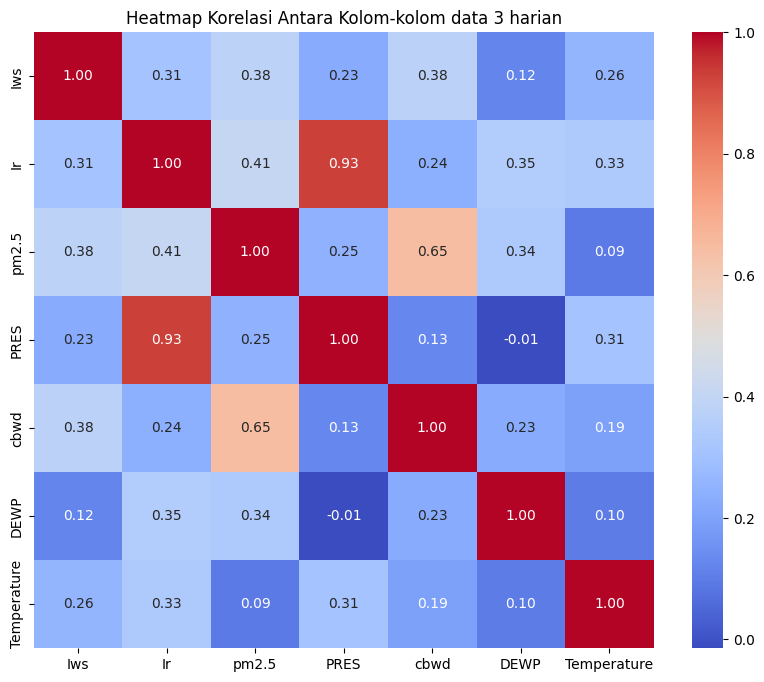

In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
subset_df = df_3daily[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom-kolom data 3 harian')
plt.show()


In [ ]:
# Fungsi untuk mengembalikan nilai sesuai kondisi
def new_category(row):
    if row['temperature_category'] in [0]:
        return 1
    else:
        return 0

# Menerapkan fungsi ke DataFrame dan membuat kolom baru
df_3daily['target'] = df_3daily.apply(new_category, axis=1)

# Menampilkan DataFrame hasil
display(df_3daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median3,...,pm2.5_median3,PRES_median3,cbwd_median3,DEWP_median3,Temperature_median3,PRES_delta,Ir_category,pm2.5_category,temperature_category,target
0,2016-07-01,143.5,8.024750,3.925944,4.799052,1.828906,3.171955,1.680698,23.145128,143.5,...,6.2190,1.9010,3.076,1.736,21.667000,0.000000,0,0,0,1
1,2016-07-04,431.5,10.900330,5.176694,7.399816,2.614052,3.369087,1.912455,29.202805,431.5,...,7.2670,2.6300,3.350,1.949,29.968000,0.785146,0,0,2,0
2,2016-07-07,719.5,11.739184,4.666066,8.298309,2.294354,3.326910,1.691514,30.995924,719.5,...,7.6400,2.1320,3.259,1.675,30.742001,-0.319698,0,0,2,0
3,2016-07-10,1007.5,10.716503,3.494049,7.319694,1.574538,3.312194,1.358510,32.313424,1007.5,...,6.8940,1.4570,2.985,1.310,32.042999,-0.719816,0,0,2,0
4,2016-07-13,1295.5,10.685358,3.016361,7.402642,1.302455,3.161927,1.180191,32.829837,1295.5,...,6.5030,0.9590,2.772,1.127,34.083000,-0.272083,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2018-04-19,63215.5,5.217465,1.089257,8.329483,-0.540938,3.397559,1.117896,10.079667,63215.5,...,8.6885,-0.4970,2.863,1.097,9.989000,-0.011514,0,0,1,0
220,2018-04-22,63503.5,8.563649,1.230222,6.915149,-0.381892,3.559983,1.081618,7.061326,63503.5,...,6.6805,-0.3200,3.076,1.066,7.035000,0.159045,0,0,1,0
221,2018-04-25,63791.5,6.081639,2.219340,8.486441,0.478080,3.360618,1.212927,10.093090,63791.5,...,9.0970,0.4260,2.985,1.218,9.919000,0.859972,0,0,1,0
222,2018-04-28,64079.5,5.396792,1.348372,7.932813,-0.333497,3.682892,1.238441,12.342472,64079.5,...,8.5990,-0.1245,3.229,1.249,12.451000,-0.811576,0,0,0,1


In [ ]:
df_3daily["target"].value_counts(normalize = True)


target
0    0.625
1    0.375
Name: proportion, dtype: float64

## Data Processing 7 harian

Melihat distribusi Data

In [ ]:
df_21

,date,id,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,2016-07-01 00:00:00,0,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,2016-07-01 00:15:00,1,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2016-07-01 00:30:00,2,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,2016-07-01 00:45:00,3,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,2016-07-01 01:00:00,4,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64315,2018-05-01 22:45:00,64315,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,1,0,0
64316,2018-05-01 23:00:00,64316,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,1,0,0
64317,2018-05-01 23:15:00,64317,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,1,0,0
64318,2018-05-01 23:30:00,64318,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000,1,0,0


In [ ]:
df_21.head()

,date,id,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,2016-07-01 00:00:00,0,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,2016-07-01 00:15:00,1,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2016-07-01 00:30:00,2,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,2016-07-01 00:45:00,3,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,2016-07-01 01:00:00,4,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0


In [ ]:

df_minute = df_21[["date", "Iws", "Ir", "pm2.5", "PRES", "cbwd", "DEWP", "Temperature"]]

In [ ]:
df_21

,date,id,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,2016-07-01 00:00:00,0,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,2016-07-01 00:15:00,1,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2016-07-01 00:30:00,2,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,2016-07-01 00:45:00,3,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,2016-07-01 01:00:00,4,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64315,2018-05-01 22:45:00,64315,May 2018,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000,1,0,0
64316,2018-05-01 23:00:00,64316,May 2018,14.200,1.541,9.310,0.284,4.752,1.249,10.482000,1,0,0
64317,2018-05-01 23:15:00,64317,May 2018,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000,1,0,0
64318,2018-05-01 23:30:00,64318,May 2018,13.329,1.541,8.671,-0.533,4.630,1.371,10.341000,1,0,0


In [ ]:
df_21_copy = df_21.copy()
df_21_copy['date'] = pd.to_datetime(df_21_copy['date'])
# Atur kolom 'date' sebagai indeks DataFrame
df_21.set_index('date',inplace=True)

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 7 hari
summary_weather_cat = df_21.groupby(pd.Grouper(freq='7D'))['Weather_Category'].value_counts(normalize=True) * 100
# Tampilkan distribusi nilai
display (summary_weather_cat)


date        Weather_Category
2016-07-01  0                   100.000000
2016-07-08  0                   100.000000
2016-07-15  0                   100.000000
2016-07-22  0                   100.000000
2016-07-29  0                   100.000000
                                   ...    
2018-04-06  0                    99.553571
            1                     0.446429
2018-04-13  0                   100.000000
2018-04-20  0                   100.000000
2018-04-27  0                   100.000000
Name: proportion, Length: 98, dtype: float64

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 7 hari
summary_cat_pm25 = df_21.groupby(pd.Grouper(freq='7D'))['Category_pm2.5'].value_counts(normalize=True) * 100
# Reset indeks DataFrame df_21
df_21.reset_index(inplace=True)
# Tampilkan distribusi nilai
display (summary_cat_pm25)


date        Category_pm2.5
2016-07-01  0                 100.000000
2016-07-08  0                 100.000000
2016-07-15  0                 100.000000
2016-07-22  0                 100.000000
2016-07-29  0                  83.333333
                                 ...    
2018-04-13  1                   9.821429
2018-04-20  0                  98.363095
            1                   1.636905
2018-04-27  0                  94.791667
            1                   5.208333
Name: proportion, Length: 151, dtype: float64

In [ ]:
df_minute.reset_index(inplace=True)
# Atur kolom 'date' sebagai indeks DataFrame
df_minute.set_index('date', inplace=True)

# Resample data menjadi frekuensi 3 hari (7D), kemudian hitung median untuk setiap interval
df_7daily = df_minute.resample('7D').mean()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_7daily.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_7daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353
...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539


In [ ]:
# Resample data menjadi frekuensi 7 hari (7D), kemudian hitung median untuk setiap interval
df_7daily_median = df_minute.resample('7D').median()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_7daily_median.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_7daily_median)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,335.5,10.4490,4.8900,7.000,2.381,3.2290,1.797,27.857000
1,2016-07-08,1007.5,10.3820,3.6170,7.071,1.564,3.0460,1.401,32.360001
2,2016-07-15,1679.5,9.5110,2.4110,6.574,0.888,2.7110,1.066,33.695999
3,2016-07-22,2351.5,13.9320,2.6120,9.346,0.622,4.5990,1.310,39.675999
4,2016-07-29,3023.5,14.5350,3.2150,9.950,0.533,4.2640,1.249,36.651001
...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,9.7455,4.1195,9.275,2.310,3.2290,1.127,6.648000
92,2018-04-06,62159.5,7.3010,2.0090,9.150,0.391,2.9240,1.097,6.613000
93,2018-04-13,62831.5,7.4350,1.1390,8.653,-0.497,2.8785,1.036,6.824000
94,2018-04-20,63503.5,8.6400,1.6080,7.356,-0.107,2.9850,1.097,9.145000


In [ ]:
# Gabungkan DataFrame df_7daily dengan df_7daily_median berdasarkan kolom 'date'
df_7daily = pd.merge(df_7daily, df_7daily_median, on='date', suffixes=('', '_median7'))

# Tampilkan DataFrame hasil gabungan
display(df_7daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,Iws_median7,Ir_median7,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,10.4490,4.8900,7.000,2.381,3.2290,1.797,27.857000
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,10.3820,3.6170,7.071,1.564,3.0460,1.401,32.360001
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,9.5110,2.4110,6.574,0.888,2.7110,1.066,33.695999
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,13.9320,2.6120,9.346,0.622,4.5990,1.310,39.675999
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,14.5350,3.2150,9.950,0.533,4.2640,1.249,36.651001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,9.7455,4.1195,9.275,2.310,3.2290,1.127,6.648000
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,7.3010,2.0090,9.150,0.391,2.9240,1.097,6.613000
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,7.4350,1.1390,8.653,-0.497,2.8785,1.036,6.824000
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,8.6400,1.6080,7.356,-0.107,2.9850,1.097,9.145000


In [ ]:
# Hitung delta dari kolom 'PRES'
df_PRESS_delta = df_7daily['PRES'].diff()

# Menggantikan nilai NaN dengan 0
df_PRESS_delta = df_PRESS_delta.fillna(0)

# Tampilkan DataFrame hasil
print(df_PRESS_delta)


0     0.000000
1    -0.530622
2    -0.629141
3    -0.562984
4     0.390643
        ...   
91   -0.005371
92   -1.559379
93   -1.372430
94    0.488577
95   -0.068737
Name: PRES, Length: 96, dtype: float64


In [ ]:
# Gabungkan df_PRESS_delta ke df_7daily
df_7daily['PRES_delta'] = df_PRESS_delta

# Tampilkan DataFrame hasil gabungan
display(df_7daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,Iws_median7,Ir_median7,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7,PRES_delta
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,10.4490,4.8900,7.000,2.381,3.2290,1.797,27.857000,0.000000
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,10.3820,3.6170,7.071,1.564,3.0460,1.401,32.360001,-0.530622
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,9.5110,2.4110,6.574,0.888,2.7110,1.066,33.695999,-0.629141
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,13.9320,2.6120,9.346,0.622,4.5990,1.310,39.675999,-0.562984
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,14.5350,3.2150,9.950,0.533,4.2640,1.249,36.651001,0.390643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,9.7455,4.1195,9.275,2.310,3.2290,1.127,6.648000,-0.005371
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,7.3010,2.0090,9.150,0.391,2.9240,1.097,6.613000,-1.559379
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,7.4350,1.1390,8.653,-0.497,2.8785,1.036,6.824000,-1.372430
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,8.6400,1.6080,7.356,-0.107,2.9850,1.097,9.145000,0.488577


In [ ]:
# Define fungsi weather_category berdasarkan logika yang telah Anda tentukan
def weather_category(ir_mean):
    if ir_mean < 2 :
        return 0  # minus
    elif 2 < ir_mean <= 10:
        return 0  # ideal
    # Hujan Ekstrem
    else:
        return 1  # tidak bagus

# Buat kolom baru 'Ir_category' dan isi dengan nilai hasil dari fungsi weather_category
df_7daily['Ir_category'] = df_7daily['Ir'].apply(weather_category)

# Tampilkan DataFrame hasil
display(df_7daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,Iws_median7,Ir_median7,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7,PRES_delta,Ir_category
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,10.4490,4.8900,7.000,2.381,3.2290,1.797,27.857000,0.000000,0
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,10.3820,3.6170,7.071,1.564,3.0460,1.401,32.360001,-0.530622,0
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,9.5110,2.4110,6.574,0.888,2.7110,1.066,33.695999,-0.629141,0
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,13.9320,2.6120,9.346,0.622,4.5990,1.310,39.675999,-0.562984,0
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,14.5350,3.2150,9.950,0.533,4.2640,1.249,36.651001,0.390643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,9.7455,4.1195,9.275,2.310,3.2290,1.127,6.648000,-0.005371,0
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,7.3010,2.0090,9.150,0.391,2.9240,1.097,6.613000,-1.559379,0
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,7.4350,1.1390,8.653,-0.497,2.8785,1.036,6.824000,-1.372430,0
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,8.6400,1.6080,7.356,-0.107,2.9850,1.097,9.145000,0.488577,0


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran
# Define fungsi category berdasarkan logika yang telah Anda tentukan
def category(pm25_value):
    if 0 <= pm25_value <= 15.5:
        return 0
    elif 15.5 < pm25_value <= 55.4:  # Penyesuaian batas bawah
        return 1
    elif 55.5 <= pm25_value <= 150.4:
        return 2
    elif 150.5 <= pm25_value <= 250.4:
        return 3
    elif pm25_value > 250.4:
        return 4
    else:
        return 5

# Buat kolom baru 'pm2.5_category' dan isi dengan nilai hasil dari fungsi category
df_7daily['pm2.5_category'] = df_7daily['pm2.5'].apply(category)

# Tampilkan DataFrame hasil
display(df_7daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,Iws_median7,Ir_median7,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7,PRES_delta,Ir_category,pm2.5_category
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,10.4490,4.8900,7.000,2.381,3.2290,1.797,27.857000,0.000000,0,0
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,10.3820,3.6170,7.071,1.564,3.0460,1.401,32.360001,-0.530622,0,0
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,9.5110,2.4110,6.574,0.888,2.7110,1.066,33.695999,-0.629141,0,0
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,13.9320,2.6120,9.346,0.622,4.5990,1.310,39.675999,-0.562984,0,0
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,14.5350,3.2150,9.950,0.533,4.2640,1.249,36.651001,0.390643,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,9.7455,4.1195,9.275,2.310,3.2290,1.127,6.648000,-0.005371,0,0
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,7.3010,2.0090,9.150,0.391,2.9240,1.097,6.613000,-1.559379,0,0
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,7.4350,1.1390,8.653,-0.497,2.8785,1.036,6.824000,-1.372430,0,0
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,8.6400,1.6080,7.356,-0.107,2.9850,1.097,9.145000,0.488577,0,0


In [ ]:
# Define fungsi untuk kategorisasi suhu berdasarkan kriteria
def temperature_category(temperature):
    if 12 <= temperature <= 25:
        return 0  # Suhu Ideal
    elif 4 <= temperature < 12:
        return 1  # Suhu Rendah Tidak Ideal
    elif 26 <= temperature <= 37:
        return 2  # Suhu Tinggi Tidak Ideal
    else:
        return 3  # Suhu Tidak Bagus untuk Menanam Gandum

# Buat kolom baru 'temperature_category' dan isi dengan nilai hasil dari fungsi temperature_category
df_7daily['temperature_category'] = df_7daily['Temperature'].apply(temperature_category)

# Tampilkan DataFrame hasil
display(df_7daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,...,Ir_median7,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7,PRES_delta,Ir_category,pm2.5_category,temperature_category
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,...,4.8900,7.000,2.381,3.2290,1.797,27.857000,0.000000,0,0,2
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,...,3.6170,7.071,1.564,3.0460,1.401,32.360001,-0.530622,0,0,2
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,...,2.4110,6.574,0.888,2.7110,1.066,33.695999,-0.629141,0,0,2
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,...,2.6120,9.346,0.622,4.5990,1.310,39.675999,-0.562984,0,0,3
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,...,3.2150,9.950,0.533,4.2640,1.249,36.651001,0.390643,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,...,4.1195,9.275,2.310,3.2290,1.127,6.648000,-0.005371,0,0,1
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,...,2.0090,9.150,0.391,2.9240,1.097,6.613000,-1.559379,0,0,1
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,...,1.1390,8.653,-0.497,2.8785,1.036,6.824000,-1.372430,0,0,1
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,...,1.6080,7.356,-0.107,2.9850,1.097,9.145000,0.488577,0,0,1


In [ ]:
df_7daily["Ir_category"].value_counts(normalize = True)

Ir_category
0    1.0
Name: proportion, dtype: float64

In [ ]:
df_7daily["pm2.5_category"].value_counts(normalize = True)

pm2.5_category
0    1.0
Name: proportion, dtype: float64

In [ ]:
df_7daily["temperature_category"].value_counts(normalize = True)

temperature_category
1    0.437500
0    0.375000
3    0.114583
2    0.072917
Name: proportion, dtype: float64

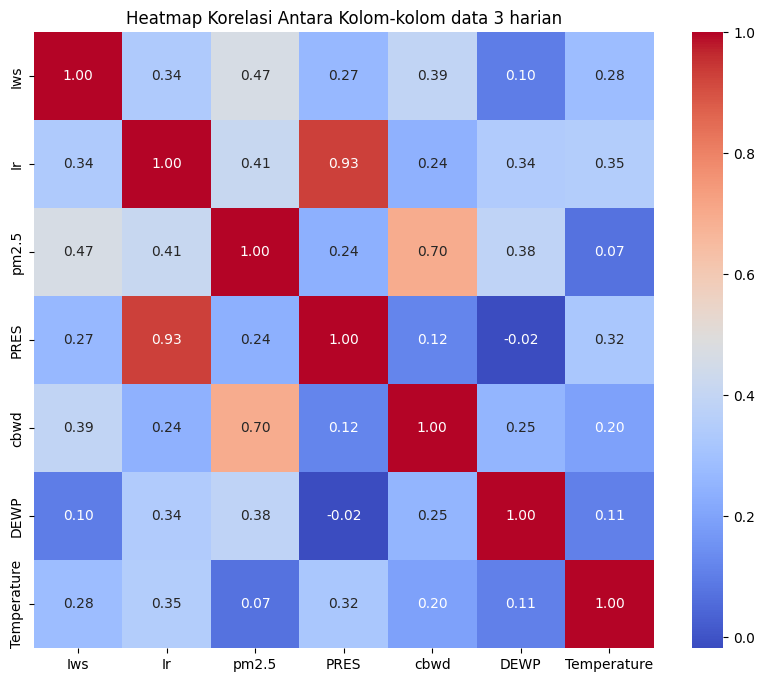

In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature']
subset_df = df_7daily[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom-kolom data 3 harian')
plt.show()


In [ ]:
# Fungsi untuk mengembalikan nilai sesuai kondisi
def new_category(row):
    if row['temperature_category'] in [0]:
        return 1
    else:
        return 0

# Menerapkan fungsi ke DataFrame dan membuat kolom baru
df_7daily['target'] = df_7daily.apply(new_category, axis=1)

# Menampilkan DataFrame hasil
display(df_7daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median7,...,pm2.5_median7,PRES_median7,cbwd_median7,DEWP_median7,Temperature_median7,PRES_delta,Ir_category,pm2.5_category,temperature_category,target
0,2016-07-01,335.5,9.814055,4.598638,6.471445,2.259899,3.247588,1.777787,26.903434,335.5,...,7.000,2.381,3.2290,1.797,27.857000,0.000000,0,0,2,0
1,2016-07-08,1007.5,11.088643,3.721540,7.686615,1.729277,3.296824,1.403478,32.586775,1007.5,...,7.071,1.564,3.0460,1.401,32.360001,-0.530622,0,0,2,0
2,2016-07-15,1679.5,10.261665,2.697292,7.250677,1.100135,2.924726,1.095997,33.147034,1679.5,...,6.574,0.888,2.7110,1.066,33.695999,-0.629141,0,0,2,0
3,2016-07-22,2351.5,14.105080,2.629260,9.375848,0.537152,4.638524,1.334829,39.789612,2351.5,...,9.346,0.622,4.5990,1.310,39.675999,-0.562984,0,0,3,0
4,2016-07-29,3023.5,14.456168,3.032052,10.183923,0.927795,4.154271,1.233564,36.640353,3023.5,...,9.950,0.533,4.2640,1.249,36.651001,0.390643,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2018-03-30,61487.5,8.186680,3.911906,8.265052,2.232859,3.496216,1.060487,7.308583,61487.5,...,9.275,2.310,3.2290,1.127,6.648000,-0.005371,0,0,1,0
92,2018-04-06,62159.5,3.901073,2.337565,9.258269,0.673479,3.353793,1.094899,7.016576,62159.5,...,9.150,0.391,2.9240,1.097,6.613000,-1.559379,0,0,1,0
93,2018-04-13,62831.5,5.022195,0.872939,8.552238,-0.698951,3.320900,1.013926,7.068228,62831.5,...,8.653,-0.497,2.8785,1.036,6.824000,-1.372430,0,0,1,0
94,2018-04-20,63503.5,7.434659,1.416671,7.365790,-0.210374,3.463707,1.130147,8.649539,63503.5,...,7.356,-0.107,2.9850,1.097,9.145000,0.488577,0,0,1,0


In [ ]:
df_7daily["target"].value_counts(normalize = True)


target
0    0.625
1    0.375
Name: proportion, dtype: float64

## Data Processing 1 harian

In [ ]:
df_21.head()

,date,id,years,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,temperature_category,Weather_Category,Category_pm2.5
0,2016-07-01 00:00:00,0,July 2016,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,2,0,0
1,2016-07-01 00:15:00,1,July 2016,5.760,2.076,1.492,0.426,4.264,1.401,30.459999,2,0,0
2,2016-07-01 00:30:00,2,July 2016,5.760,1.942,1.492,0.391,4.234,1.310,30.038000,2,0,0
3,2016-07-01 00:45:00,3,July 2016,5.760,1.942,1.492,0.426,4.234,1.310,27.013000,2,0,0
4,2016-07-01 01:00:00,4,July 2016,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,2,0,0


In [ ]:
df_minute = df_21[["date", "Iws", "Ir", "pm2.5", "PRES", "cbwd", "DEWP", "Temperature"]]


In [ ]:

df_minute = df_21[["date", "Iws", "Ir", "pm2.5", "PRES", "cbwd", "DEWP", "Temperature"]]


In [ ]:
df_21_copy = df_21.copy()
df_21_copy['date'] = pd.to_datetime(df_21_copy['date'])
# Atur kolom 'date' sebagai indeks DataFrame
df_21.set_index('date',inplace=True)

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 1 hari
summary_weather_cat = df_21.groupby(pd.Grouper(freq='1D'))['Weather_Category'].value_counts(normalize=True) * 100
# Tampilkan distribusi nilai
display (summary_weather_cat)


date        Weather_Category
2016-07-01  0                   100.0
2016-07-02  0                   100.0
2016-07-03  0                   100.0
2016-07-04  0                   100.0
2016-07-05  0                   100.0
                                ...  
2018-04-27  0                   100.0
2018-04-28  0                   100.0
2018-04-29  0                   100.0
2018-04-30  0                   100.0
2018-05-01  0                   100.0
Name: proportion, Length: 672, dtype: float64

In [ ]:
# Hitung distribusi nilai untuk kolom 'Category_pm2.5' dan 'Weather_Category' dalam setiap interval 1 hari
summary_cat_pm25 = df_21.groupby(pd.Grouper(freq='1D'))['Category_pm2.5'].value_counts(normalize=True) * 100
# Reset indeks DataFrame df_21
df_21.reset_index(inplace=True)
# Tampilkan distribusi nilai
display (summary_cat_pm25)


date        Category_pm2.5
2016-07-01  0                 100.000000
2016-07-02  0                 100.000000
2016-07-03  0                 100.000000
2016-07-04  0                 100.000000
2016-07-05  0                 100.000000
                                 ...    
2018-04-29  1                   1.041667
2018-04-30  0                  95.833333
            1                   4.166667
2018-05-01  0                  97.916667
            1                   2.083333
Name: proportion, Length: 856, dtype: float64

In [ ]:
df_minute.reset_index(inplace=True)
# Atur kolom 'date' sebagai indeks DataFrame
df_minute.set_index('date', inplace=True)

# Resample data menjadi frekuensi 1 hari (1D), kemudian hitung median untuk setiap interval
df_1daily = df_minute.resample('1D').mean()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_1daily.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_1daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,47.5,5.349938,2.630146,1.992885,0.914625,3.327875,1.509844,21.025677
1,2016-07-02,143.5,8.161677,4.130490,5.246219,2.018031,2.878094,1.648615,22.053792
2,2016-07-03,239.5,10.562635,5.017198,7.158052,2.554063,3.309896,1.883635,26.355917
3,2016-07-04,335.5,10.540958,5.354812,7.010833,2.787604,3.360313,1.918594,27.369385
4,2016-07-05,431.5,11.211573,5.347125,7.584531,2.661406,3.514521,2.018490,30.139260
...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,4.696250,2.566781,9.288667,0.676573,3.410073,1.279875,11.439469
666,2018-04-28,63983.5,4.737448,1.613688,8.640917,-0.135854,3.691885,1.250438,11.125760
667,2018-04-29,64079.5,6.419615,1.178354,7.000781,-0.435292,3.644281,1.197073,12.241115
668,2018-04-30,64175.5,5.033313,1.253073,8.156740,-0.429344,3.712510,1.267812,13.660542


In [ ]:
# Cari nilai maksimum pada kolom Temperature
df_1daily['Temperature'].max()

41.3332814571875

In [ ]:
# Resample data menjadi frekuensi 1 hari (1D), kemudian hitung median untuk setiap interval
df_1daily_median = df_minute.resample('1D').median()

# Jika diperlukan, atur ulang indeks kembali ke bentuk semula
df_1daily_median.reset_index(inplace=True)

# Tampilkan DataFrame hasil
display(df_1daily_median)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000
...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000


In [ ]:
# Gabungkan DataFrame df_1daily dengan df_1daily_median berdasarkan kolom 'date'
df_1daily = pd.merge(df_1daily, df_1daily_median, on='date', suffixes=('', '_median1'))

# Tampilkan DataFrame hasil gabungan
display(df_1daily)

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,index_median1,Iws_median1,Ir_median1,pm2.5_median1,PRES_median1,cbwd_median1,DEWP_median1,Temperature_median1
0,2016-07-01,47.5,5.349938,2.630146,1.992885,0.914625,3.327875,1.509844,21.025677,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000
1,2016-07-02,143.5,8.161677,4.130490,5.246219,2.018031,2.878094,1.648615,22.053792,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000
2,2016-07-03,239.5,10.562635,5.017198,7.158052,2.554063,3.309896,1.883635,26.355917,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999
3,2016-07-04,335.5,10.540958,5.354812,7.010833,2.787604,3.360313,1.918594,27.369385,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000
4,2016-07-05,431.5,11.211573,5.347125,7.584531,2.661406,3.514521,2.018490,30.139260,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,4.696250,2.566781,9.288667,0.676573,3.410073,1.279875,11.439469,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000
666,2018-04-28,63983.5,4.737448,1.613688,8.640917,-0.135854,3.691885,1.250438,11.125760,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000
667,2018-04-29,64079.5,6.419615,1.178354,7.000781,-0.435292,3.644281,1.197073,12.241115,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000
668,2018-04-30,64175.5,5.033313,1.253073,8.156740,-0.429344,3.712510,1.267812,13.660542,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000


In [ ]:
# Resample data menjadi frekuensi 1 hari (1D) dan hitung median untuk setiap interval
df_1daily = df_minute.resample('1D').median()

# Atur ulang indeks kembali ke bentuk semula jika diperlukan
df_1daily.reset_index(inplace=True)

# Buat data delta_temperatur yang berisi selisih antara nilai maksimum dan minimum untuk kolom 'temperatur'
daily_max = df_minute['Temperature'].resample('1D').max()
daily_min = df_minute['Temperature'].resample('1D').min()
df_1daily['delta_Temperature'] = daily_max.values - daily_min.values

# Tampilkan DataFrame hasil
df_1daily

,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001
...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999


In [ ]:
# Buat data delta_PRESS yang berisi selisih antara nilai maksimum dan minimum untuk kolom 'PRES'
daily_max_press = df_minute['PRES'].resample('1D').max()
daily_min_press = df_minute['PRES'].resample('1D').min()
df_1daily['delta_PRESS'] = daily_max_press.values - daily_min_press.values

# Tampilkan DataFrame hasil
print(df_1daily)

          date    index      Iws      Ir   pm2.5    PRES    cbwd    DEWP  \
0   2016-07-01     47.5   5.2240  2.6790  2.1320  0.8880  2.9850  1.4920   
1   2016-07-02    143.5   9.4105  4.2870  6.3255  1.9540  2.8940  1.7360   
2   2016-07-03    239.5  10.4490  5.0230  7.1070  2.5590  3.2900  1.8880   
3   2016-07-04    335.5  10.5160  5.4250  6.9825  2.8250  3.3655  1.9800   
4   2016-07-05    431.5  11.0855  5.3580  7.4620  2.7010  3.4570  2.0100   
..         ...      ...      ...     ...     ...     ...     ...     ...   
665 2018-04-27  63887.5   9.2095  2.5450  9.7190  0.5150  3.0460  1.2790   
666 2018-04-28  63983.5   7.8035  1.8415  9.1150  0.1775  3.2290  1.2640   
667 2018-04-29  64079.5   7.2675  1.5410  7.3915 -0.1420  3.2290  1.2335   
668 2018-04-30  64175.5   7.8705  1.3400  8.6350 -0.6045  3.2745  1.2180   
669 2018-05-01  64271.5   7.2005  0.5695  5.9520 -1.2615  3.1220  1.3710   

     Temperature  delta_Temperature  delta_PRESS  
0      19.768000          14.139999 

In [ ]:
# Define fungsi weather_category berdasarkan logika yang telah Anda tentukan
def weather_category(ir_mean):
    if ir_mean < 2 :
        return 0  # minus
    elif 2 < ir_mean <= 10:
        return 0  # ideal
    # Hujan Ekstrem
    else:
        return 1  # tidak bagus

# Buat kolom baru 'Ir_category' dan isi dengan nilai hasil dari fungsi weather_category
df_1daily['Ir_category'] = df_1daily['Ir'].apply(weather_category)

# Tampilkan DataFrame hasil
display(df_1daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0
...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999,5.295,0


In [ ]:
# 0 = Baik
# 1 = Sedang
# 2 = Tidak Sehat
# 3 = Sangat Tidak Sehat
# 4 = Berbahaya
# 5 = Salah Pengukuran
# Define fungsi category berdasarkan logika yang telah Anda tentukan
def category(pm25_value):
    if 0 <= pm25_value <= 15.5:
        return 0
    elif 15.5 < pm25_value <= 55.4:  # Penyesuaian batas bawah
        return 1
    elif 55.5 <= pm25_value <= 150.4:
        return 2
    elif 150.5 <= pm25_value <= 250.4:
        return 3
    elif pm25_value > 250.4:
        return 4
    else:
        return 5

# Buat kolom baru 'pm2.5_category' dan isi dengan nilai hasil dari fungsi category
df_1daily['pm2.5_category'] = df_1daily['pm2.5'].apply(category)

# Tampilkan DataFrame hasil
display(df_1daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999,5.295,0,0


Iklim : Gandum dapat ditanam dalam berbagai kondisi iklim, namun umumnya lebih menyukai suhu dingin dan curah hujan sedang. Gandum pada suhu 12C hingga 25C dianggap optimal / Ideal


Sumber : https://www.renature.co/commodities/wheat-2/

In [ ]:
# Define fungsi untuk kategorisasi suhu berdasarkan kriteria
def temperature_category(temperature):
    if 12 <= temperature <= 25:
        return 0  # Suhu Ideal
    elif 4 <= temperature < 12:
        return 1  # Suhu Rendah Tidak Ideal
    elif 26 <= temperature <= 37:
        return 2  # Suhu Tinggi Tidak Ideal
    else:
        return 3  # Suhu Tidak Bagus untuk Menanam Gandum

# Buat kolom baru 'temperature_category' dan isi dengan nilai hasil dari fungsi temperature_category
df_1daily['temperature_category'] = df_1daily['Temperature'].apply(temperature_category)

# Tampilkan DataFrame hasil
display(df_1daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,temperature_category
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0,0
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0,0
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0,2
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0,2
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0,1
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0,1
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0,0
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999,5.295,0,0,0


In [ ]:
df_1daily["Ir_category"].value_counts(normalize = True)

Ir_category
0    1.0
Name: proportion, dtype: float64

In [ ]:
df_1daily["pm2.5_category"].value_counts(normalize = True)

pm2.5_category
0    0.998507
1    0.001493
Name: proportion, dtype: float64

In [ ]:
df_1daily["temperature_category"].value_counts(normalize = True)

temperature_category
1    0.405970
0    0.391045
3    0.126866
2    0.076119
Name: proportion, dtype: float64

In [ ]:
# Fungsi untuk mengembalikan nilai sesuai kondisi
def new_category(row):
    if row['temperature_category'] in [0]:
        return 1
    else:
        return 0

# Menerapkan fungsi ke DataFrame dan membuat kolom baru
df_1daily['target'] = df_1daily.apply(new_category, axis=1)

# Menampilkan DataFrame hasil
display(df_1daily)


,date,index,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,temperature_category,target
0,2016-07-01,47.5,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0,0,1
1,2016-07-02,143.5,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0,0,1
2,2016-07-03,239.5,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0,2,0
3,2016-07-04,335.5,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0,2,0
4,2016-07-05,431.5,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,63887.5,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0,1,0
666,2018-04-28,63983.5,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0,1,0
667,2018-04-29,64079.5,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0,0,1
668,2018-04-30,64175.5,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999,5.295,0,0,0,1


In [ ]:
print(df_1daily.columns)

Index(['date', 'index', 'Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP',
       'Temperature', 'delta_Temperature', 'delta_PRESS', 'Ir_category',
       'pm2.5_category', 'temperature_category', 'target'],
      dtype='object')


In [ ]:
df_1daily["target"].value_counts(normalize = True)


target
0    0.608955
1    0.391045
Name: proportion, dtype: float64

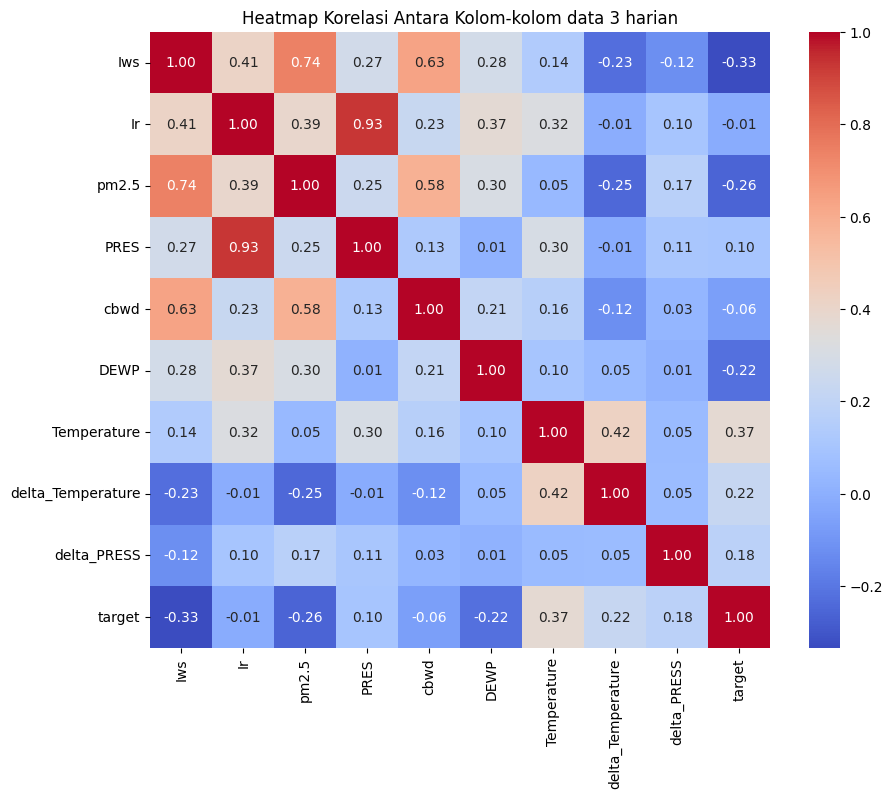

In [ ]:
selected_columns = ['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'Temperature','delta_Temperature','delta_PRESS','target']
subset_df = df_1daily[selected_columns]

# Menghitung matriks korelasi untuk subset dataframe
correlation_matrix = subset_df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom-kolom data 3 harian')
plt.show()


## window prediction

In [ ]:
data = df_1daily[['date', 'Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP',
       'Temperature', 'delta_Temperature','delta_PRESS', 'Ir_category', 'pm2.5_category',
       'temperature_category', 'target']]
data

,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,temperature_category,target
0,2016-07-01,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0,0,1
1,2016-07-02,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0,0,1
2,2016-07-03,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0,2,0
3,2016-07-04,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0,2,0
4,2016-07-05,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0,1,0
666,2018-04-28,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0,1,0
667,2018-04-29,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0,0,1
668,2018-04-30,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,13.366000,5.134999,5.295,0,0,0,1


In [ ]:
data.dtypes

date                    datetime64[ns]
Iws                            float64
Ir                             float64
pm2.5                          float64
PRES                           float64
cbwd                           float64
DEWP                           float64
Temperature                    float64
delta_Temperature              float64
delta_PRESS                    float64
Ir_category                      int64
pm2.5_category                   int64
temperature_category             int64
target                           int64
dtype: object

In [ ]:

# Membuat versi data yang digeser untuk digunakan sebagai output
data_shifted = data.shift(-1)

# Mendefinisikan fitur input (semua kolom kecuali 'target') dan target output (kolom 'target' yang digeser)
X = data.iloc[:-1, :-1]
Y = data_shifted.iloc[:-1, -1]

# Reset indeks untuk menjaga kebersihan data
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

# Menggabungkan X dan Y ke dalam DataFrame akhir untuk pelatihan
final_dataset = pd.concat([X, Y], axis=1)
final_dataset.columns = list(X.columns) + ['target']

# Menampilkan dataset akhir dengan head()
print("Final Dataset:")
display(final_dataset)

# Membuat DataFrame untuk menampilkan pasangan input-output
verification_df = pd.concat([
    X,
    pd.DataFrame({'Tanggal Target': X['date'].shift(-1), 'Target': Y})
], axis=1)

# Menampilkan DataFrame verifikasi dengan head()
print("Verification DataFrame:")
display(verification_df)

Final Dataset:


,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,temperature_category,target
0,2016-07-01,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0,0,1.0
1,2016-07-02,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0,0,0.0
2,2016-07-03,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0,2,0.0
3,2016-07-04,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0,2,0.0
4,2016-07-05,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2018-04-26,9.2430,2.1430,8.0130,0.3730,3.0155,1.2180,10.024500,3.307000,6.112,0,0,1,0.0
665,2018-04-27,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0,1,0.0
666,2018-04-28,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0,1,1.0
667,2018-04-29,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0,0,1.0


Verification DataFrame:


,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,Temperature,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,temperature_category,Tanggal Target,Target
0,2016-07-01,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,19.768000,14.139999,1.848,0,0,0,2016-07-02,1.0
1,2016-07-02,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,21.104000,10.833000,2.630,0,0,0,2016-07-03,0.0
2,2016-07-03,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,26.344999,14.983999,1.777,0,0,2,2016-07-04,0.0
3,2016-07-04,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,27.998000,12.029999,1.670,0,0,2,2016-07-05,0.0
4,2016-07-05,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,30.882000,8.442001,2.203,0,0,2,2016-07-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2018-04-26,9.2430,2.1430,8.0130,0.3730,3.0155,1.2180,10.024500,3.307000,6.112,0,0,1,2018-04-27,0.0
665,2018-04-27,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,11.256000,5.135000,5.827,0,0,1,2018-04-28,0.0
666,2018-04-28,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,10.833000,4.783000,5.544,0,0,1,2018-04-29,1.0
667,2018-04-29,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,12.381000,2.462000,4.442,0,0,0,2018-04-30,1.0


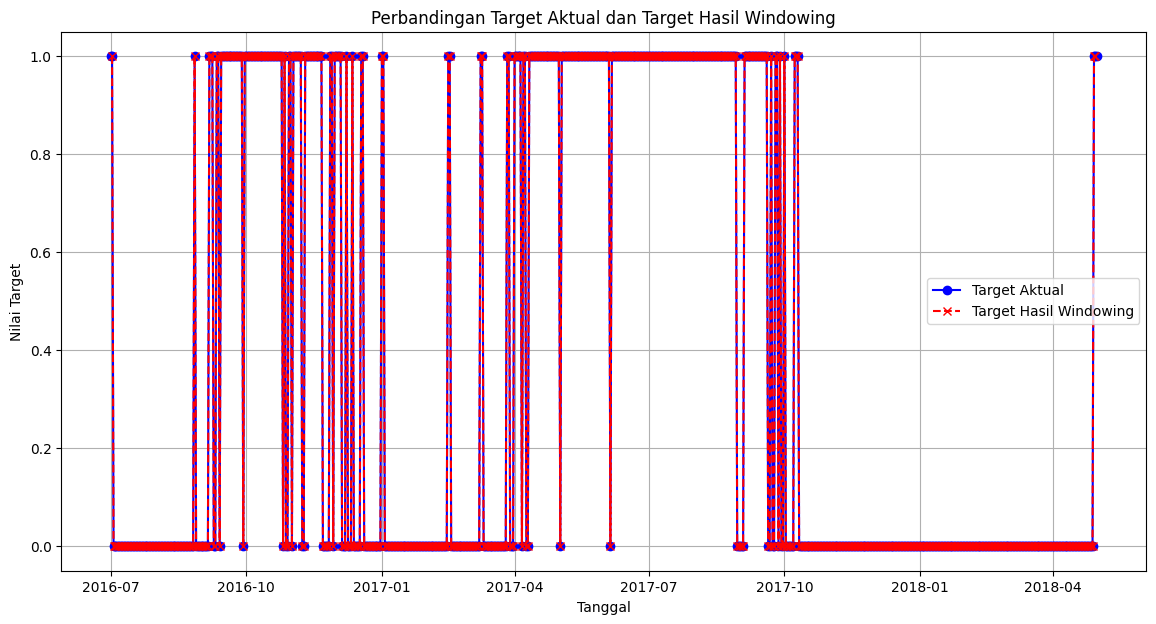

In [ ]:
# Membuat visualisasi perbandingan target aktual dan target hasil windowing
plt.figure(figsize=(14, 7))

# Plot target aktual
plt.plot(data['date'], data['target'], label='Target Aktual', marker='o', linestyle='-', color='blue')

# Plot target hasil windowing
plt.plot(verification_df['Tanggal Target'], verification_df['Target'], label='Target Hasil Windowing', marker='x', linestyle='--', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Nilai Target')
plt.title('Perbandingan Target Aktual dan Target Hasil Windowing')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Asumsi data sudah tersedia
# data = pd.DataFrame(...) # Data Anda yang memiliki kolom 'date' dan 'target'
# verification_df = pd.DataFrame(...) # Data verifikasi Anda yang memiliki kolom 'Tanggal Target' dan 'Target'

# Buat plot interaktif dengan Plotly
fig = go.Figure()

# Plot target aktual
fig.add_trace(go.Scatter(x=data['date'], y=data['target'],
                         mode='lines+markers',
                         name='Target Aktual',
                         marker=dict(color='blue'),
                         line=dict(color='blue')))

# Plot target hasil windowing
fig.add_trace(go.Scatter(x=verification_df['Tanggal Target'], y=verification_df['Target'],
                         mode='lines+markers',
                         name='Target Hasil Windowing',
                         marker=dict(color='red', symbol='x'),
                         line=dict(color='red', dash='dash')))

# Update layout
fig.update_layout(title='Perbandingan Target Aktual dan Target Hasil Windowing',
                  xaxis_title='Tanggal',
                  yaxis_title='Nilai Target',
                  legend_title='Legenda',
                  template='plotly_white')

# Tampilkan plot interaktif
fig.show()


In [ ]:
df_1daily =  df_1daily[['date','Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP','delta_Temperature','delta_PRESS', 'Ir_category', 'pm2.5_category', 'target']]
df_1daily

,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,target
0,2016-07-01,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,14.139999,1.848,0,0,1
1,2016-07-02,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,10.833000,2.630,0,0,1
2,2016-07-03,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,14.983999,1.777,0,0,0
3,2016-07-04,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,12.029999,1.670,0,0,0
4,2016-07-05,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,8.442001,2.203,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
665,2018-04-27,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,5.135000,5.827,0,0,0
666,2018-04-28,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,4.783000,5.544,0,0,0
667,2018-04-29,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,2.462000,4.442,0,0,1
668,2018-04-30,7.8705,1.3400,8.6350,-0.6045,3.2745,1.2180,5.134999,5.295,0,0,1


# Feature Selection

## Feature Selection With WOE (windowing data)

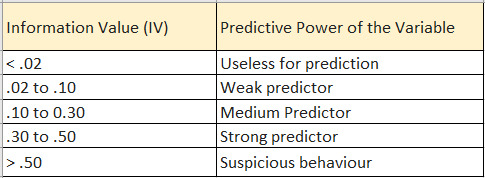


Membuat Data Frame dengan Windowing

In [ ]:
# Buat DataFrame df_window1
df_window1 = df_1daily[['date','Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'delta_Temperature', 'delta_PRESS', 'Ir_category', 'pm2.5_category', 'target']].copy()

# Pindahkan kolom target satu baris ke atas untuk membuat windowing
df_window1['target'] = df_window1['target'].shift(-1)

# Hapus baris terakhir karena tidak memiliki target
df_window1 = df_window1[:-1]

# Tampilkan DataFrame hasil
print(df_window1)


          date      Iws      Ir   pm2.5    PRES    cbwd    DEWP  \
0   2016-07-01   5.2240  2.6790  2.1320  0.8880  2.9850  1.4920   
1   2016-07-02   9.4105  4.2870  6.3255  1.9540  2.8940  1.7360   
2   2016-07-03  10.4490  5.0230  7.1070  2.5590  3.2900  1.8880   
3   2016-07-04  10.5160  5.4250  6.9825  2.8250  3.3655  1.9800   
4   2016-07-05  11.0855  5.3580  7.4620  2.7010  3.4570  2.0100   
..         ...      ...     ...     ...     ...     ...     ...   
664 2018-04-26   9.2430  2.1430  8.0130  0.3730  3.0155  1.2180   
665 2018-04-27   9.2095  2.5450  9.7190  0.5150  3.0460  1.2790   
666 2018-04-28   7.8035  1.8415  9.1150  0.1775  3.2290  1.2640   
667 2018-04-29   7.2675  1.5410  7.3915 -0.1420  3.2290  1.2335   
668 2018-04-30   7.8705  1.3400  8.6350 -0.6045  3.2745  1.2180   

     delta_Temperature  delta_PRESS  Ir_category  pm2.5_category  target  
0            14.139999        1.848            0               0     1.0  
1            10.833000        2.630          

In [ ]:
df_window1.dtypes

date                 datetime64[ns]
Iws                         float64
Ir                          float64
pm2.5                       float64
PRES                        float64
cbwd                        float64
DEWP                        float64
delta_Temperature           float64
delta_PRESS                 float64
Ir_category                   int64
pm2.5_category                int64
target                      float64
dtype: object

In [ ]:
df_window1.describe()

,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,target
count,669,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.0,669.000000,669.000000
mean,2017-05-31 00:00:00,8.915318,2.097451,6.940617,0.758803,2.950933,0.805845,5.783408,3.786450,0.0,0.001495,0.390135
min,2016-07-01 00:00:00,0.000000,-3.181500,0.000000,-4.620000,0.000000,-1.036000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2016-12-15 00:00:00,7.368000,0.737000,5.596500,-0.515000,2.421500,0.731000,4.009000,3.056000,0.0,0.000000,0.000000
50%,2017-05-31 00:00:00,8.406000,2.210000,6.663000,1.066000,2.772000,0.959500,5.417001,3.731000,0.0,0.000000,0.000000
75%,2017-11-14 00:00:00,10.181000,3.282000,8.280000,1.830000,3.229000,1.127000,7.316000,4.513000,0.0,0.000000,1.000000
max,2018-04-30 00:00:00,21.367001,7.937500,16.346001,5.206000,8.285000,2.010000,18.572002,10.483000,0.0,1.000000,1.000000
std,NaN,2.428171,1.692246,1.977347,1.542583,0.898057,0.568071,2.655908,1.393733,0.0,0.038662,0.488145


In [ ]:
# Asumsikan df_category sudah ada dan memiliki kolom-kolom yang disebutkan
# Buat DataFrame df_category dengan kolom yang diperlukan
df_category_w = df_window1[['Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP', 'delta_Temperature', 'delta_PRESS', 'Ir_category', 'pm2.5_category', 'target']].copy()

In [ ]:
# Fungsi untuk mengkategorikan kolom berdasarkan persentil
def categorize_column(df, column_name):
    df.loc[:, column_name + '_category_w'] = pd.qcut(df[column_name], q=[0, 0.1, 0.5, 0.9, 1.0], labels=[1, 2, 3, 4])

# Mengkategorikan kolom-kolom yang diperlukan
categorize_column(df_category_w, 'Iws')
categorize_column(df_category_w, 'Ir')
categorize_column(df_category_w, 'pm2.5')
categorize_column(df_category_w, 'PRES')
categorize_column(df_category_w, 'cbwd')
categorize_column(df_category_w, 'DEWP')
categorize_column(df_category_w, 'delta_Temperature')
categorize_column(df_category_w, 'delta_PRESS')

# Tampilkan DataFrame hasil
display(df_category_w)


,Iws,Ir,pm2.5,PRES,cbwd,DEWP,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,target,Iws_category_w,Ir_category_w,pm2.5_category_w,PRES_category_w,cbwd_category_w,DEWP_category_w,delta_Temperature_category_w,delta_PRESS_category_w
0,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,14.139999,1.848,0,0,1.0,1,3,1,2,3,4,4,1
1,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,10.833000,2.630,0,0,0.0,3,4,2,3,3,4,4,2
2,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,14.983999,1.777,0,0,0.0,3,4,3,3,3,4,4,1
3,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,12.029999,1.670,0,0,0.0,3,4,3,4,3,4,4,1
4,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,8.442001,2.203,0,0,0.0,3,4,3,4,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,9.2430,2.1430,8.0130,0.3730,3.0155,1.2180,3.307000,6.112,0,0,0.0,3,2,3,2,3,3,2,4
665,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,5.135000,5.827,0,0,0.0,3,3,3,2,3,4,2,4
666,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,4.783000,5.544,0,0,1.0,2,2,3,2,3,4,2,4
667,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,2.462000,4.442,0,0,1.0,2,2,3,2,3,3,1,3


In [ ]:
import pandas as pd

# Asumsikan df_pm25 sudah ada dan memiliki kolom-kolom yang disebutkan
# Buat DataFrame df_category dengan kolom yang diperlukan
df_category_w1 = df_window1[['Iws','target']].copy()

# Fungsi untuk mengkategorikan kolom berdasarkan persentil yang baru
def categorize_column(df, column_name):
    df[column_name + '_category_w1'] = pd.qcut(df[column_name], q=[0, 0.4, 0.75, 1.0], labels=[1, 2, 3])


# Mengkategorikan kolom 'pm2.5' dengan persentil yang baru
categorize_column(df_category_w1,'Iws')


# Tampilkan DataFrame hasil
display(df_category_w1)


,Iws,target,Iws_category_w1
0,5.2240,1.0,1
1,9.4105,0.0,2
2,10.4490,0.0,3
3,10.5160,0.0,3
4,11.0855,0.0,3
...,...,...,...
664,9.2430,0.0,2
665,9.2095,0.0,2
666,7.8035,1.0,1
667,7.2675,1.0,1


In [ ]:
def calculate_woe(data, feature, target):
    cross_table = pd.crosstab(data[feature], data[target], margins=True, margins_name="Total")
    total_nonevent = cross_table[0]["Total"]
    total_event = cross_table[1]["Total"]

    def nonevent(row):
        if row[0] == 0:
            return np.nan
        return row[0] / total_nonevent

    def event(row):
        if row[1] == 0:
            return np.nan
        return row[1] / total_event

    cross_table["%nonevent"] = cross_table.apply(nonevent, axis=1)
    cross_table["%event"] = cross_table.apply(event, axis=1)

    # Penanganan khusus untuk kategori dengan pembagian oleh nol
    cross_table["WoE"] = np.log(cross_table["%nonevent"] / cross_table["%event"]).replace({np.inf: np.nan, -np.inf: np.nan})

    cross_table["IV"] = (cross_table["%nonevent"] - cross_table["%event"]) * cross_table["WoE"]

    # Pernyataan IV
    iv_statement = ""
    iv = cross_table["IV"].sum()
    if iv < 0.02:
        iv_statement = "Tidak berguna untuk prediksi"
    elif iv <= 0.1:
        iv_statement = "Prediktor yang lemah"
    elif iv <= 0.3:
        iv_statement = "Prediktor Sedang"
    elif iv <= 0.5:
        iv_statement = "Prediktor yang kuat"
    else:
        iv_statement = "Perilaku mencurigakan"

    return cross_table, iv, iv_statement


In [ ]:
# Buat DataFrame dari df_category
data = pd.DataFrame(df_category_w)

# Kolom target
target = 'target'

# List kolom kategori yang akan dianalisis
columns_to_analyze = ['Iws_category_w','Ir_category_w', 'pm2.5_category_w', 'PRES_category_w', 'cbwd_category_w', 'DEWP_category_w','delta_Temperature_category_w','delta_PRESS_category_w']
# Loop untuk menghitung WOE dan IV untuk setiap kolom
for column in columns_to_analyze:
    print("Analisis untuk kolom:", column)
    woe_result, iv, iv_statement = calculate_woe(data, column, target)
    display(woe_result)

    # Cetak jumlah IV dan pernyataan IV
    print("Total IV untuk", column, ":", iv)
    print("Interpretasi IV untuk", column, ":", iv_statement)
    print()


Analisis untuk kolom: Iws_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
Iws_category_w,,,,,,,
1,17,56,73,0.041667,0.214559,-1.638885,0.283351
2,136,126,262,0.333333,0.482759,-0.370374,0.055343
3,197,71,268,0.482843,0.272031,0.573777,0.120959
4,58,8,66,0.142157,0.030651,1.534255,0.171078
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk Iws_category_w : 0.6307317599198607
Interpretasi IV untuk Iws_category_w : Perilaku mencurigakan

Analisis untuk kolom: Ir_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
Ir_category_w,,,,,,,
1,54,27,81,0.132353,0.103448,0.246400,0.007122
2,127,127,254,0.311275,0.486590,-0.446747,0.078322
3,178,90,268,0.436275,0.344828,0.235227,0.021511
4,49,17,66,0.120098,0.065134,0.611860,0.033630
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk Ir_category_w : 0.14058480924528755
Interpretasi IV untuk Ir_category_w : Prediktor Sedang

Analisis untuk kolom: pm2.5_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
pm2.5_category_w,,,,,,,
1,18,50,68,0.044118,0.191571,-1.468398,0.216520
2,146,123,269,0.357843,0.471264,-0.275325,0.031228
3,192,73,265,0.470588,0.279693,0.520289,0.099320
4,52,15,67,0.127451,0.057471,0.796447,0.055735
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk pm2.5_category_w : 0.4028032665757016
Interpretasi IV untuk pm2.5_category_w : Prediktor yang kuat

Analisis untuk kolom: PRES_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
PRES_category_w,,,,,,,
1,51,17,68,0.125000,0.065134,0.651866,0.039025
2,158,111,269,0.387255,0.425287,-0.093682,0.003563
3,155,110,265,0.379902,0.421456,-0.103802,0.004313
4,44,23,67,0.107843,0.088123,0.201949,0.003983
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk PRES_category_w : 0.05088339179866133
Interpretasi IV untuk PRES_category_w : Prediktor yang lemah

Analisis untuk kolom: cbwd_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
cbwd_category_w,,,,,,,
1,22,48,70,0.053922,0.183908,-1.226905,0.159481
2,151,121,272,0.370098,0.463602,-0.225257,0.021062
3,197,63,260,0.482843,0.241379,0.693322,0.167412
4,38,29,67,0.093137,0.111111,-0.176456,0.003172
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk cbwd_category_w : 0.3511273049278228
Interpretasi IV untuk cbwd_category_w : Prediktor yang kuat

Analisis untuk kolom: DEWP_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
DEWP_category_w,,,,,,,
1,10,58,68,0.024510,0.222222,-2.204605,0.435878
2,184,85,269,0.450980,0.325670,0.325538,0.040793
3,176,91,267,0.431373,0.348659,0.212878,0.017608
4,38,27,65,0.093137,0.103448,-0.104997,0.001083
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk DEWP_category_w : 0.4953613247451732
Interpretasi IV untuk DEWP_category_w : Prediktor yang kuat

Analisis untuk kolom: delta_Temperature_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
delta_Temperature_category_w,,,,,,,
1,55,12,67,0.134804,0.045977,1.075680,0.095549
2,183,85,268,0.448529,0.325670,0.320088,0.039326
3,140,127,267,0.343137,0.486590,-0.349291,0.050107
4,30,37,67,0.073529,0.141762,-0.656467,0.044793
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk delta_Temperature_category_w : 0.2297745775186704
Interpretasi IV untuk delta_Temperature_category_w : Prediktor Sedang

Analisis untuk kolom: delta_PRESS_category_w


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
delta_PRESS_category_w,,,,,,,
1,46,21,67,0.112745,0.080460,0.337372,0.010892
2,180,88,268,0.441176,0.337165,0.268873,0.027966
3,150,117,267,0.367647,0.448276,-0.198285,0.015988
4,32,35,67,0.078431,0.134100,-0.536359,0.029858
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk delta_PRESS_category_w : 0.0847038177945992
Interpretasi IV untuk delta_PRESS_category_w : Prediktor yang lemah



In [ ]:
# Buat DataFrame dari df_category
data = pd.DataFrame(df_category_w1)

# Kolom target
target = 'target'

# List kolom kategori yang akan dianalisis
columns_to_analyze = ['Iws_category_w1']
# Loop untuk menghitung WOE dan IV untuk setiap kolom
for column in columns_to_analyze:
    print("Analisis untuk kolom:", column)
    woe_result, iv, iv_statement = calculate_woe(data, column, target)
    display(woe_result)

    # Cetak jumlah IV dan pernyataan IV
    print("Total IV untuk", column, ":", iv)
    print("Interpretasi IV untuk", column, ":", iv_statement)
    print()


Analisis untuk kolom: Iws_category_w1


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
Iws_category_w1,,,,,,,
1,116,153,269,0.284314,0.586207,-0.723594,0.218448
2,151,83,234,0.370098,0.318008,0.151692,0.007902
3,141,25,166,0.345588,0.095785,1.283137,0.320531
Total,408,261,669,1.000000,1.000000,0.000000,0.000000


Total IV untuk Iws_category_w1 : 0.5468812379163088
Interpretasi IV untuk Iws_category_w1 : Perilaku mencurigakan



kedua di bawah ini tidak akan saya gunakan karena target berdasarkan kriteria disini maka tidak di gunakan

In [ ]:
# Buat DataFrame dari df_category
data = pd.DataFrame(df_window1)

# Kolom target
target = 'target'

# List kolom kategori yang akan dianalisis
columns_to_analyze = ['Ir_category', 'pm2.5_category']
# Loop untuk menghitung WOE dan IV untuk setiap kolom
for column in columns_to_analyze:
    print("Analisis untuk kolom:", column)
    woe_result, iv, iv_statement = calculate_woe(data, column, target)
    display(woe_result)

    # Cetak jumlah IV dan pernyataan IV
    print("Total IV untuk", column, ":", iv)
    print("Interpretasi IV untuk", column, ":", iv_statement)
    print()


Analisis untuk kolom: Ir_category


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
Ir_category,,,,,,,
0,408,261,669,1.0,1.0,0.0,0.0
Total,408,261,669,1.0,1.0,0.0,0.0


Total IV untuk Ir_category : 0.0
Interpretasi IV untuk Ir_category : Tidak berguna untuk prediksi

Analisis untuk kolom: pm2.5_category


target,0.0,1.0,Total,%nonevent,%event,WoE,IV
pm2.5_category,,,,,,,
0,407,261,668,0.997549,1.0,-0.002454,0.000006
1,1,0,1,0.002451,NaN,NaN,NaN
Total,408,261,669,1.000000,1.0,0.000000,0.000000


Total IV untuk pm2.5_category : 6.0146788273693484e-06
Interpretasi IV untuk pm2.5_category : Tidak berguna untuk prediksi



kolom yang akan di pilih yaitu :
- Ir_category_w
- pm2.5_category_w
- cbwd_category_w
- DEWP_category_w
- delta_Temperature_category_w
- Iws_category_w1


In [ ]:
# df_win.to_csv("Feature Selection.csv")

Dibawah ini adalah feature yang akan di pakai modelling

In [ ]:
df =['date', 'Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP','delta_Temperature','target','Ir_category_w','pm2.5_category_w','cbwd_category_w','DEWP_category_w','delta_Temperature_category_w','Iws_category_w1']

kolom yang akan di pilih yaitu :
- Ir_category_w
- pm2.5_category_w
- cbwd_category_w
- DEWP_category_w
- delta_Temperature_category_w
- Iws_category_w1


# ML with windowing

In [ ]:
df_window1

,date,Iws,Ir,pm2.5,PRES,cbwd,DEWP,delta_Temperature,delta_PRESS,Ir_category,pm2.5_category,target
0,2016-07-01,5.2240,2.6790,2.1320,0.8880,2.9850,1.4920,14.139999,1.848,0,0,1.0
1,2016-07-02,9.4105,4.2870,6.3255,1.9540,2.8940,1.7360,10.833000,2.630,0,0,0.0
2,2016-07-03,10.4490,5.0230,7.1070,2.5590,3.2900,1.8880,14.983999,1.777,0,0,0.0
3,2016-07-04,10.5160,5.4250,6.9825,2.8250,3.3655,1.9800,12.029999,1.670,0,0,0.0
4,2016-07-05,11.0855,5.3580,7.4620,2.7010,3.4570,2.0100,8.442001,2.203,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
664,2018-04-26,9.2430,2.1430,8.0130,0.3730,3.0155,1.2180,3.307000,6.112,0,0,0.0
665,2018-04-27,9.2095,2.5450,9.7190,0.5150,3.0460,1.2790,5.135000,5.827,0,0,0.0
666,2018-04-28,7.8035,1.8415,9.1150,0.1775,3.2290,1.2640,4.783000,5.544,0,0,1.0
667,2018-04-29,7.2675,1.5410,7.3915,-0.1420,3.2290,1.2335,2.462000,4.442,0,0,1.0


In [ ]:
df_win = df_window1[['date', 'Ir','Iws', 'pm2.5','cbwd', 'DEWP','delta_Temperature','target']]

In [ ]:
df_win

,date,Ir,Iws,pm2.5,cbwd,DEWP,delta_Temperature,target
0,2016-07-01,2.6790,5.2240,2.1320,2.9850,1.4920,14.139999,1.0
1,2016-07-02,4.2870,9.4105,6.3255,2.8940,1.7360,10.833000,0.0
2,2016-07-03,5.0230,10.4490,7.1070,3.2900,1.8880,14.983999,0.0
3,2016-07-04,5.4250,10.5160,6.9825,3.3655,1.9800,12.029999,0.0
4,2016-07-05,5.3580,11.0855,7.4620,3.4570,2.0100,8.442001,0.0
...,...,...,...,...,...,...,...,...
664,2018-04-26,2.1430,9.2430,8.0130,3.0155,1.2180,3.307000,0.0
665,2018-04-27,2.5450,9.2095,9.7190,3.0460,1.2790,5.135000,0.0
666,2018-04-28,1.8415,7.8035,9.1150,3.2290,1.2640,4.783000,1.0
667,2018-04-29,1.5410,7.2675,7.3915,3.2290,1.2335,2.462000,1.0


kolom yang akan di pilih yaitu :
- Ir_category_w
- pm2.5_category_w
- cbwd_category_w
- DEWP_category_w
- delta_Temperature_category_w
- Iws_category_w1


In [ ]:
# Menggabungkan kolom kategori dari df_category_w ke df_win
df_win = pd.merge(df_win, df_category_w[['Ir_category_w','pm2.5_category_w','cbwd_category_w', 'DEWP_category_w','delta_Temperature_category_w',]], left_index=True, right_index=True)

# Tampilkan DataFrame hasil
print(df_win)


          date      Ir      Iws   pm2.5    cbwd    DEWP  delta_Temperature  \
0   2016-07-01  2.6790   5.2240  2.1320  2.9850  1.4920          14.139999   
1   2016-07-02  4.2870   9.4105  6.3255  2.8940  1.7360          10.833000   
2   2016-07-03  5.0230  10.4490  7.1070  3.2900  1.8880          14.983999   
3   2016-07-04  5.4250  10.5160  6.9825  3.3655  1.9800          12.029999   
4   2016-07-05  5.3580  11.0855  7.4620  3.4570  2.0100           8.442001   
..         ...     ...      ...     ...     ...     ...                ...   
664 2018-04-26  2.1430   9.2430  8.0130  3.0155  1.2180           3.307000   
665 2018-04-27  2.5450   9.2095  9.7190  3.0460  1.2790           5.135000   
666 2018-04-28  1.8415   7.8035  9.1150  3.2290  1.2640           4.783000   
667 2018-04-29  1.5410   7.2675  7.3915  3.2290  1.2335           2.462000   
668 2018-04-30  1.3400   7.8705  8.6350  3.2745  1.2180           5.134999   

     target Ir_category_w pm2.5_category_w cbwd_category_w DEWP

In [ ]:
# Menggabungkan kolom kategori dari df_category_w1 ke df_win
df_win = pd.merge(df_win, df_category_w1[['Iws_category_w1']], left_index=True, right_index=True)

# Tampilkan DataFrame hasil
print(df_win)


          date      Ir      Iws   pm2.5    cbwd    DEWP  delta_Temperature  \
0   2016-07-01  2.6790   5.2240  2.1320  2.9850  1.4920          14.139999   
1   2016-07-02  4.2870   9.4105  6.3255  2.8940  1.7360          10.833000   
2   2016-07-03  5.0230  10.4490  7.1070  3.2900  1.8880          14.983999   
3   2016-07-04  5.4250  10.5160  6.9825  3.3655  1.9800          12.029999   
4   2016-07-05  5.3580  11.0855  7.4620  3.4570  2.0100           8.442001   
..         ...     ...      ...     ...     ...     ...                ...   
664 2018-04-26  2.1430   9.2430  8.0130  3.0155  1.2180           3.307000   
665 2018-04-27  2.5450   9.2095  9.7190  3.0460  1.2790           5.135000   
666 2018-04-28  1.8415   7.8035  9.1150  3.2290  1.2640           4.783000   
667 2018-04-29  1.5410   7.2675  7.3915  3.2290  1.2335           2.462000   
668 2018-04-30  1.3400   7.8705  8.6350  3.2745  1.2180           5.134999   

     target Ir_category_w pm2.5_category_w cbwd_category_w DEWP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Membuat DataFrame df_window
df_window = df_1daily[['date', 'Iws', 'Ir', 'pm2.5', 'PRES', 'cbwd', 'DEWP','delta_Temperature','target']]

In [ ]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi fitur dan target
X = df_win.drop(['date', 'target'], axis=1)
y = df_win['target']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
# Membuat dan melatih model Logistic Regression_
modellog = LogisticRegression(solver='saga', max_iter=10000)
modellog.fit(X_train, y_train)


LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
# Melakukan prediksi
y_pred_winlog = modellog.predict(X_train)

# Menghitung akurasi
accuracy = accuracy_score(y_train, y_pred_winlog)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_train, y_pred_winlog))

# Menampilkan tabel hasil prediksi
# Menampilkan tabel hasil prediksi
results = pd.DataFrame({'Date': df_window.loc[y_train.index, 'date'], 'Actual': y_train.values, 'Predicted': y_pred_winlog})
print(results)


Accuracy: 0.7276785714285714
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.84      0.79       269
         1.0       0.70      0.56      0.62       179

    accuracy                           0.73       448
   macro avg       0.72      0.70      0.70       448
weighted avg       0.72      0.73      0.72       448

          Date  Actual  Predicted
314 2017-05-11     1.0        1.0
495 2017-11-08     0.0        0.0
487 2017-10-31     0.0        0.0
259 2017-03-17     0.0        0.0
203 2017-01-20     0.0        0.0
..         ...     ...        ...
71  2016-09-10     1.0        0.0
106 2016-10-15     1.0        0.0
270 2017-03-28     0.0        1.0
435 2017-09-09     1.0        0.0
102 2016-10-11     1.0        1.0

[448 rows x 3 columns]


<Axes: >

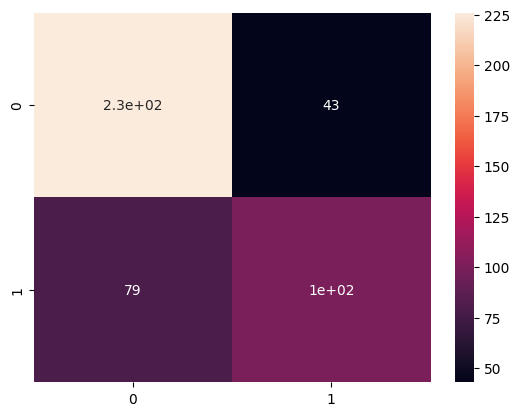

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cf_matrix_winlog = confusion_matrix(y_train, y_pred_winlog)
sns.heatmap(cf_matrix_winlog, annot=True)

In [ ]:
# Melakukan prediksi
y_pred = modellog.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Menampilkan tabel hasil prediksi
# Menampilkan tabel hasil prediksi
results = pd.DataFrame({'Date': df_window.loc[y_test.index, 'date'], 'Actual': y_test.values, 'Predicted': y_pred})
print(results)


Accuracy: 0.7782805429864253
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       139
         1.0       0.71      0.67      0.69        82

    accuracy                           0.78       221
   macro avg       0.76      0.76      0.76       221
weighted avg       0.78      0.78      0.78       221

          Date  Actual  Predicted
361 2017-06-27     1.0        1.0
158 2016-12-06     0.0        0.0
478 2017-10-22     0.0        1.0
533 2017-12-16     0.0        0.0
275 2017-04-02     1.0        0.0
..         ...     ...        ...
286 2017-04-13     1.0        1.0
588 2018-02-09     0.0        0.0
654 2018-04-16     0.0        0.0
643 2018-04-05     0.0        1.0
84  2016-09-23     1.0        0.0

[221 rows x 3 columns]


In [ ]:
results.to_csv("Hasil Prediksi.csv")

<Axes: >

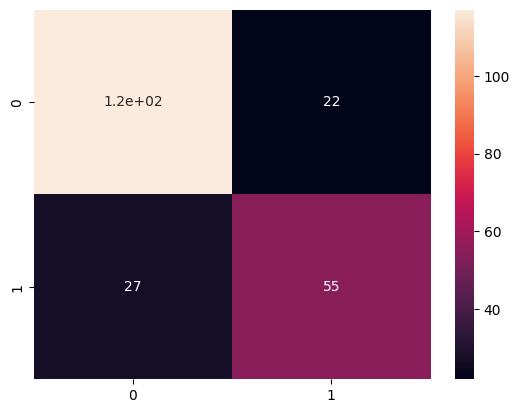

In [ ]:
cf_matrix_winlogt = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix_winlogt, annot=True)

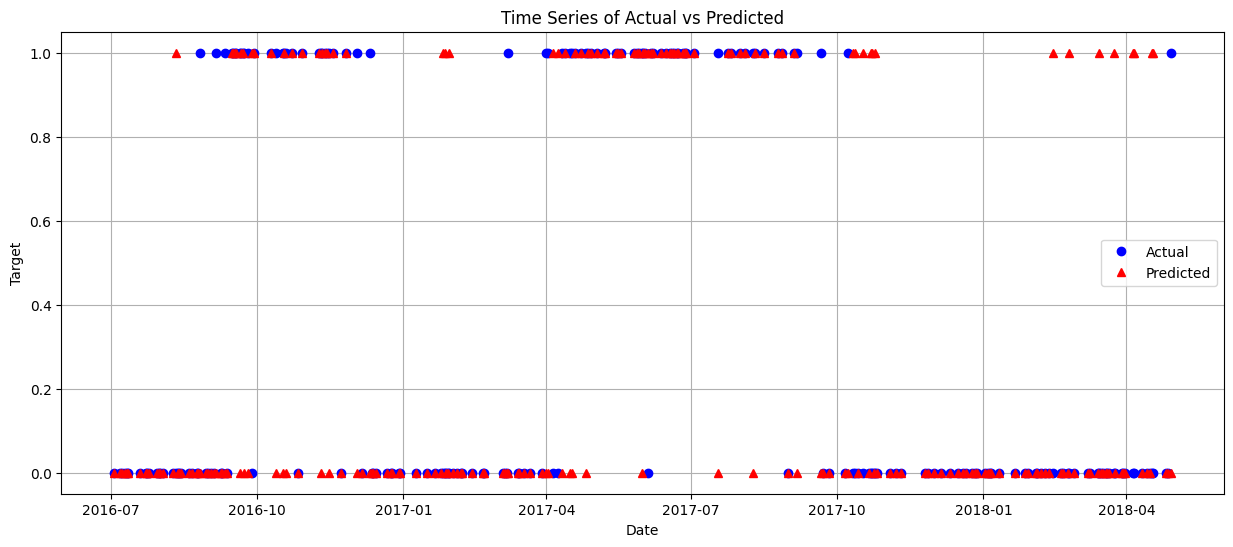

In [ ]:
# Visualisasi Time Series antara Prediksi dan Actual
plt.figure(figsize=(15, 6))
plt.plot(results['Date'], results['Actual'], 'o', label='Actual', color='blue')  # Lingkaran untuk nilai aktual
plt.plot(results['Date'], results['Predicted'], '^', label='Predicted', color='red')  # Segitiga untuk nilai prediksi
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Time Series of Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objs as go

# Create traces
trace_actual = go.Scatter(
    x=results['Date'],
    y=results['Actual'],
    mode='markers',
    name='Actual',
    marker=dict(color='blue', symbol='circle', size=8)
)

trace_predicted = go.Scatter(
    x=results['Date'],
    y=results['Predicted'],
    mode='markers',
    name='Predicted',
    marker=dict(color='red', symbol='triangle-up', size=8)
)

# Create layout
layout = go.Layout(
    title='Time Series of Actual vs Predicted',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Target'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_actual, trace_predicted], layout=layout)

# Show figure
fig.show()


Hasil Prediksi

In [ ]:
import plotly.graph_objs as go

# Create trace for predicted values
trace_predicted = go.Scatter(
    x=results['Date'],
    y=results['Predicted'],
    mode='markers',
    name='Predicted',
    marker=dict(color='red', symbol='triangle-up', size=8)
)

# Create layout
layout = go.Layout(
    title='Time Series of Predicted Values',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Target'),
    showlegend=True
)

# Create figure
fig = go.Figure(data=[trace_predicted], layout=layout)

# Show figure
fig.show()


## Gradient Boosting Machine (GBM)

membuat windowing

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split


# Asumsikan df_window1 adalah DataFrame Anda
X = df_window1.drop(columns=['date', 'target'])
y = df_window1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Membuat dan melatih model Gradient Boosting
gbm_model = GradientBoostingClassifier(random_state=42,max_depth = 1,learning_rate = 2)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=2, max_depth=1, random_state=42)

GBM Accuracy: 0.7366071428571429
GBM Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.71      0.76       269
         1.0       0.64      0.77      0.70       179

    accuracy                           0.74       448
   macro avg       0.73      0.74      0.73       448
weighted avg       0.75      0.74      0.74       448

          Date  Actual  Predicted
314 2017-05-11     1.0        1.0
495 2017-11-08     0.0        0.0
487 2017-10-31     0.0        0.0
259 2017-03-17     0.0        0.0
203 2017-01-20     0.0        0.0
..         ...     ...        ...
71  2016-09-10     1.0        0.0
106 2016-10-15     1.0        0.0
270 2017-03-28     0.0        1.0
435 2017-09-09     1.0        1.0
102 2016-10-11     1.0        0.0

[448 rows x 3 columns]


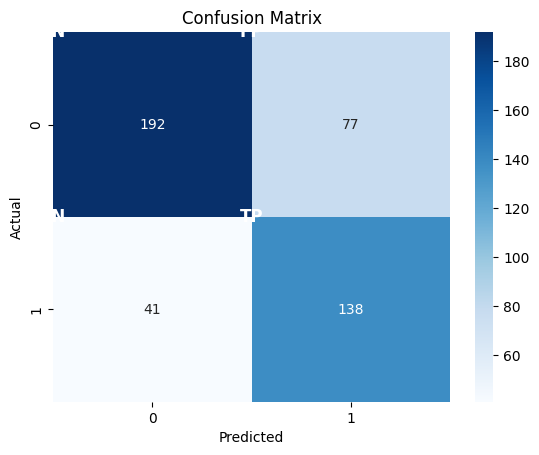

In [ ]:
# Melakukan prediksi
y_pred_gbm_wind = gbm_model.predict(X_train)

# Menghitung akurasi
accuracy_gbm_wind = accuracy_score(y_train, y_pred_gbm_wind)
print("GBM Accuracy:", accuracy_gbm_wind)
print("GBM Classification Report:\n", classification_report(y_train, y_pred_gbm_wind))

# Menampilkan tabel hasil prediksi
results_gbm_wind = pd.DataFrame({'Date': df_window1.loc[y_train.index, 'date'], 'Actual': y_train.values, 'Predicted': y_pred_gbm_wind})
print(results_gbm_wind)

# Confusion Matrix
conf_matrix_gbm = confusion_matrix(y_train, y_pred_gbm_wind)
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')

# Menandai kotak
plt.text(0, 0, "TN", ha="center", va="center", color="white", fontsize=12, fontweight='bold')
plt.text(1, 0, "FP", ha="center", va="center", color="white", fontsize=12, fontweight='bold')
plt.text(0, 1, "FN", ha="center", va="center", color="white", fontsize=12, fontweight='bold')
plt.text(1, 1, "TP", ha="center", va="center", color="white", fontsize=12, fontweight='bold')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



GBM Accuracy: 0.665158371040724
GBM Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.60      0.69       139
         1.0       0.53      0.77      0.63        82

    accuracy                           0.67       221
   macro avg       0.67      0.69      0.66       221
weighted avg       0.71      0.67      0.67       221

          Date  Actual  Predicted
361 2017-06-27     1.0        1.0
158 2016-12-06     0.0        1.0
478 2017-10-22     0.0        1.0
533 2017-12-16     0.0        0.0
275 2017-04-02     1.0        1.0
..         ...     ...        ...
286 2017-04-13     1.0        1.0
588 2018-02-09     0.0        0.0
654 2018-04-16     0.0        1.0
643 2018-04-05     0.0        1.0
84  2016-09-23     1.0        0.0

[221 rows x 3 columns]


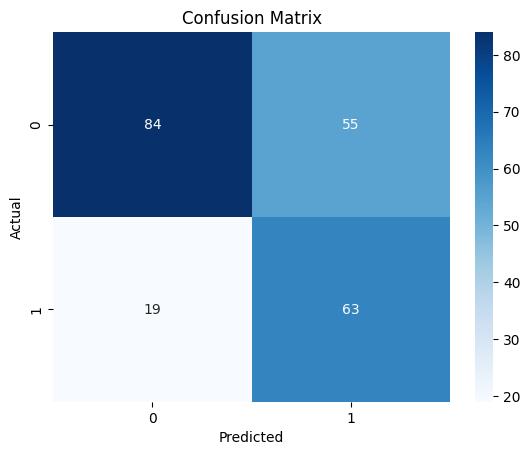

In [ ]:
# Melakukan prediksi
y_pred_gbm_wind = gbm_model.predict(X_test)

# Menghitung akurasi
accuracy_gbm_wind = accuracy_score(y_test, y_pred_gbm_wind)
print("GBM Accuracy:", accuracy_gbm_wind)
print("GBM Classification Report:\n", classification_report(y_test, y_pred_gbm_wind))

# Menampilkan tabel hasil prediksi
results_gbm_wind = pd.DataFrame({'Date': df_window1.loc[y_test.index, 'date'], 'Actual': y_test.values, 'Predicted': y_pred_gbm_wind})
print(results_gbm_wind)

# Confusion Matrix
conf_matrix_gbm1 = confusion_matrix(y_test, y_pred_gbm_wind)
sns.heatmap(conf_matrix_gbm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Membuat dan melatih model SVM
model_svm = SVC(kernel='linear', max_iter=10000)
model_svm.fit(X_train, y_train)

# Melakukan prediksi
y_pred_svm = model_svm.predict(X_train)

# Menghitung akurasi
accuracy_svm = accuracy_score(y_train, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(y_train, y_pred_svm))

# Menampilkan tabel hasil prediksi
results_svm = pd.DataFrame({'Date': df_window.loc[y_train.index, 'date'], 'Actual': y_train.values, 'Predicted': y_pred_svm})
print(results_svm)


SVM Accuracy: 0.7254464285714286
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.90      0.80       269
         1.0       0.75      0.47      0.58       179

    accuracy                           0.73       448
   macro avg       0.73      0.68      0.69       448
weighted avg       0.73      0.73      0.71       448

          Date  Actual  Predicted
314 2017-05-11     1.0        1.0
495 2017-11-08     0.0        0.0
487 2017-10-31     0.0        0.0
259 2017-03-17     0.0        0.0
203 2017-01-20     0.0        0.0
..         ...     ...        ...
71  2016-09-10     1.0        0.0
106 2016-10-15     1.0        0.0
270 2017-03-28     0.0        1.0
435 2017-09-09     1.0        0.0
102 2016-10-11     1.0        0.0

[448 rows x 3 columns]


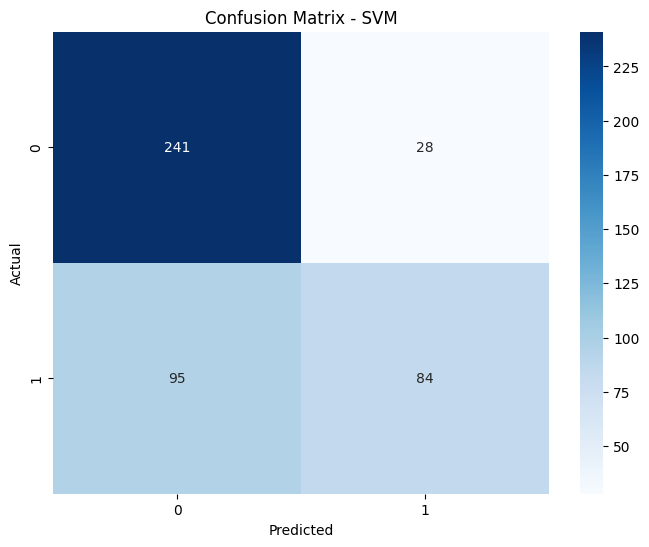

In [ ]:
# Confusion Matrix untuk SVM
conf_matrix_svm = confusion_matrix(y_train, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
conf_matrix_svm

array([[241,  28],
       [ 95,  84]])

In [ ]:
# Melakukan prediksi
y_pred_svm = model_svm.predict(X_test)

# Menghitung akurasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Menampilkan tabel hasil prediksi
results_svm = pd.DataFrame({'Date': df_window.loc[y_test.index, 'date'], 'Actual': y_test.values, 'Predicted': y_pred_svm})
print(results_svm)


SVM Accuracy: 0.7782805429864253
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       139
         1.0       0.78      0.56      0.65        82

    accuracy                           0.78       221
   macro avg       0.78      0.73      0.74       221
weighted avg       0.78      0.78      0.77       221

          Date  Actual  Predicted
361 2017-06-27     1.0        1.0
158 2016-12-06     0.0        1.0
478 2017-10-22     0.0        1.0
533 2017-12-16     0.0        0.0
275 2017-04-02     1.0        0.0
..         ...     ...        ...
286 2017-04-13     1.0        1.0
588 2018-02-09     0.0        0.0
654 2018-04-16     0.0        0.0
643 2018-04-05     0.0        1.0
84  2016-09-23     1.0        0.0

[221 rows x 3 columns]


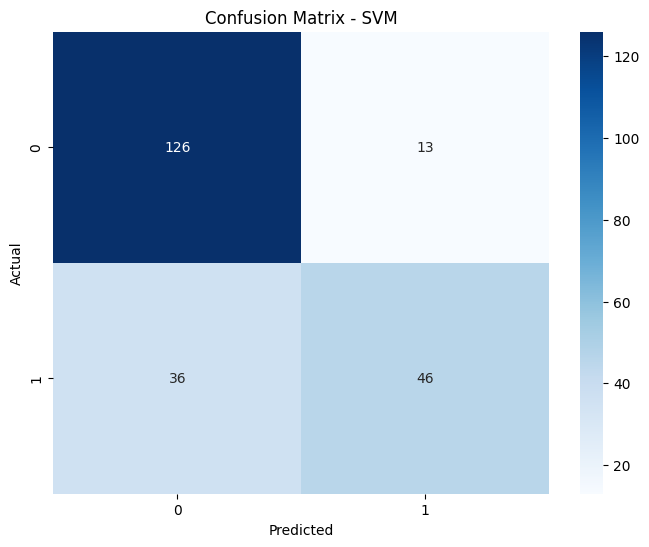

In [ ]:
# Confusion Matrix untuk SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def calculate_accuracy(X, y, model):
    """
    Menghitung akurasi dari model SVM.

    Parameters:
    X (array-like): Data input.
    y (array-like): Label.
    model (object): Model SVM.

    Returns:
    float: Nilai akurasi.
    """
    # Melakukan prediksi
    y_pred = model.predict(X)

    # Menghitung akurasi
    accuracy = model.score(X, y)

    return accuracy

def calculate_hinge_loss(X, y, model):
    """
    Menghitung Hinge loss dari model SVM.

    Parameters:
    X (array-like): Data input.
    y (array-like): Label.
    model (object): Model SVM.

    Returns:
    float: Hinge loss.
    """
    # Menghitung nilai prediksi berdasarkan decision function
    decision_values = model.decision_function(X)

    # Menghitung Hinge loss
    hinge_loss = np.mean(np.maximum(1 - decision_values * y, 0))

    return hinge_loss

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



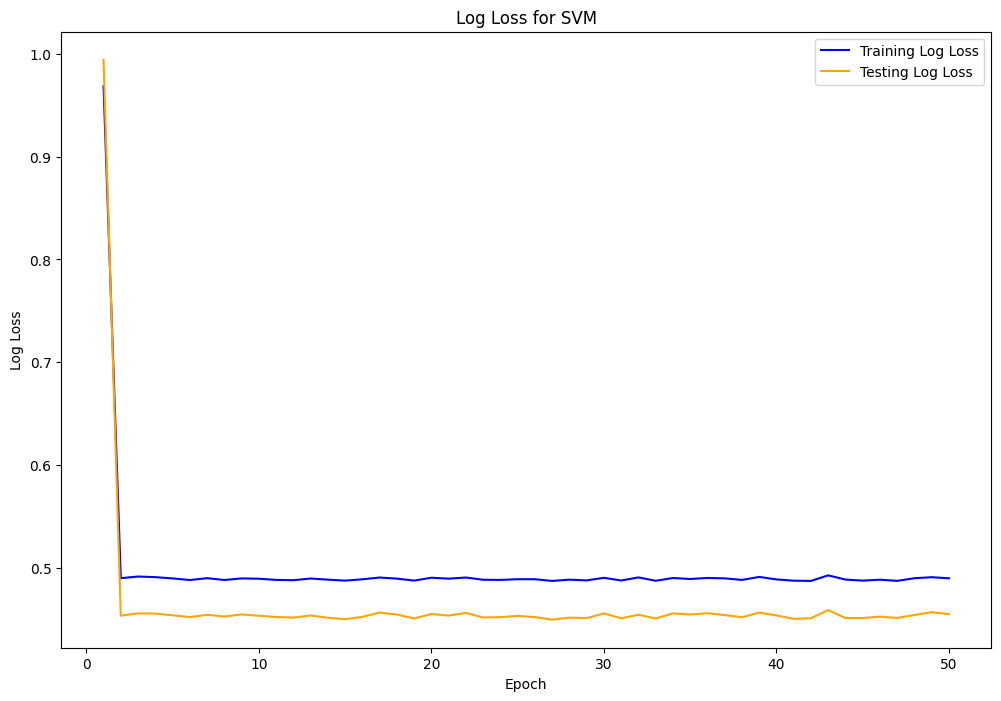

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.svm import SVC

# Placeholder for log loss values
log_loss_train = []
log_loss_test = []

# Number of iterations for staged training
num_iterations = 50

# Assuming X_train, y_train, X_test, y_test are defined
# Initialize the SVM model
model_svm = SVC(probability=True)  # Ensure probability=True to get probability estimates

# Perform staged training and compute log loss
for i in range(1, num_iterations + 1):
    # Incrementally increase the max_iter parameter
    model_svm.set_params(max_iter=i * 100)
    model_svm.fit(X_train, y_train)

    # Calculate log loss
    y_train_pred_prob = model_svm.predict_proba(X_train)
    y_test_pred_prob = model_svm.predict_proba(X_test)

    log_loss_train.append(log_loss(y_train, y_train_pred_prob))
    log_loss_test.append(log_loss(y_test, y_test_pred_prob))

# Plot the log loss
plt.figure(figsize=(12, 8))
plt.plot(range(1, num_iterations + 1), log_loss_train, label='Training Log Loss', color='blue')
plt.plot(range(1, num_iterations + 1), log_loss_test, label='Testing Log Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss for SVM')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



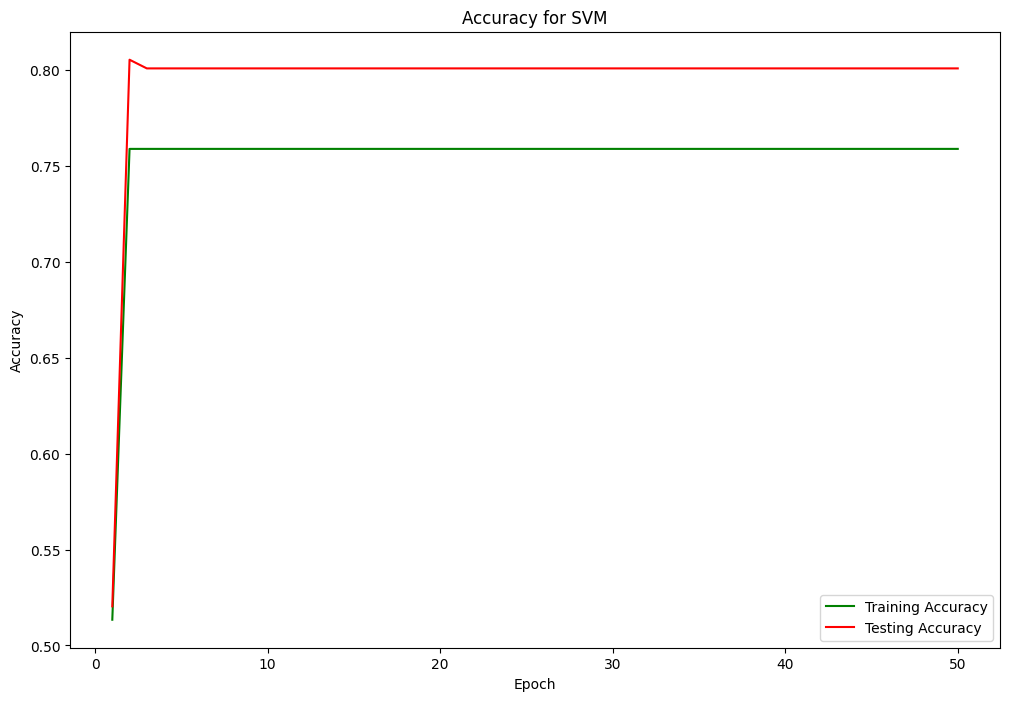

In [ ]:
# Placeholder for accuracy values
accuracy_train = []
accuracy_test = []

# Perform staged training and compute accuracy
for i in range(1, num_iterations + 1):
    # Incrementally increase the max_iter parameter
    model_svm.set_params(max_iter=i * 100)
    model_svm.fit(X_train, y_train)

    # Calculate accuracy
    accuracy_train.append(calculate_accuracy(X_train, y_train, model_svm))
    accuracy_test.append(calculate_accuracy(X_test, y_test, model_svm))


# Plot the accuracy
plt.figure(figsize=(12, 8))
plt.plot(range(1, num_iterations + 1), accuracy_train, label='Training Accuracy', color='green')
plt.plot(range(1, num_iterations + 1), accuracy_test, label='Testing Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for SVM')
plt.legend()
plt.show()

### hasil prediksi

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan fitur dan target
X = df_win.drop(['date', 'target'], axis=1)
y = df_win['target']

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', max_iter=10000)

# Melatih model dengan seluruh data
svm_model.fit(X, y)

# Melakukan prediksi pada seluruh data
y_pred = svm_model.predict(X)

# Membuat salinan dataframe asli untuk menyimpan hasil prediksi
df_results = df_win.copy()

# Menambahkan kolom actual dan prediksi ke dataframe
df_results['Actual'] = y
df_results['Prediction'] = y_pred

# Evaluasi hasil prediksi
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Menampilkan dataframe hasil
print(df_results)


Accuracy: 0.7683109118086696
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       408
         1.0       0.76      0.60      0.67       261

    accuracy                           0.77       669
   macro avg       0.77      0.74      0.75       669
weighted avg       0.77      0.77      0.76       669

          date      Ir      Iws   pm2.5    cbwd    DEWP  delta_Temperature  \
0   2016-07-01  2.6790   5.2240  2.1320  2.9850  1.4920          14.139999   
1   2016-07-02  4.2870   9.4105  6.3255  2.8940  1.7360          10.833000   
2   2016-07-03  5.0230  10.4490  7.1070  3.2900  1.8880          14.983999   
3   2016-07-04  5.4250  10.5160  6.9825  3.3655  1.9800          12.029999   
4   2016-07-05  5.3580  11.0855  7.4620  3.4570  2.0100           8.442001   
..         ...     ...      ...     ...     ...     ...                ...   
664 2018-04-26  2.1430   9.2430  8.0130  3.0155  1.2180           3.307000 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [ ]:
df_results["Prediction"].value_counts(normalize = False)

Prediction
0.0    463
1.0    206
Name: count, dtype: int64

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred_rf = rf_model.predict(X_train)

# Menghitung akurasi
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_train, y_pred_rf))

# Menampilkan tabel hasil prediksi
results_rf = pd.DataFrame({'Date': df_window.loc[y_train.index, 'date'], 'Actual': y_train.values, 'Predicted': y_pred_rf})
print(results_rf)


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       269
         1.0       1.00      1.00      1.00       179

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

          Date  Actual  Predicted
314 2017-05-11     1.0        1.0
495 2017-11-08     0.0        0.0
487 2017-10-31     0.0        0.0
259 2017-03-17     0.0        0.0
203 2017-01-20     0.0        0.0
..         ...     ...        ...
71  2016-09-10     1.0        1.0
106 2016-10-15     1.0        1.0
270 2017-03-28     0.0        0.0
435 2017-09-09     1.0        1.0
102 2016-10-11     1.0        1.0

[448 rows x 3 columns]


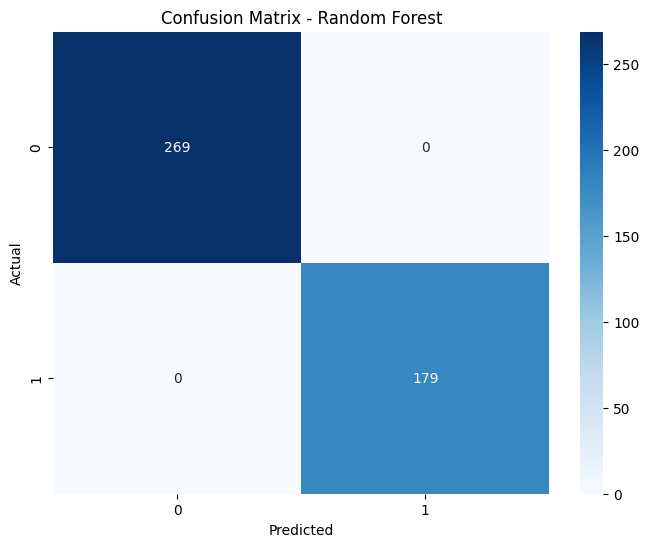

In [ ]:
# Confusion Matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_train, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Melakukan prediksi
y_pred_rf = rf_model.predict(X_test)

# Menghitung akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Menampilkan tabel hasil prediksi
results_rf = pd.DataFrame({'Date': df_window.loc[y_test.index, 'date'], 'Actual': y_test.values, 'Predicted': y_pred_rf})
print(results_rf)

Random Forest Accuracy: 0.8642533936651584
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       139
         1.0       0.82      0.82      0.82        82

    accuracy                           0.86       221
   macro avg       0.85      0.85      0.85       221
weighted avg       0.86      0.86      0.86       221

          Date  Actual  Predicted
361 2017-06-27     1.0        1.0
158 2016-12-06     0.0        1.0
478 2017-10-22     0.0        0.0
533 2017-12-16     0.0        0.0
275 2017-04-02     1.0        1.0
..         ...     ...        ...
286 2017-04-13     1.0        1.0
588 2018-02-09     0.0        0.0
654 2018-04-16     0.0        0.0
643 2018-04-05     0.0        0.0
84  2016-09-23     1.0        1.0

[221 rows x 3 columns]


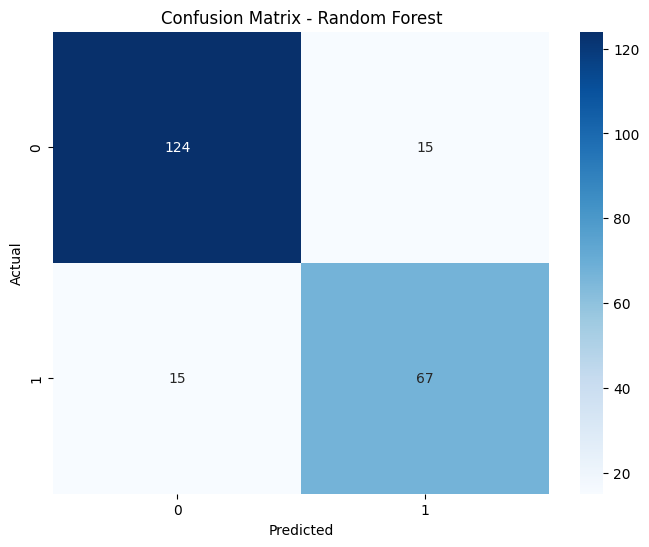

In [ ]:
# Confusion Matrix untuk Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat dan melatih model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Melakukan prediksi
y_pred_windtree = model_dt.predict(X_train)

# Menghitung akurasi
accuracy_dt = accuracy_score(y_train, y_pred_windtree)
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_train, y_pred_windtree))

# Menampilkan tabel hasil prediksi
results_dt = pd.DataFrame({'Date': df_window.loc[y_train.index, 'date'], 'Actual': y_train.values, 'Predicted': y_pred_windtree})
print(results_dt)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       269
         1.0       1.00      1.00      1.00       179

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448

          Date  Actual  Predicted
314 2017-05-11     1.0        1.0
495 2017-11-08     0.0        0.0
487 2017-10-31     0.0        0.0
259 2017-03-17     0.0        0.0
203 2017-01-20     0.0        0.0
..         ...     ...        ...
71  2016-09-10     1.0        1.0
106 2016-10-15     1.0        1.0
270 2017-03-28     0.0        0.0
435 2017-09-09     1.0        1.0
102 2016-10-11     1.0        1.0

[448 rows x 3 columns]


In [ ]:
# Melakukan prediksi
y_pred_windtree = model_dt.predict(X_test)

# Menghitung akurasi
accuracy_dt = accuracy_score(y_test, y_pred_windtree)
print("Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_windtree))

# Menampilkan tabel hasil prediksi
results_dt = pd.DataFrame({'Date': df_window.loc[y_test.index, 'date'], 'Actual': y_test.values, 'Predicted': y_pred_windtree})
print(results_dt)


Accuracy: 0.7420814479638009
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       139
         1.0       0.64      0.68      0.66        82

    accuracy                           0.74       221
   macro avg       0.72      0.73      0.73       221
weighted avg       0.75      0.74      0.74       221

          Date  Actual  Predicted
361 2017-06-27     1.0        1.0
158 2016-12-06     0.0        1.0
478 2017-10-22     0.0        0.0
533 2017-12-16     0.0        0.0
275 2017-04-02     1.0        1.0
..         ...     ...        ...
286 2017-04-13     1.0        1.0
588 2018-02-09     0.0        0.0
654 2018-04-16     0.0        1.0
643 2018-04-05     0.0        1.0
84  2016-09-23     1.0        0.0

[221 rows x 3 columns]



# Insight and Recomendation
**Based on the prediction results indicating that the periods of April-June 2017 and October-December 2016 are ideal and favorable times for wheat planting, the following suggestions can be implemented to maximize wheat farming yields:**

**April-June 2017:**
- Begin preparing the land and seeds in March to be ready for planting in early April.
- Ensure that the soil is well-fertilized and properly tilled for optimal results.

**October-December 2016:**
- Start preparing the land and seeds as early as September. Ensure the irrigation system is ready to address potential water shortages during the initial planting phase.
- Prepare a backup water source, such as wells or ponds, to anticipate drought conditions in case of unexpected weather changes.
- Ensure Proper Drainage: Establish a good drainage system to prevent excessive waterlogging during heavy rains. 
